### 1-Exploring data samples :

In [ ]:
!pip install wandb

In [ ]:
!pip install librosa

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


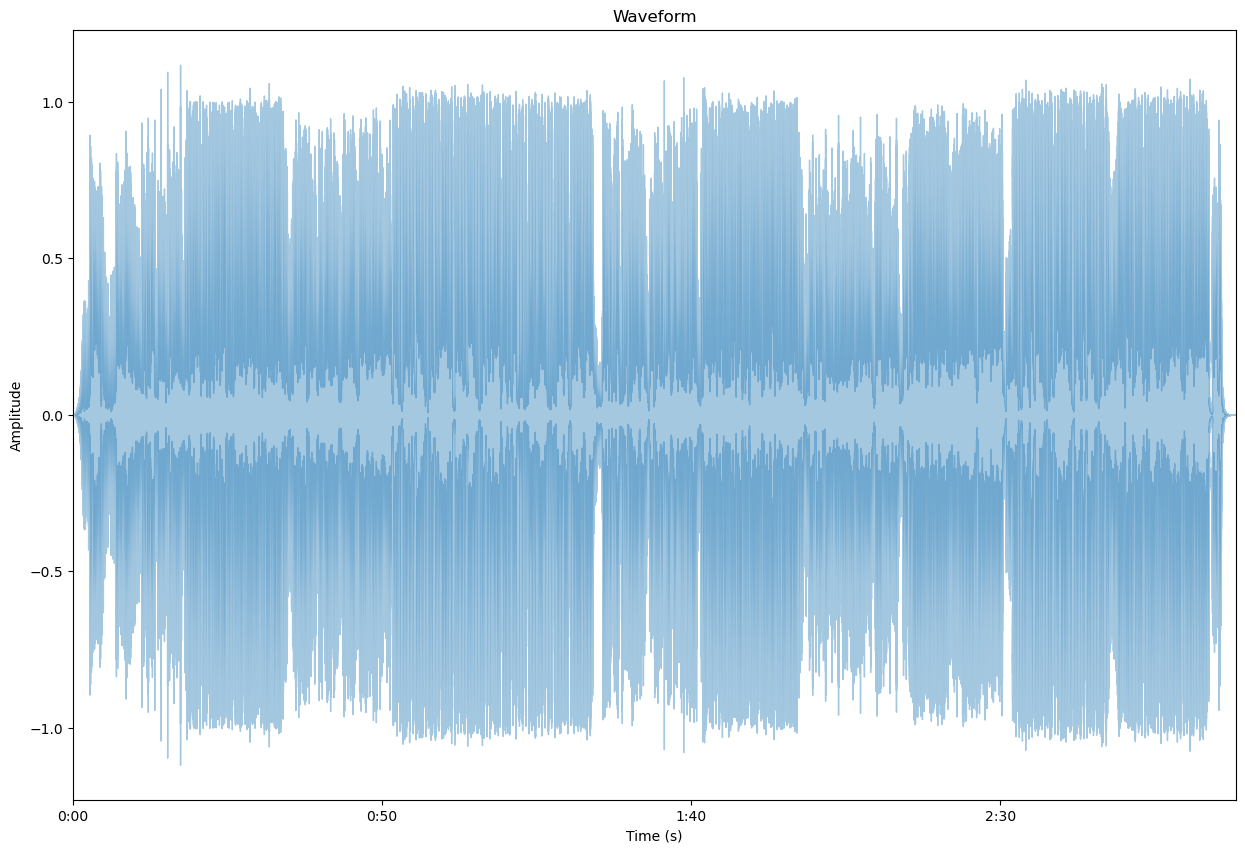

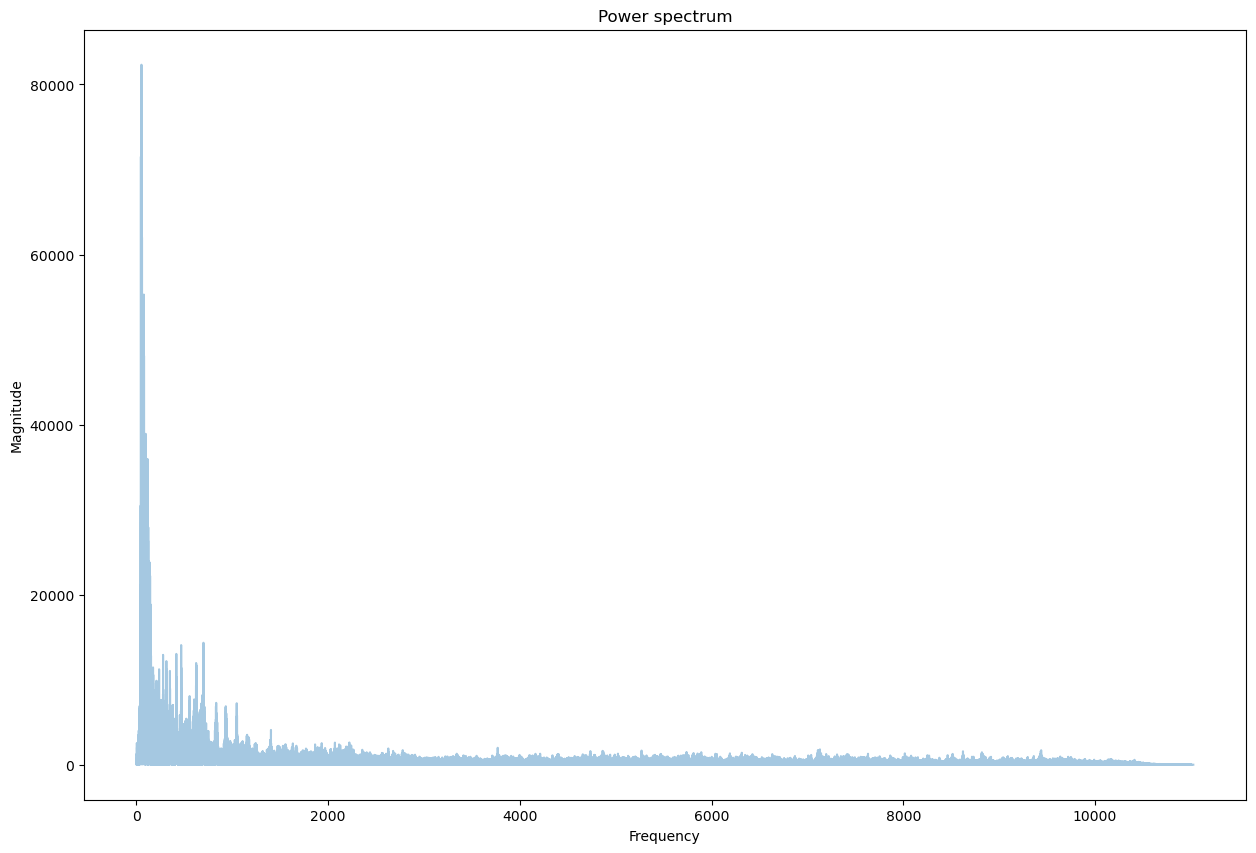

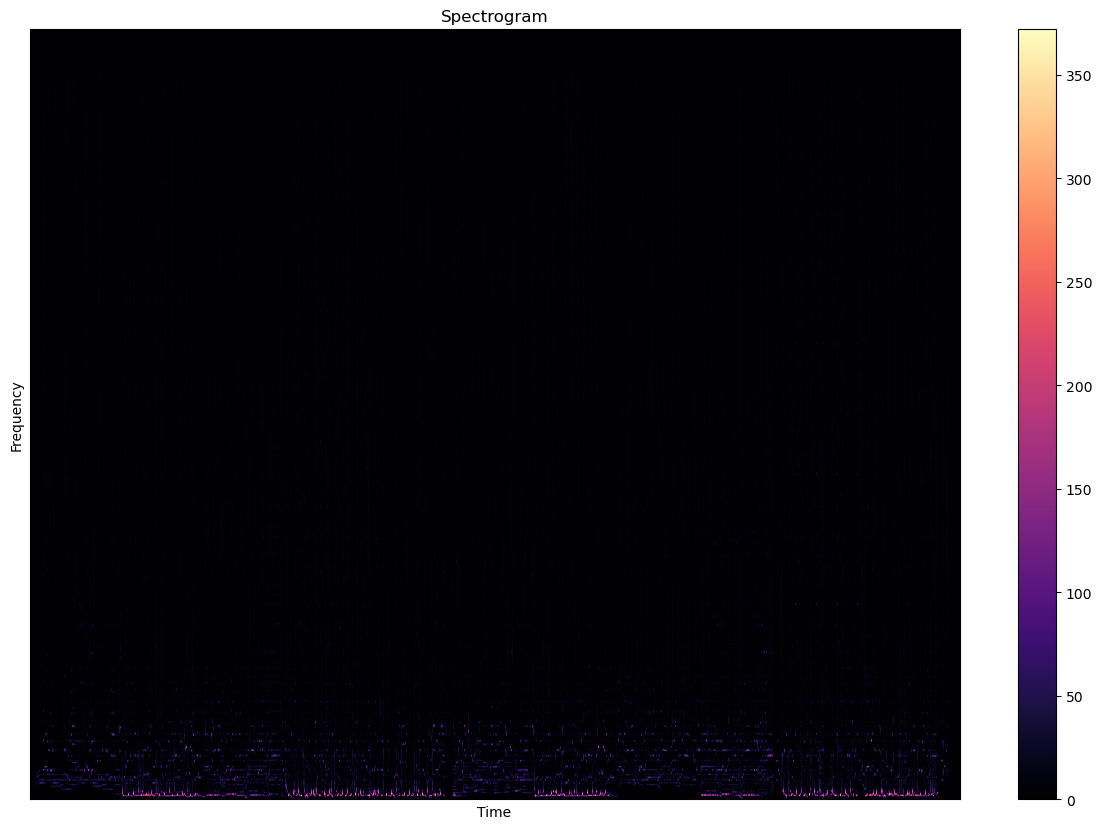

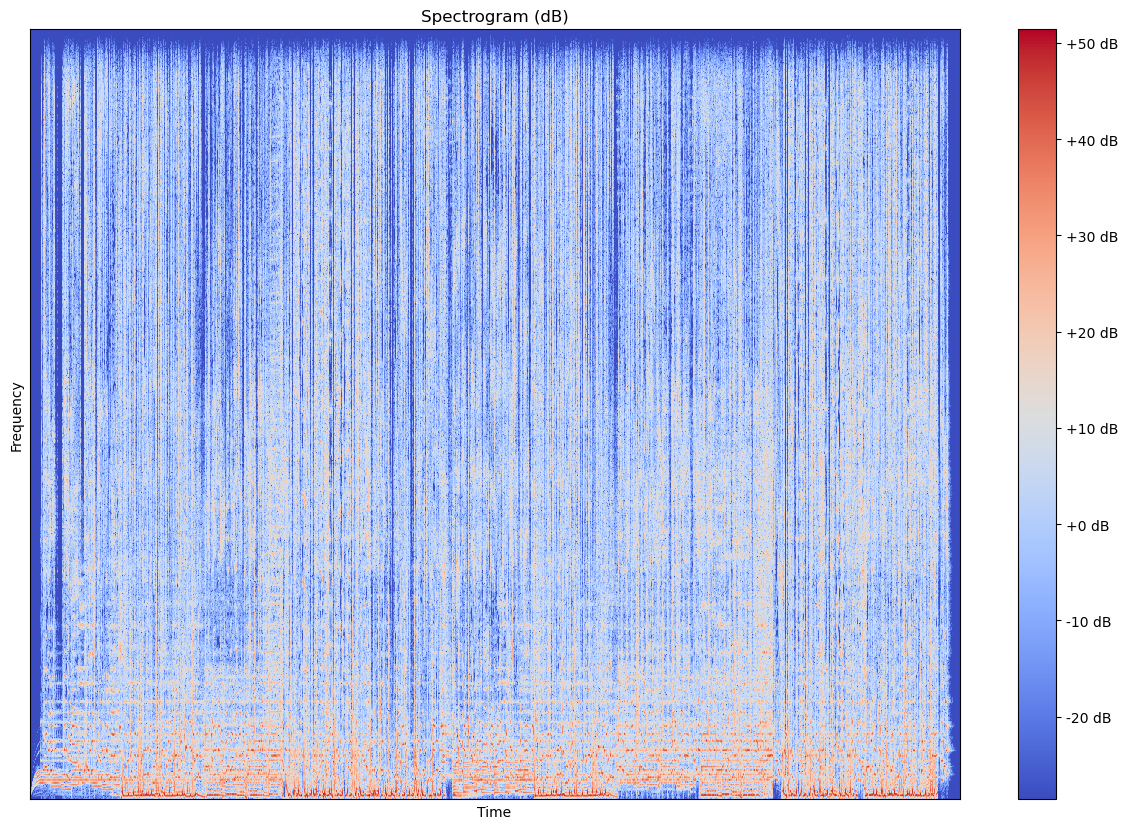

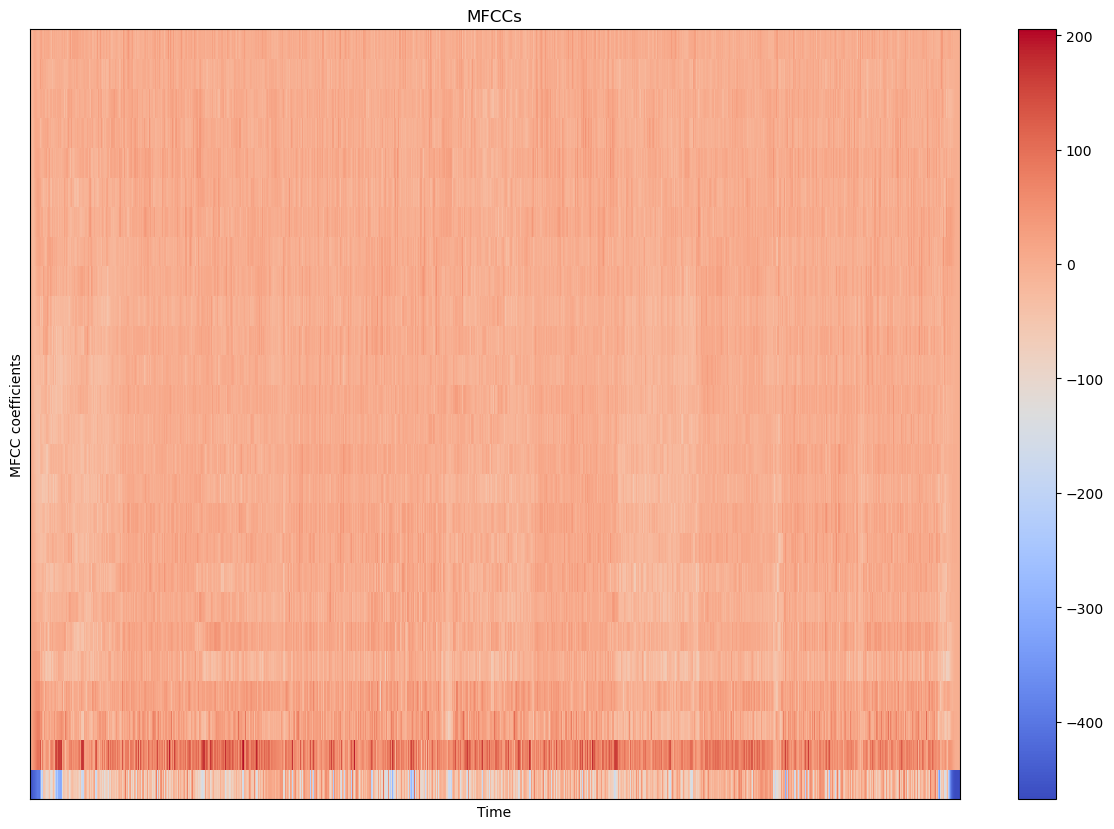

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

file = "./Training/Glitch Hop/Arcando - In My Head (feat. Britt Lari) [NCS Release].wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")


# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")


# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
# show plots
plt.show()

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
# show plots
plt.show()

# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=26)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

### 2-storing metadata as Json :

In [2]:
import json
import os
import math
import librosa


DATASET_PATH = "./Training"
JSON_PATH = "data_13_6segments.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=26, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print(i,' /',len(list(os.walk(dataset_path))))
                        #print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "a+") as fp:
        json.dump(data, fp, indent=4)
        
        
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)



Processing: Training\Bass
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14

Processing: Training\Chill
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2

4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14

Processing: Training\Dubstep
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5 

6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14


7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14

Processing: Training\Glitch Hop
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14

Processing: Training\Hardstyle
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14

10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
1

13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
1

13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14


### 3-example of model with regulerization , batch normalization :

In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "data_13_6segments.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\tensorf

In [4]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [19]:
X_train[1].shape

(323, 26, 1)

In [22]:
X_train[1].reshape((323, 26)).shape

(323, 26)

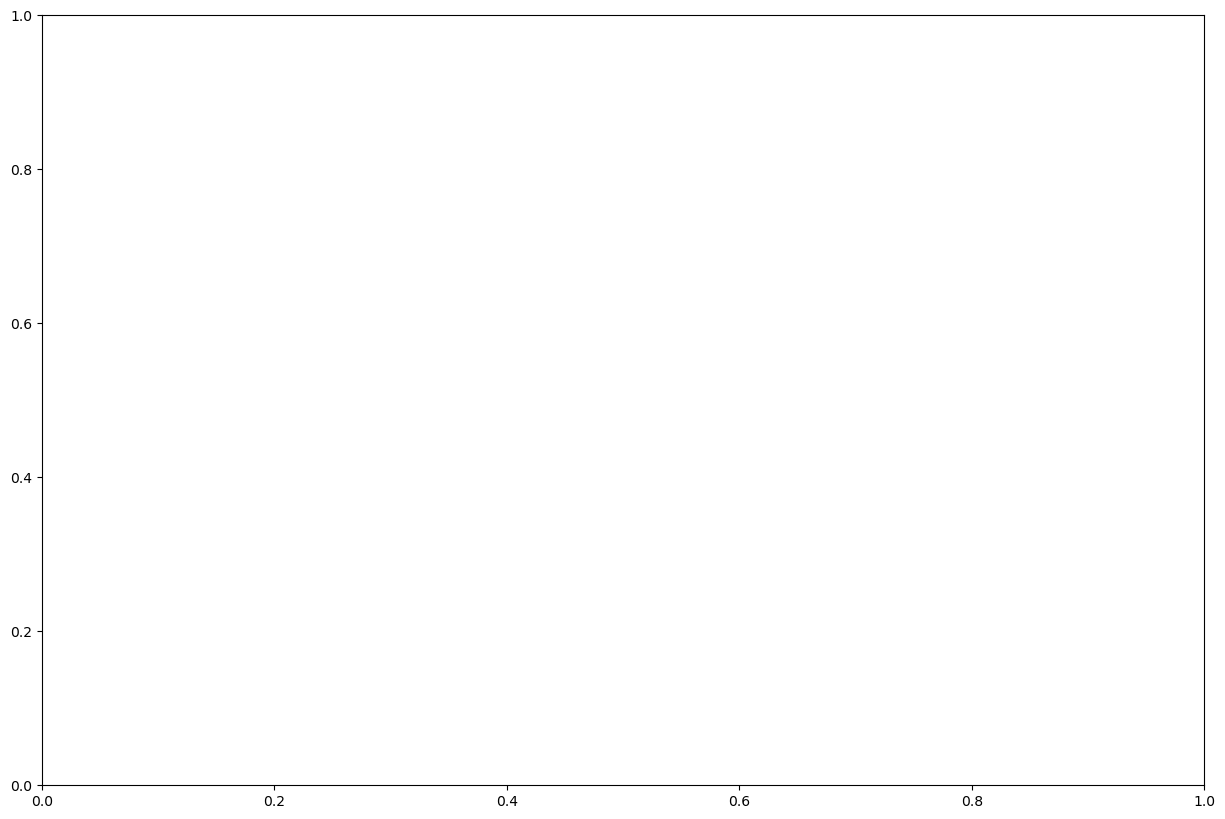

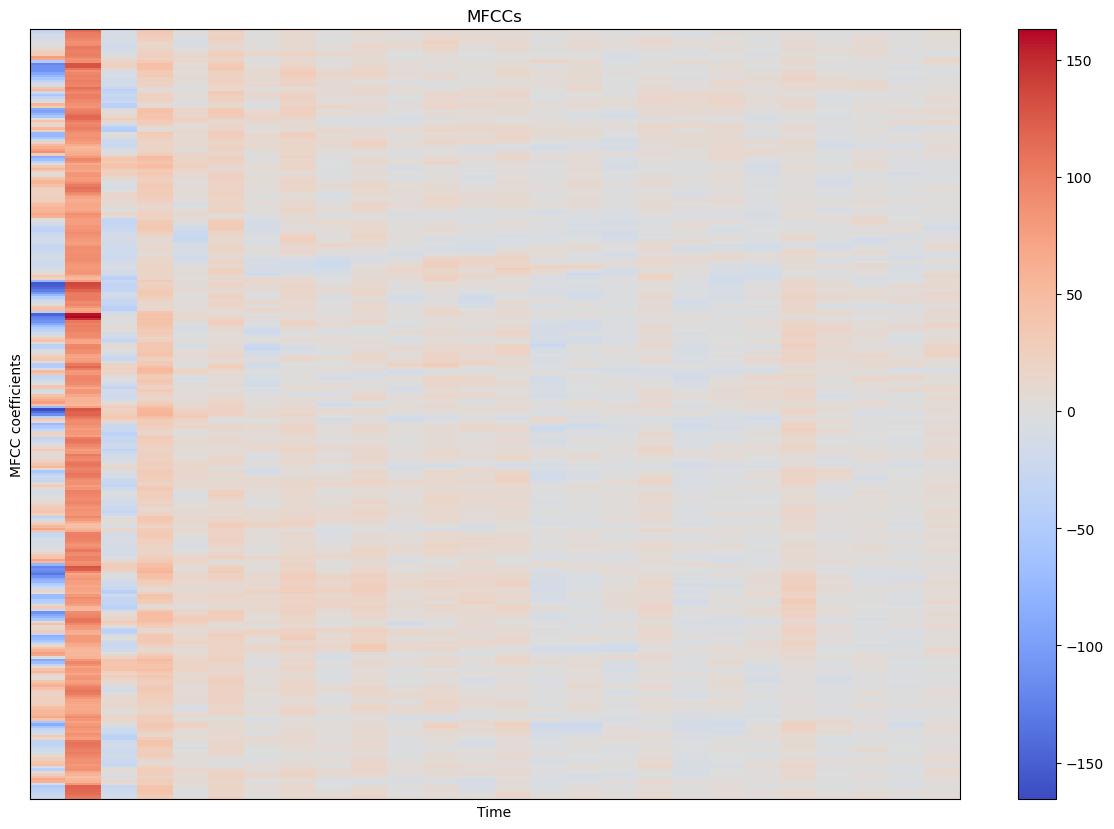

In [23]:
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(X_train[1].reshape((323, 26)), sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [15]:
(882,323, 26, 1)

(882, 323, 26, 1)

number of observations in the train dataset : 2646
MFCCs : 323


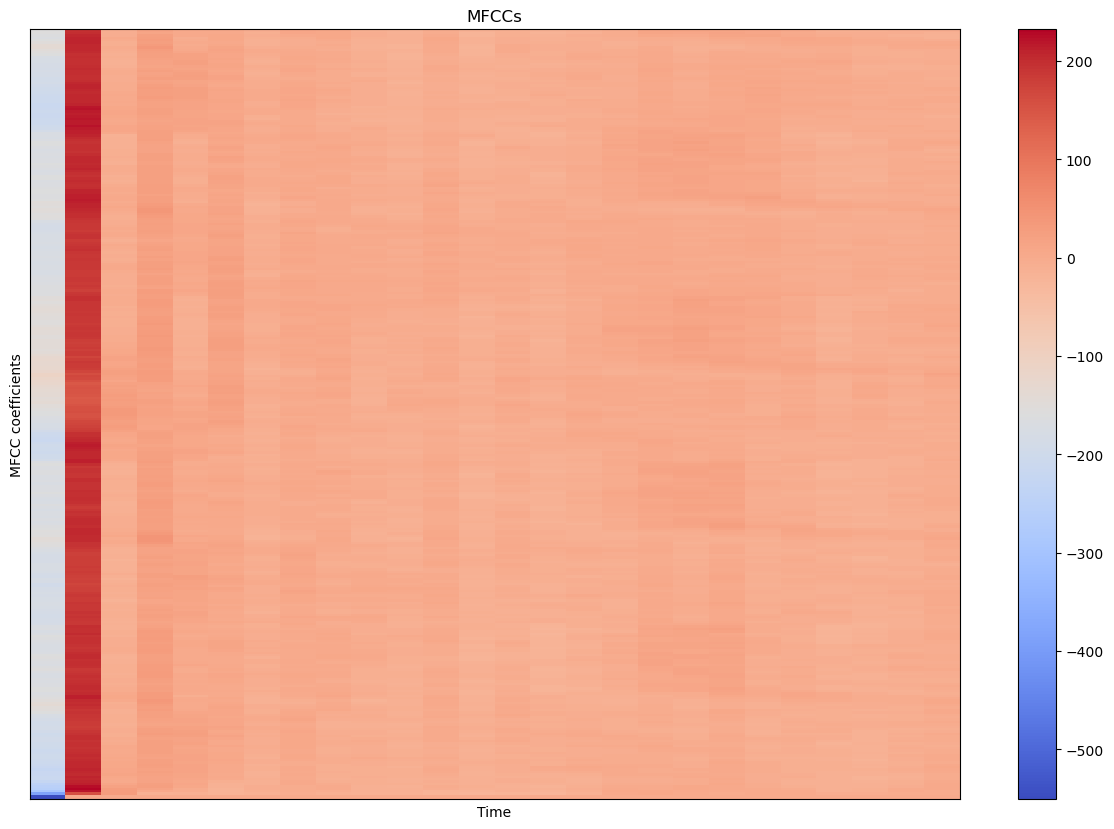

In [38]:

skf = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True) 
fold = 1
for train_index, val_index in skf.split(np.zeros(len(X_train)),y_train):
    print("number of observations in the train dataset :",len(train_index))
    for index in train_index:
        training_data = X_train[index]
        print("MFCCs :",len(training_data))
        plt.figure(figsize=FIG_SIZE)
        librosa.display.specshow(training_data.reshape((323, 26)), sr=sample_rate, hop_length=hop_length)
        plt.xlabel("Time")
        plt.ylabel("MFCC coefficients")
        plt.colorbar()
        plt.title("MFCCs")
        # show plots
        plt.show()
        break
    break
    fold+=1

In [56]:
training_data=[]
training_labels=[]
validation_data=[]
validation_labels=[]
skf = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True) 
fold = 1
for train_index, val_index in skf.split(np.zeros(len(X_train)),y_train):
    print("number of train observations in the train dataset :",len(train_index))
    print("number of validation observations in the train dataset :",len(val_index))
    print(len(y_train),len(y_validation))
    for index_t in val_index:
        training_data.append(X_train[index_t])
        training_labels.append(y_train[index_t])
    for index_v in val_index:
        validation_data.append(X_train[index_v])
        validation_labels.append(
            y_train[index_v])

number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882
number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882
number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882
number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882


In [44]:
!wandb login ab631efc36e2c87f5f54d82b5cdbd6c501d5221f

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Aymen/.netrc


In [55]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_13.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history['acc'], label="train accuracy")
    axs[0].plot(history.history["val_acc"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, 
                                  (3, 3),
                                  kernel_initializer='he_normal',
                                  activation='relu',
                                  input_shape=(input_shape),
                                 ))
    model.add(keras.layers.MaxPooling2D((3, 3),
                                        strides=(2, 2), 
                                        padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, 
                                  (3, 3), 
                                  activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3),
                                        strides=(2, 2), 
                                        padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, 
                                  (2, 2),
                                  activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2),
                                        strides=(2, 2),
                                        padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.18))
    
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.12))

    # output layer
    model.add(keras.layers.Dense(13, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [ ]:
#import wandb
#from wandb.keras import WandbCallback

#wandb.init(project="Music Genre Classification", entity="aymentlili",settings=wandb.Settings(start_method='thread'))
#wandb.config = {
#  "learning_rate":0.0001,
#  "epochs": 70,
#  "batch_size": 32
#}
from sklearn.model_selection import StratifiedKFold

checkpoint_path = "train_ckpt/cp.ckpt"
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=False, verbose=1,save_freq=5)
# ... Define a model

all_history=dict()

skf = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True) 
fold = 1
for train_index, val_index in skf.split(np.zeros(len(X_train)),y_train):
    print("number of observations in the train dataset :",len(train_index))
    training_data=[]
    training_labels=[]
    validation_data=[]
    validation_labels=[]
    for index_t in train_index:
        training_data.append(X_train[index_t])
        training_labels.append(y_train[index_t])
    for index_v in val_index:
        validation_data.append(X_train[index_v])
        validation_labels.append(
            y_train[index_v])
    training_data = np.array(training_data)
    training_labels = np.array(training_labels)
    validation_data = np.array(validation_data)
    validation_labels = np.array(validation_labels)
    print("training shape:",training_data.shape)
    print("validation shape:",validation_data.shape)
    
    input_shape = (training_data.shape[1], training_data.shape[2], 1)
    # create network
    model = build_model(input_shape )
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0015)
    model.compile(optimizer=optimiser,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy', 'mse'])

    model.summary()

    # train model
    history = model.fit(training_data, training_labels,
                        validation_data=(validation_data, validation_labels),
                        batch_size=32, epochs=55,callbacks=[cp_callback])#WandbCallback(),
    model_name = f'./best-model-kfold-{fold}.hdf5'
    #model.save(model_name)
    all_history[f'history-fold-{fold}'] = history

number of observations in the train dataset : 3024
training shape: (3024, 323, 26, 1)
validation shape: (504, 323, 26, 1)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 321, 24, 32)       320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 161, 12, 32)       0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 161, 12, 32)       128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 159, 10, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 80, 5, 32)         0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 80, 5, 32)         128     

1632/3024 [===============>..............] - ETA: 38s - loss: 2.5583 - acc: 0.1624 - mean_squared_error: 59.2356
Epoch 00001: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 37s - loss: 2.5537 - acc: 0.1641 - mean_squared_error: 59.4230
Epoch 00001: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 36s - loss: 2.5519 - acc: 0.1651 - mean_squared_error: 59.2164
Epoch 00001: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 35s - loss: 2.5500 - acc: 0.1638 - mean_squared_error: 59.2217
Epoch 00001: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 34s - loss: 2.5447 - acc: 0.1642 - mean_squared_error: 59.2951
Epoch 00001: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 33s - loss: 2.5453 - acc: 0.1635 - mean_squared_error: 59.2761
Epoch 00001: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>.....

 608/3024 [=====>........................] - ETA: 1:01 - loss: 2.2728 - acc: 0.2023 - mean_squared_error: 58.0672
Epoch 00002: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:04 - loss: 2.2746 - acc: 0.2016 - mean_squared_error: 57.2840
Epoch 00002: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:02 - loss: 2.2807 - acc: 0.1979 - mean_squared_error: 57.4468
Epoch 00002: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:00 - loss: 2.2768 - acc: 0.2017 - mean_squared_error: 57.9104
Epoch 00002: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:00 - loss: 2.2748 - acc: 0.2038 - mean_squared_error: 58.2599
Epoch 00002: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 58s - loss: 2.2669 - acc: 0.2135 - mean_squared_error: 58.0531 
Epoch 00002: saving model to train_ckpt/cp.ckpt
 800/3024 [======>..........

2528/3024 [========================>.....] - ETA: 13s - loss: 2.2692 - acc: 0.2342 - mean_squared_error: 59.6339
Epoch 00002: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 12s - loss: 2.2667 - acc: 0.2340 - mean_squared_error: 59.7209
Epoch 00002: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 11s - loss: 2.2641 - acc: 0.2350 - mean_squared_error: 59.7074
Epoch 00002: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 10s - loss: 2.2633 - acc: 0.2340 - mean_squared_error: 59.6910
Epoch 00002: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 9s - loss: 2.2638 - acc: 0.2323 - mean_squared_error: 59.4980 
Epoch 00002: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 8s - loss: 2.2619 - acc: 0.2325 - mean_squared_error: 59.5224
Epoch 00002: saving model to train_ckpt/cp.ckpt
2720/3024 [========================

 448/3024 [===>..........................] - ETA: 1:20 - loss: 2.2278 - acc: 0.2411 - mean_squared_error: 62.1090
Epoch 00003: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:23 - loss: 2.2056 - acc: 0.2542 - mean_squared_error: 62.6896
Epoch 00003: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:19 - loss: 2.1978 - acc: 0.2539 - mean_squared_error: 63.4927
Epoch 00003: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:22 - loss: 2.1944 - acc: 0.2537 - mean_squared_error: 62.3746
Epoch 00003: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:19 - loss: 2.1880 - acc: 0.2569 - mean_squared_error: 62.6154
Epoch 00003: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:16 - loss: 2.1922 - acc: 0.2549 - mean_squared_error: 61.8685
Epoch 00003: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>...........

1408/3024 [============>.................] - ETA: 49s - loss: 2.2032 - acc: 0.2599 - mean_squared_error: 60.3481
Epoch 00003: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 48s - loss: 2.2008 - acc: 0.2611 - mean_squared_error: 60.2803
Epoch 00003: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 47s - loss: 2.2019 - acc: 0.2588 - mean_squared_error: 60.2225
Epoch 00003: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 47s - loss: 2.1995 - acc: 0.2613 - mean_squared_error: 60.2733
Epoch 00003: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 45s - loss: 2.1970 - acc: 0.2630 - mean_squared_error: 60.2902
Epoch 00003: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 44s - loss: 2.1952 - acc: 0.2659 - mean_squared_error: 60.1085
Epoch 00003: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>........

 224/3024 [=>............................] - ETA: 1:14 - loss: 2.0779 - acc: 0.2991 - mean_squared_error: 65.0520
Epoch 00004: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:16 - loss: 2.0668 - acc: 0.3086 - mean_squared_error: 63.1536
Epoch 00004: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:24 - loss: 2.1025 - acc: 0.2951 - mean_squared_error: 61.6633
Epoch 00004: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:18 - loss: 2.1152 - acc: 0.2937 - mean_squared_error: 61.1608
Epoch 00004: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:15 - loss: 2.1349 - acc: 0.2841 - mean_squared_error: 59.2867
Epoch 00004: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:13 - loss: 2.1167 - acc: 0.2865 - mean_squared_error: 59.2337
Epoch 00004: saving model to train_ckpt/cp.ckpt
 416/3024 [===>.............

2080/3024 [===================>..........] - ETA: 26s - loss: 2.1198 - acc: 0.2764 - mean_squared_error: 60.6657
Epoch 00004: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 25s - loss: 2.1185 - acc: 0.2784 - mean_squared_error: 60.7609
Epoch 00004: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 25s - loss: 2.1196 - acc: 0.2780 - mean_squared_error: 60.5869
Epoch 00004: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 23s - loss: 2.1166 - acc: 0.2794 - mean_squared_error: 60.5230
Epoch 00004: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 23s - loss: 2.1161 - acc: 0.2799 - mean_squared_error: 60.4768
Epoch 00004: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 22s - loss: 2.1205 - acc: 0.2786 - mean_squared_error: 60.2110
Epoch 00004: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>.

 992/3024 [========>.....................] - ETA: 58s - loss: 2.0261 - acc: 0.3276 - mean_squared_error: 60.6815
Epoch 00005: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 56s - loss: 2.0231 - acc: 0.3271 - mean_squared_error: 60.6190
Epoch 00005: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 54s - loss: 2.0204 - acc: 0.3286 - mean_squared_error: 60.1602
Epoch 00005: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 53s - loss: 2.0128 - acc: 0.3327 - mean_squared_error: 60.3640
Epoch 00005: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 53s - loss: 2.0235 - acc: 0.3286 - mean_squared_error: 59.9360
Epoch 00005: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 52s - loss: 2.0276 - acc: 0.3281 - mean_squared_error: 59.6268
Epoch 00005: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>............

2880/3024 [===========================>..] - ETA: 3s - loss: 2.0432 - acc: 0.3212 - mean_squared_error: 59.6563
Epoch 00005: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 2s - loss: 2.0449 - acc: 0.3194 - mean_squared_error: 59.6787
Epoch 00005: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 2.0445 - acc: 0.3193 - mean_squared_error: 59.6929
Epoch 00005: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 2.0459 - acc: 0.3199 - mean_squared_error: 59.7916
Epoch 00005: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 2.0462 - acc: 0.3191 - mean_squared_error: 59.7029
Epoch 00005: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 79s 26ms/sample - loss: 2.0453 - acc: 0.3188 - mean_squared_error: 59.6347 - val_loss: 2.1958 - val_acc: 0.2817 - val_mean_squared_error: 59.7378
Epoch 6/7

 800/3024 [======>.......................] - ETA: 54s - loss: 1.9978 - acc: 0.3125 - mean_squared_error: 58.9083
Epoch 00006: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 54s - loss: 2.0046 - acc: 0.3125 - mean_squared_error: 59.0556
Epoch 00006: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 55s - loss: 1.9997 - acc: 0.3160 - mean_squared_error: 59.1616
Epoch 00006: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 53s - loss: 2.0066 - acc: 0.3136 - mean_squared_error: 58.9638
Epoch 00006: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 52s - loss: 2.0069 - acc: 0.3103 - mean_squared_error: 58.6127
Epoch 00006: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 52s - loss: 2.0086 - acc: 0.3083 - mean_squared_error: 58.3638
Epoch 00006: saving model to train_ckpt/cp.ckpt
 992/3024 [========>..............

2688/3024 [=========================>....] - ETA: 9s - loss: 1.9932 - acc: 0.3278 - mean_squared_error: 59.7299 
Epoch 00006: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 8s - loss: 1.9925 - acc: 0.3290 - mean_squared_error: 59.7904
Epoch 00006: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 7s - loss: 1.9950 - acc: 0.3292 - mean_squared_error: 59.8831
Epoch 00006: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 6s - loss: 1.9945 - acc: 0.3290 - mean_squared_error: 59.8185
Epoch 00006: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 5s - loss: 1.9942 - acc: 0.3295 - mean_squared_error: 59.8799
Epoch 00006: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 4s - loss: 1.9956 - acc: 0.3287 - mean_squared_error: 59.7213
Epoch 00006: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>

1536/3024 [==============>...............] - ETA: 42s - loss: 1.9553 - acc: 0.3405 - mean_squared_error: 60.7074
Epoch 00007: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 42s - loss: 1.9525 - acc: 0.3412 - mean_squared_error: 60.8373
Epoch 00007: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 41s - loss: 1.9569 - acc: 0.3394 - mean_squared_error: 60.5282
Epoch 00007: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 40s - loss: 1.9592 - acc: 0.3382 - mean_squared_error: 60.2967
Epoch 00007: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 39s - loss: 1.9605 - acc: 0.3389 - mean_squared_error: 60.0107
Epoch 00007: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 38s - loss: 1.9603 - acc: 0.3384 - mean_squared_error: 60.0167
Epoch 00007: saving model to train_ckpt/cp.ckpt
1728/3024 [================>......

 352/3024 [==>...........................] - ETA: 1:10 - loss: 1.9352 - acc: 0.3381 - mean_squared_error: 54.2913
Epoch 00008: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:07 - loss: 1.9165 - acc: 0.3490 - mean_squared_error: 55.2407
Epoch 00008: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:06 - loss: 1.8905 - acc: 0.3630 - mean_squared_error: 55.3648
Epoch 00008: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:04 - loss: 1.8830 - acc: 0.3661 - mean_squared_error: 55.8424
Epoch 00008: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:02 - loss: 1.8811 - acc: 0.3646 - mean_squared_error: 55.5560
Epoch 00008: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:06 - loss: 1.8765 - acc: 0.3711 - mean_squared_error: 56.3084
Epoch 00008: saving model to train_ckpt/cp.ckpt
 544/3024 [====>............

2208/3024 [====================>.........] - ETA: 23s - loss: 1.8791 - acc: 0.3822 - mean_squared_error: 59.4387
Epoch 00008: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 22s - loss: 1.8754 - acc: 0.3839 - mean_squared_error: 59.4810
Epoch 00008: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 21s - loss: 1.8804 - acc: 0.3825 - mean_squared_error: 59.5817
Epoch 00008: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 20s - loss: 1.8816 - acc: 0.3815 - mean_squared_error: 59.7279
Epoch 00008: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 19s - loss: 1.8811 - acc: 0.3823 - mean_squared_error: 59.6395
Epoch 00008: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 18s - loss: 1.8833 - acc: 0.3822 - mean_squared_error: 59.5877
Epoch 00008: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

 128/3024 [>.............................] - ETA: 1:23 - loss: 1.7882 - acc: 0.3594 - mean_squared_error: 55.3710
Epoch 00009: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:18 - loss: 1.7556 - acc: 0.3812 - mean_squared_error: 54.9355
Epoch 00009: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:11 - loss: 1.7699 - acc: 0.3854 - mean_squared_error: 56.8655
Epoch 00009: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:11 - loss: 1.7953 - acc: 0.3839 - mean_squared_error: 56.9178
Epoch 00009: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:11 - loss: 1.8233 - acc: 0.3672 - mean_squared_error: 55.6477
Epoch 00009: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:13 - loss: 1.8288 - acc: 0.3646 - mean_squared_error: 56.6372
Epoch 00009: saving model to train_ckpt/cp.ckpt
 320/3024 [==>..............

1056/3024 [=========>....................] - ETA: 50s - loss: 1.7838 - acc: 0.4072 - mean_squared_error: 58.5239
Epoch 00009: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 49s - loss: 1.7897 - acc: 0.4044 - mean_squared_error: 58.8213
Epoch 00009: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 47s - loss: 1.7956 - acc: 0.4000 - mean_squared_error: 58.8474
Epoch 00009: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 46s - loss: 1.7960 - acc: 0.4028 - mean_squared_error: 59.1757
Epoch 00009: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 45s - loss: 1.7956 - acc: 0.4003 - mean_squared_error: 59.2005
Epoch 00009: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 44s - loss: 1.7976 - acc: 0.3980 - mean_squared_error: 59.3115
Epoch 00009: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>...........

2976/3024 [============================>.] - ETA: 1s - loss: 1.8297 - acc: 0.3790 - mean_squared_error: 59.5189
Epoch 00009: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 1.8283 - acc: 0.3803 - mean_squared_error: 59.6561
Epoch 00009: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 78s 26ms/sample - loss: 1.8270 - acc: 0.3816 - mean_squared_error: 59.6372 - val_loss: 2.1990 - val_acc: 0.2560 - val_mean_squared_error: 59.7405
Epoch 10/70

Epoch 00010: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:53 - loss: 1.4975 - acc: 0.4688 - mean_squared_error: 58.6846
Epoch 00010: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:25 - loss: 1.5259 - acc: 0.4688 - mean_squared_error: 62.7301
Epoch 00010: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:24 - loss: 1.6672 - acc: 0.4167 - mean_squared_error

 864/3024 [=======>......................] - ETA: 57s - loss: 1.7921 - acc: 0.3924 - mean_squared_error: 58.2276
Epoch 00010: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 55s - loss: 1.7978 - acc: 0.3884 - mean_squared_error: 58.3757
Epoch 00010: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 54s - loss: 1.7966 - acc: 0.3912 - mean_squared_error: 58.6300
Epoch 00010: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 54s - loss: 1.8052 - acc: 0.3896 - mean_squared_error: 58.8263
Epoch 00010: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 54s - loss: 1.7995 - acc: 0.3942 - mean_squared_error: 59.2635
Epoch 00010: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 53s - loss: 1.7940 - acc: 0.3965 - mean_squared_error: 59.0491
Epoch 00010: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>.............

2720/3024 [=========================>....] - ETA: 9s - loss: 1.7727 - acc: 0.4066 - mean_squared_error: 59.5558 
Epoch 00010: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 8s - loss: 1.7754 - acc: 0.4062 - mean_squared_error: 59.6007
Epoch 00010: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 7s - loss: 1.7758 - acc: 0.4048 - mean_squared_error: 59.7686
Epoch 00010: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 6s - loss: 1.7741 - acc: 0.4066 - mean_squared_error: 59.8845
Epoch 00010: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 1.7687 - acc: 0.4073 - mean_squared_error: 59.8727
Epoch 00010: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 1.7677 - acc: 0.4073 - mean_squared_error: 59.8684
Epoch 00010: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>

 640/3024 [=====>........................] - ETA: 1:02 - loss: 1.7148 - acc: 0.4375 - mean_squared_error: 59.8838
Epoch 00011: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:04 - loss: 1.7116 - acc: 0.4405 - mean_squared_error: 59.9798
Epoch 00011: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:02 - loss: 1.7106 - acc: 0.4347 - mean_squared_error: 60.1135
Epoch 00011: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:00 - loss: 1.7050 - acc: 0.4321 - mean_squared_error: 59.9472
Epoch 00011: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 59s - loss: 1.7109 - acc: 0.4310 - mean_squared_error: 59.5890 
Epoch 00011: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 57s - loss: 1.7043 - acc: 0.4363 - mean_squared_error: 59.4003
Epoch 00011: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>..........

2560/3024 [========================>.....] - ETA: 11s - loss: 1.7067 - acc: 0.4371 - mean_squared_error: 59.2464
Epoch 00011: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 11s - loss: 1.7072 - acc: 0.4360 - mean_squared_error: 59.0987
Epoch 00011: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 10s - loss: 1.7087 - acc: 0.4364 - mean_squared_error: 59.1043
Epoch 00011: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 9s - loss: 1.7078 - acc: 0.4367 - mean_squared_error: 59.3594 
Epoch 00011: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 8s - loss: 1.7039 - acc: 0.4379 - mean_squared_error: 59.2804
Epoch 00011: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 7s - loss: 1.7001 - acc: 0.4393 - mean_squared_error: 59.3553
Epoch 00011: saving model to train_ckpt/cp.ckpt
2752/3024 [=========================

1440/3024 [=============>................] - ETA: 42s - loss: 1.5884 - acc: 0.4944 - mean_squared_error: 59.3083
Epoch 00012: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 41s - loss: 1.5923 - acc: 0.4932 - mean_squared_error: 59.2877
Epoch 00012: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 40s - loss: 1.5887 - acc: 0.4947 - mean_squared_error: 59.3564
Epoch 00012: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 38s - loss: 1.5846 - acc: 0.4954 - mean_squared_error: 59.5063
Epoch 00012: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 38s - loss: 1.5936 - acc: 0.4917 - mean_squared_error: 59.7254
Epoch 00012: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 37s - loss: 1.5866 - acc: 0.4944 - mean_squared_error: 59.8348
Epoch 00012: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>.......

 384/3024 [==>...........................] - ETA: 1:14 - loss: 1.5855 - acc: 0.4792 - mean_squared_error: 58.8717
Epoch 00013: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:10 - loss: 1.5858 - acc: 0.4784 - mean_squared_error: 59.1401
Epoch 00013: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:07 - loss: 1.6152 - acc: 0.4643 - mean_squared_error: 58.8266
Epoch 00013: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:07 - loss: 1.6197 - acc: 0.4583 - mean_squared_error: 58.9140
Epoch 00013: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:06 - loss: 1.6187 - acc: 0.4570 - mean_squared_error: 59.7043
Epoch 00013: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:03 - loss: 1.6194 - acc: 0.4577 - mean_squared_error: 59.6952
Epoch 00013: saving model to train_ckpt/cp.ckpt
 576/3024 [====>............

2400/3024 [======================>.......] - ETA: 15s - loss: 1.6035 - acc: 0.4654 - mean_squared_error: 60.0986
Epoch 00013: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 14s - loss: 1.6041 - acc: 0.4663 - mean_squared_error: 60.0517
Epoch 00013: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 13s - loss: 1.6026 - acc: 0.4675 - mean_squared_error: 59.9552
Epoch 00013: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 12s - loss: 1.6016 - acc: 0.4671 - mean_squared_error: 59.8630
Epoch 00013: saving model to train_ckpt/cp.ckpt
2528/3024 [========================>.....] - ETA: 12s - loss: 1.6037 - acc: 0.4660 - mean_squared_error: 59.8982
Epoch 00013: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 11s - loss: 1.6053 - acc: 0.4660 - mean_squared_error: 59.9002
Epoch 00013: saving model to train_ckpt/cp.ckpt
2592/3024 [=======================

1536/3024 [==============>...............] - ETA: 40s - loss: 1.5346 - acc: 0.4961 - mean_squared_error: 59.3489
Epoch 00014: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 39s - loss: 1.5361 - acc: 0.4968 - mean_squared_error: 59.4718
Epoch 00014: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 38s - loss: 1.5336 - acc: 0.4988 - mean_squared_error: 59.3204
Epoch 00014: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 37s - loss: 1.5343 - acc: 0.4982 - mean_squared_error: 59.3086
Epoch 00014: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 37s - loss: 1.5343 - acc: 0.4988 - mean_squared_error: 59.0671
Epoch 00014: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 36s - loss: 1.5284 - acc: 0.5012 - mean_squared_error: 59.1220
Epoch 00014: saving model to train_ckpt/cp.ckpt
1728/3024 [================>......

 480/3024 [===>..........................] - ETA: 1:25 - loss: 1.4833 - acc: 0.5146 - mean_squared_error: 60.7230
Epoch 00015: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:21 - loss: 1.4779 - acc: 0.5156 - mean_squared_error: 60.0662
Epoch 00015: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:22 - loss: 1.4764 - acc: 0.5147 - mean_squared_error: 59.8339
Epoch 00015: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:18 - loss: 1.4728 - acc: 0.5174 - mean_squared_error: 60.1427
Epoch 00015: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:19 - loss: 1.4665 - acc: 0.5230 - mean_squared_error: 60.3654
Epoch 00015: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:20 - loss: 1.4557 - acc: 0.5344 - mean_squared_error: 60.5938
Epoch 00015: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>...........

2400/3024 [======================>.......] - ETA: 17s - loss: 1.4662 - acc: 0.5267 - mean_squared_error: 59.7215
Epoch 00015: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 16s - loss: 1.4667 - acc: 0.5263 - mean_squared_error: 59.8480
Epoch 00015: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 15s - loss: 1.4648 - acc: 0.5284 - mean_squared_error: 60.0262
Epoch 00015: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 14s - loss: 1.4639 - acc: 0.5288 - mean_squared_error: 60.1099
Epoch 00015: saving model to train_ckpt/cp.ckpt
2528/3024 [========================>.....] - ETA: 13s - loss: 1.4661 - acc: 0.5273 - mean_squared_error: 60.1165
Epoch 00015: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 12s - loss: 1.4665 - acc: 0.5273 - mean_squared_error: 60.2283
Epoch 00015: saving model to train_ckpt/cp.ckpt
2592/3024 [=======================

 320/3024 [==>...........................] - ETA: 1:26 - loss: 1.3575 - acc: 0.6031 - mean_squared_error: 60.6410
Epoch 00016: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:24 - loss: 1.3769 - acc: 0.5909 - mean_squared_error: 61.3833
Epoch 00016: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:24 - loss: 1.3793 - acc: 0.5833 - mean_squared_error: 60.9245
Epoch 00016: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:19 - loss: 1.3717 - acc: 0.5817 - mean_squared_error: 60.9694
Epoch 00016: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:15 - loss: 1.4032 - acc: 0.5714 - mean_squared_error: 60.7007
Epoch 00016: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:19 - loss: 1.4023 - acc: 0.5667 - mean_squared_error: 60.5761
Epoch 00016: saving model to train_ckpt/cp.ckpt
 512/3024 [====>............

1248/3024 [===========>..................] - ETA: 52s - loss: 1.4079 - acc: 0.5689 - mean_squared_error: 59.2572
Epoch 00016: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 52s - loss: 1.4026 - acc: 0.5695 - mean_squared_error: 59.4149
Epoch 00016: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 50s - loss: 1.3943 - acc: 0.5732 - mean_squared_error: 59.2139
Epoch 00016: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 50s - loss: 1.3964 - acc: 0.5737 - mean_squared_error: 59.4587
Epoch 00016: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 48s - loss: 1.3990 - acc: 0.5734 - mean_squared_error: 59.5068
Epoch 00016: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 47s - loss: 1.4024 - acc: 0.5724 - mean_squared_error: 59.2280
Epoch 00016: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>.........

  64/3024 [..............................] - ETA: 1:32 - loss: 1.4299 - acc: 0.5156 - mean_squared_error: 65.1272
Epoch 00017: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:26 - loss: 1.3326 - acc: 0.5417 - mean_squared_error: 68.1957
Epoch 00017: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:14 - loss: 1.4303 - acc: 0.5312 - mean_squared_error: 64.6456
Epoch 00017: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:14 - loss: 1.3459 - acc: 0.5625 - mean_squared_error: 66.0886
Epoch 00017: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:07 - loss: 1.3885 - acc: 0.5469 - mean_squared_error: 65.6628
Epoch 00017: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:09 - loss: 1.3598 - acc: 0.5625 - mean_squared_error: 64.9380
Epoch 00017: saving model to train_ckpt/cp.ckpt
 256/3024 [=>...............

1024/3024 [=========>....................] - ETA: 59s - loss: 1.3713 - acc: 0.5664 - mean_squared_error: 62.4184 
Epoch 00017: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 57s - loss: 1.3625 - acc: 0.5701 - mean_squared_error: 62.3677
Epoch 00017: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 58s - loss: 1.3626 - acc: 0.5671 - mean_squared_error: 62.4697
Epoch 00017: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 57s - loss: 1.3645 - acc: 0.5643 - mean_squared_error: 62.4337
Epoch 00017: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 56s - loss: 1.3595 - acc: 0.5660 - mean_squared_error: 62.3021
Epoch 00017: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 54s - loss: 1.3590 - acc: 0.5650 - mean_squared_error: 62.2561
Epoch 00017: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..........

2880/3024 [===========================>..] - ETA: 4s - loss: 1.3717 - acc: 0.5556 - mean_squared_error: 60.0013
Epoch 00017: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 1.3693 - acc: 0.5563 - mean_squared_error: 59.9891
Epoch 00017: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 1.3692 - acc: 0.5560 - mean_squared_error: 59.9920
Epoch 00017: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 1.3678 - acc: 0.5554 - mean_squared_error: 59.8254
Epoch 00017: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 1.3708 - acc: 0.5545 - mean_squared_error: 59.6681
Epoch 00017: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 90s 30ms/sample - loss: 1.3701 - acc: 0.5552 - mean_squared_error: 59.6446 - val_loss: 2.2689 - val_acc: 0.2758 - val_mean_squared_error: 59.7444
Epoch 18/

1728/3024 [================>.............] - ETA: 39s - loss: 1.3101 - acc: 0.5775 - mean_squared_error: 58.7119
Epoch 00018: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 38s - loss: 1.3103 - acc: 0.5801 - mean_squared_error: 58.8175
Epoch 00018: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 37s - loss: 1.3079 - acc: 0.5798 - mean_squared_error: 58.8904
Epoch 00018: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 36s - loss: 1.3124 - acc: 0.5768 - mean_squared_error: 59.0477
Epoch 00018: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 35s - loss: 1.3163 - acc: 0.5738 - mean_squared_error: 59.0606
Epoch 00018: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 34s - loss: 1.3177 - acc: 0.5736 - mean_squared_error: 58.9937
Epoch 00018: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>....

 608/3024 [=====>........................] - ETA: 1:25 - loss: 1.2328 - acc: 0.6135 - mean_squared_error: 57.9517
Epoch 00019: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:26 - loss: 1.2312 - acc: 0.6141 - mean_squared_error: 57.7906
Epoch 00019: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:25 - loss: 1.2297 - acc: 0.6161 - mean_squared_error: 57.6859
Epoch 00019: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:21 - loss: 1.2261 - acc: 0.6179 - mean_squared_error: 57.4226
Epoch 00019: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:20 - loss: 1.2355 - acc: 0.6141 - mean_squared_error: 58.0031
Epoch 00019: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:20 - loss: 1.2321 - acc: 0.6159 - mean_squared_error: 58.2975
Epoch 00019: saving model to train_ckpt/cp.ckpt
 800/3024 [======>..........

1536/3024 [==============>...............] - ETA: 50s - loss: 1.2325 - acc: 0.5957 - mean_squared_error: 59.2777
Epoch 00019: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 49s - loss: 1.2303 - acc: 0.5963 - mean_squared_error: 59.6055
Epoch 00019: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 48s - loss: 1.2370 - acc: 0.5956 - mean_squared_error: 59.4420
Epoch 00019: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 47s - loss: 1.2388 - acc: 0.5944 - mean_squared_error: 59.4162
Epoch 00019: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 45s - loss: 1.2413 - acc: 0.5931 - mean_squared_error: 59.4980
Epoch 00019: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 44s - loss: 1.2454 - acc: 0.5926 - mean_squared_error: 59.6233
Epoch 00019: saving model to train_ckpt/cp.ckpt
1728/3024 [================>......

 384/3024 [==>...........................] - ETA: 1:15 - loss: 1.1603 - acc: 0.6510 - mean_squared_error: 61.7134
Epoch 00020: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:20 - loss: 1.1490 - acc: 0.6587 - mean_squared_error: 61.5206
Epoch 00020: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:16 - loss: 1.1549 - acc: 0.6562 - mean_squared_error: 61.9648
Epoch 00020: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:17 - loss: 1.1639 - acc: 0.6562 - mean_squared_error: 61.7313
Epoch 00020: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:19 - loss: 1.1918 - acc: 0.6445 - mean_squared_error: 60.8508
Epoch 00020: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:24 - loss: 1.1666 - acc: 0.6526 - mean_squared_error: 60.6166
Epoch 00020: saving model to train_ckpt/cp.ckpt
 576/3024 [====>............

2272/3024 [=====================>........] - ETA: 24s - loss: 1.2060 - acc: 0.6290 - mean_squared_error: 59.6057
Epoch 00020: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 23s - loss: 1.2019 - acc: 0.6302 - mean_squared_error: 59.5851
Epoch 00020: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 22s - loss: 1.2010 - acc: 0.6301 - mean_squared_error: 59.6272
Epoch 00020: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 21s - loss: 1.1991 - acc: 0.6309 - mean_squared_error: 59.5164
Epoch 00020: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 20s - loss: 1.1995 - acc: 0.6300 - mean_squared_error: 59.4132
Epoch 00020: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 19s - loss: 1.2004 - acc: 0.6287 - mean_squared_error: 59.3372
Epoch 00020: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================

1120/3024 [==========>...................] - ETA: 55s - loss: 1.1122 - acc: 0.6562 - mean_squared_error: 59.6814
Epoch 00021: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 53s - loss: 1.1127 - acc: 0.6580 - mean_squared_error: 59.6784
Epoch 00021: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 53s - loss: 1.1178 - acc: 0.6571 - mean_squared_error: 59.5057
Epoch 00021: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 52s - loss: 1.1240 - acc: 0.6538 - mean_squared_error: 59.8139
Epoch 00021: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 50s - loss: 1.1267 - acc: 0.6522 - mean_squared_error: 59.8650
Epoch 00021: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 49s - loss: 1.1187 - acc: 0.6555 - mean_squared_error: 59.7869
Epoch 00021: saving model to train_ckpt/cp.ckpt
1312/3024 [============>..........

  96/3024 [..............................] - ETA: 53s - loss: 1.0191 - acc: 0.7188 - mean_squared_error: 62.0460
Epoch 00022: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 50s - loss: 0.9998 - acc: 0.7344 - mean_squared_error: 59.5946
Epoch 00022: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 49s - loss: 1.0618 - acc: 0.7125 - mean_squared_error: 59.9840
Epoch 00022: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 48s - loss: 1.0610 - acc: 0.6979 - mean_squared_error: 58.0550
Epoch 00022: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 48s - loss: 1.0822 - acc: 0.6830 - mean_squared_error: 56.8782
Epoch 00022: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 47s - loss: 1.1195 - acc: 0.6562 - mean_squared_error: 57.0637
Epoch 00022: saving model to train_ckpt/cp.ckpt
 288/3024 [=>.....................

1376/3024 [============>.................] - ETA: 37s - loss: 1.0631 - acc: 0.6773 - mean_squared_error: 59.0458
Epoch 00022: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 37s - loss: 1.0650 - acc: 0.6761 - mean_squared_error: 59.3326
Epoch 00022: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 36s - loss: 1.0662 - acc: 0.6750 - mean_squared_error: 59.0375
Epoch 00022: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 35s - loss: 1.0675 - acc: 0.6726 - mean_squared_error: 59.2337
Epoch 00022: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 34s - loss: 1.0711 - acc: 0.6715 - mean_squared_error: 59.2628
Epoch 00022: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 33s - loss: 1.0661 - acc: 0.6751 - mean_squared_error: 59.3211
Epoch 00022: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>........

2848/3024 [===========================>..] - ETA: 3s - loss: 1.0810 - acc: 0.6626 - mean_squared_error: 59.3828
Epoch 00022: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 3s - loss: 1.0804 - acc: 0.6632 - mean_squared_error: 59.4264
Epoch 00022: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 2s - loss: 1.0808 - acc: 0.6638 - mean_squared_error: 59.4609
Epoch 00022: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 1s - loss: 1.0816 - acc: 0.6630 - mean_squared_error: 59.4516
Epoch 00022: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 1.0810 - acc: 0.6633 - mean_squared_error: 59.5176
Epoch 00022: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 1.0816 - acc: 0.6632 - mean_squared_error: 59.6247
Epoch 00022: saving model to train_ckpt/cp.ckpt
3024/3024 [=============================

1984/3024 [==================>...........] - ETA: 21s - loss: 1.0315 - acc: 0.6694 - mean_squared_error: 59.5500
Epoch 00023: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 20s - loss: 1.0321 - acc: 0.6696 - mean_squared_error: 59.5823
Epoch 00023: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 20s - loss: 1.0340 - acc: 0.6685 - mean_squared_error: 59.5815
Epoch 00023: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 19s - loss: 1.0343 - acc: 0.6668 - mean_squared_error: 59.5137
Epoch 00023: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 19s - loss: 1.0328 - acc: 0.6667 - mean_squared_error: 59.5353
Epoch 00023: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 18s - loss: 1.0326 - acc: 0.6660 - mean_squared_error: 59.2470
Epoch 00023: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>..

 864/3024 [=======>......................] - ETA: 1:09 - loss: 0.9366 - acc: 0.6979 - mean_squared_error: 61.0814
Epoch 00024: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:07 - loss: 0.9384 - acc: 0.6975 - mean_squared_error: 60.6535
Epoch 00024: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:04 - loss: 0.9366 - acc: 0.6994 - mean_squared_error: 60.6474
Epoch 00024: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:02 - loss: 0.9362 - acc: 0.6990 - mean_squared_error: 60.6811
Epoch 00024: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:03 - loss: 0.9284 - acc: 0.7026 - mean_squared_error: 60.9255
Epoch 00024: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:01 - loss: 0.9264 - acc: 0.7041 - mean_squared_error: 60.7322
Epoch 00024: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>.......

  32/3024 [..............................] - ETA: 2:00 - loss: 0.9660 - acc: 0.6250 - mean_squared_error: 62.1067
Epoch 00025: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:19 - loss: 0.7826 - acc: 0.7656 - mean_squared_error: 63.6930
Epoch 00025: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:08 - loss: 0.8755 - acc: 0.7188 - mean_squared_error: 57.8515
Epoch 00025: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:02 - loss: 0.8832 - acc: 0.7109 - mean_squared_error: 55.4221
Epoch 00025: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 57s - loss: 0.8642 - acc: 0.7188 - mean_squared_error: 55.4105 
Epoch 00025: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 55s - loss: 0.8323 - acc: 0.7344 - mean_squared_error: 54.7998
Epoch 00025: saving model to train_ckpt/cp.ckpt
 224/3024 [=>................

1152/3024 [==========>...................] - ETA: 42s - loss: 0.8947 - acc: 0.7196 - mean_squared_error: 59.7681
Epoch 00025: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 41s - loss: 0.8875 - acc: 0.7238 - mean_squared_error: 59.9637
Epoch 00025: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 40s - loss: 0.8860 - acc: 0.7229 - mean_squared_error: 60.1116
Epoch 00025: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 39s - loss: 0.8862 - acc: 0.7236 - mean_squared_error: 60.1398
Epoch 00025: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 39s - loss: 0.8852 - acc: 0.7250 - mean_squared_error: 60.2455
Epoch 00025: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 38s - loss: 0.8884 - acc: 0.7241 - mean_squared_error: 60.1661
Epoch 00025: saving model to train_ckpt/cp.ckpt
1344/3024 [============>..........

 128/3024 [>.............................] - ETA: 1:33 - loss: 0.9517 - acc: 0.7188 - mean_squared_error: 54.5071
Epoch 00026: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:36 - loss: 0.9371 - acc: 0.7250 - mean_squared_error: 56.0119
Epoch 00026: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:31 - loss: 0.9470 - acc: 0.7188 - mean_squared_error: 56.8489
Epoch 00026: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:27 - loss: 0.9443 - acc: 0.7277 - mean_squared_error: 56.1842
Epoch 00026: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:27 - loss: 0.9151 - acc: 0.7383 - mean_squared_error: 58.3226
Epoch 00026: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:23 - loss: 0.8951 - acc: 0.7500 - mean_squared_error: 58.1026
Epoch 00026: saving model to train_ckpt/cp.ckpt
 320/3024 [==>..............

1152/3024 [==========>...................] - ETA: 44s - loss: 0.8351 - acc: 0.7578 - mean_squared_error: 60.5628
Epoch 00026: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 44s - loss: 0.8355 - acc: 0.7576 - mean_squared_error: 60.3312
Epoch 00026: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 43s - loss: 0.8422 - acc: 0.7558 - mean_squared_error: 60.0493
Epoch 00026: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 44s - loss: 0.8437 - acc: 0.7540 - mean_squared_error: 60.1941
Epoch 00026: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 43s - loss: 0.8413 - acc: 0.7555 - mean_squared_error: 60.1990
Epoch 00026: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 42s - loss: 0.8369 - acc: 0.7569 - mean_squared_error: 60.1921
Epoch 00026: saving model to train_ckpt/cp.ckpt
1344/3024 [============>..........

  64/3024 [..............................] - ETA: 2:06 - loss: 0.8811 - acc: 0.7500 - mean_squared_error: 53.7025
Epoch 00027: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:37 - loss: 0.8444 - acc: 0.7604 - mean_squared_error: 56.0283
Epoch 00027: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:38 - loss: 0.9205 - acc: 0.7266 - mean_squared_error: 55.9578
Epoch 00027: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:27 - loss: 0.8906 - acc: 0.7375 - mean_squared_error: 55.7694
Epoch 00027: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:18 - loss: 0.8697 - acc: 0.7500 - mean_squared_error: 56.6976
Epoch 00027: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:12 - loss: 0.9083 - acc: 0.7277 - mean_squared_error: 56.5917
Epoch 00027: saving model to train_ckpt/cp.ckpt
 256/3024 [=>...............

2048/3024 [===================>..........] - ETA: 25s - loss: 0.8376 - acc: 0.7432 - mean_squared_error: 59.7016
Epoch 00027: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 25s - loss: 0.8395 - acc: 0.7418 - mean_squared_error: 59.8456
Epoch 00027: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 24s - loss: 0.8391 - acc: 0.7415 - mean_squared_error: 59.8777
Epoch 00027: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 23s - loss: 0.8392 - acc: 0.7407 - mean_squared_error: 59.6441
Epoch 00027: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 22s - loss: 0.8384 - acc: 0.7408 - mean_squared_error: 59.5418
Epoch 00027: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 21s - loss: 0.8396 - acc: 0.7405 - mean_squared_error: 59.5119
Epoch 00027: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>.

Epoch 28/70

Epoch 00028: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 2:29 - loss: 0.9913 - acc: 0.6562 - mean_squared_error: 61.8612
Epoch 00028: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:39 - loss: 0.8872 - acc: 0.7344 - mean_squared_error: 60.1072
Epoch 00028: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:25 - loss: 0.9005 - acc: 0.7188 - mean_squared_error: 56.8180
Epoch 00028: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:23 - loss: 0.9428 - acc: 0.7109 - mean_squared_error: 55.5100
Epoch 00028: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:41 - loss: 0.9259 - acc: 0.7188 - mean_squared_error: 59.9779
Epoch 00028: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:32 - loss: 0.8911 - acc: 0.7240 - mean_squared_error: 60.7845
Epoch 00028: sa

1088/3024 [=========>....................] - ETA: 52s - loss: 0.8119 - acc: 0.7693 - mean_squared_error: 60.6896
Epoch 00028: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 51s - loss: 0.8161 - acc: 0.7634 - mean_squared_error: 60.5337
Epoch 00028: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 50s - loss: 0.8106 - acc: 0.7648 - mean_squared_error: 60.5336
Epoch 00028: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 49s - loss: 0.8145 - acc: 0.7644 - mean_squared_error: 60.3848
Epoch 00028: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 48s - loss: 0.8126 - acc: 0.7640 - mean_squared_error: 60.0288
Epoch 00028: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 46s - loss: 0.8090 - acc: 0.7652 - mean_squared_error: 60.2350
Epoch 00028: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>...........

2016/3024 [===================>..........] - ETA: 27s - loss: 0.8022 - acc: 0.7594 - mean_squared_error: 59.9860
Epoch 00028: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 26s - loss: 0.8054 - acc: 0.7593 - mean_squared_error: 59.9409
Epoch 00028: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 25s - loss: 0.8024 - acc: 0.7601 - mean_squared_error: 59.9157
Epoch 00028: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 24s - loss: 0.8017 - acc: 0.7609 - mean_squared_error: 59.8815
Epoch 00028: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 24s - loss: 0.8023 - acc: 0.7607 - mean_squared_error: 59.7908
Epoch 00028: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 23s - loss: 0.8032 - acc: 0.7597 - mean_squared_error: 59.6778
Epoch 00028: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>..

  32/3024 [..............................] - ETA: 1:56 - loss: 0.7639 - acc: 0.7812 - mean_squared_error: 56.1571
Epoch 00029: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:21 - loss: 0.8418 - acc: 0.7344 - mean_squared_error: 58.4952
Epoch 00029: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:09 - loss: 0.7728 - acc: 0.7604 - mean_squared_error: 59.9505
Epoch 00029: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:02 - loss: 0.7585 - acc: 0.7812 - mean_squared_error: 57.3183
Epoch 00029: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 59s - loss: 0.7857 - acc: 0.7625 - mean_squared_error: 54.5831 
Epoch 00029: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 56s - loss: 0.7740 - acc: 0.7760 - mean_squared_error: 53.2871
Epoch 00029: saving model to train_ckpt/cp.ckpt
 224/3024 [=>................

1504/3024 [=============>................] - ETA: 29s - loss: 0.7568 - acc: 0.7580 - mean_squared_error: 58.5622
Epoch 00029: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 29s - loss: 0.7565 - acc: 0.7585 - mean_squared_error: 58.6781
Epoch 00029: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 29s - loss: 0.7542 - acc: 0.7596 - mean_squared_error: 58.7890
Epoch 00029: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 29s - loss: 0.7540 - acc: 0.7600 - mean_squared_error: 58.8505
Epoch 00029: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 28s - loss: 0.7504 - acc: 0.7623 - mean_squared_error: 58.8359
Epoch 00029: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 28s - loss: 0.7469 - acc: 0.7644 - mean_squared_error: 58.9765
Epoch 00029: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>.......

2624/3024 [=========================>....] - ETA: 9s - loss: 0.7413 - acc: 0.7698 - mean_squared_error: 59.6751 
Epoch 00029: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 8s - loss: 0.7421 - acc: 0.7696 - mean_squared_error: 59.6542
Epoch 00029: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 7s - loss: 0.7424 - acc: 0.7701 - mean_squared_error: 59.7192
Epoch 00029: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 7s - loss: 0.7438 - acc: 0.7691 - mean_squared_error: 59.8708
Epoch 00029: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 6s - loss: 0.7445 - acc: 0.7685 - mean_squared_error: 59.6986
Epoch 00029: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 5s - loss: 0.7424 - acc: 0.7690 - mean_squared_error: 59.6953
Epoch 00029: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>.

2208/3024 [====================>.........] - ETA: 17s - loss: 0.7195 - acc: 0.7726 - mean_squared_error: 59.5021
Epoch 00030: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 16s - loss: 0.7192 - acc: 0.7732 - mean_squared_error: 59.6218
Epoch 00030: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 15s - loss: 0.7191 - acc: 0.7738 - mean_squared_error: 59.5676
Epoch 00030: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 15s - loss: 0.7180 - acc: 0.7743 - mean_squared_error: 59.6870
Epoch 00030: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 14s - loss: 0.7215 - acc: 0.7740 - mean_squared_error: 59.6122
Epoch 00030: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 13s - loss: 0.7214 - acc: 0.7736 - mean_squared_error: 59.7184
Epoch 00030: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

2048/3024 [===================>..........] - ETA: 18s - loss: 0.6475 - acc: 0.8135 - mean_squared_error: 59.5887
Epoch 00031: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 18s - loss: 0.6530 - acc: 0.8115 - mean_squared_error: 59.7973
Epoch 00031: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 17s - loss: 0.6550 - acc: 0.8111 - mean_squared_error: 59.7555
Epoch 00031: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 16s - loss: 0.6524 - acc: 0.8130 - mean_squared_error: 59.8182
Epoch 00031: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 16s - loss: 0.6543 - acc: 0.8116 - mean_squared_error: 59.6959
Epoch 00031: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 15s - loss: 0.6517 - acc: 0.8134 - mean_squared_error: 59.5917
Epoch 00031: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>.

 384/3024 [==>...........................] - ETA: 59s - loss: 0.6052 - acc: 0.8203 - mean_squared_error: 57.1821 
Epoch 00032: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 58s - loss: 0.5918 - acc: 0.8317 - mean_squared_error: 57.9723
Epoch 00032: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 58s - loss: 0.6011 - acc: 0.8281 - mean_squared_error: 57.7483
Epoch 00032: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:00 - loss: 0.5930 - acc: 0.8333 - mean_squared_error: 57.6273
Epoch 00032: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:00 - loss: 0.5991 - acc: 0.8301 - mean_squared_error: 58.5846
Epoch 00032: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 59s - loss: 0.5886 - acc: 0.8327 - mean_squared_error: 58.5497 
Epoch 00032: saving model to train_ckpt/cp.ckpt
 576/3024 [====>..............

2336/3024 [======================>.......] - ETA: 20s - loss: 0.6373 - acc: 0.8138 - mean_squared_error: 59.8285
Epoch 00032: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 19s - loss: 0.6400 - acc: 0.8121 - mean_squared_error: 59.8199
Epoch 00032: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 18s - loss: 0.6415 - acc: 0.8117 - mean_squared_error: 59.9920
Epoch 00032: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 17s - loss: 0.6426 - acc: 0.8104 - mean_squared_error: 59.9387
Epoch 00032: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 16s - loss: 0.6466 - acc: 0.8088 - mean_squared_error: 60.0404
Epoch 00032: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 15s - loss: 0.6454 - acc: 0.8097 - mean_squared_error: 59.8945
Epoch 00032: saving model to train_ckpt/cp.ckpt
2528/3024 [=======================

2112/3024 [===================>..........] - ETA: 15s - loss: 0.6165 - acc: 0.8134 - mean_squared_error: 59.1560
Epoch 00033: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 14s - loss: 0.6158 - acc: 0.8134 - mean_squared_error: 59.2870
Epoch 00033: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 14s - loss: 0.6143 - acc: 0.8148 - mean_squared_error: 59.0191
Epoch 00033: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 13s - loss: 0.6159 - acc: 0.8134 - mean_squared_error: 59.1868
Epoch 00033: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 13s - loss: 0.6163 - acc: 0.8134 - mean_squared_error: 59.2696
Epoch 00033: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 12s - loss: 0.6161 - acc: 0.8129 - mean_squared_error: 59.3521
Epoch 00033: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>.

1472/3024 [=============>................] - ETA: 49s - loss: 0.5827 - acc: 0.8207 - mean_squared_error: 59.5538
Epoch 00034: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 47s - loss: 0.5866 - acc: 0.8198 - mean_squared_error: 59.2618
Epoch 00034: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 47s - loss: 0.5811 - acc: 0.8216 - mean_squared_error: 59.4973
Epoch 00034: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 46s - loss: 0.5848 - acc: 0.8195 - mean_squared_error: 59.7223
Epoch 00034: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 45s - loss: 0.5847 - acc: 0.8194 - mean_squared_error: 59.3401
Epoch 00034: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 44s - loss: 0.5816 - acc: 0.8199 - mean_squared_error: 59.3921
Epoch 00034: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>.......

 288/3024 [=>............................] - ETA: 1:55 - loss: 0.5589 - acc: 0.8403 - mean_squared_error: 58.1331
Epoch 00035: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:52 - loss: 0.5867 - acc: 0.8281 - mean_squared_error: 58.4439
Epoch 00035: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:51 - loss: 0.5806 - acc: 0.8324 - mean_squared_error: 59.4423
Epoch 00035: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:47 - loss: 0.5767 - acc: 0.8229 - mean_squared_error: 59.5691
Epoch 00035: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:46 - loss: 0.5636 - acc: 0.8317 - mean_squared_error: 60.0941
Epoch 00035: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:43 - loss: 0.5549 - acc: 0.8326 - mean_squared_error: 60.1659
Epoch 00035: saving model to train_ckpt/cp.ckpt
 480/3024 [===>.............

2144/3024 [====================>.........] - ETA: 27s - loss: 0.5500 - acc: 0.8396 - mean_squared_error: 59.2253
Epoch 00035: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 25s - loss: 0.5505 - acc: 0.8387 - mean_squared_error: 59.1810
Epoch 00035: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 25s - loss: 0.5519 - acc: 0.8383 - mean_squared_error: 59.3535
Epoch 00035: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 23s - loss: 0.5529 - acc: 0.8375 - mean_squared_error: 59.1754
Epoch 00035: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 22s - loss: 0.5539 - acc: 0.8371 - mean_squared_error: 59.3429
Epoch 00035: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 21s - loss: 0.5521 - acc: 0.8372 - mean_squared_error: 59.3437
Epoch 00035: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>

1088/3024 [=========>....................] - ETA: 58s - loss: 0.5199 - acc: 0.8529 - mean_squared_error: 58.5205 
Epoch 00036: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 58s - loss: 0.5209 - acc: 0.8518 - mean_squared_error: 58.9413
Epoch 00036: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 57s - loss: 0.5229 - acc: 0.8524 - mean_squared_error: 58.9075
Epoch 00036: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 56s - loss: 0.5263 - acc: 0.8497 - mean_squared_error: 59.1584
Epoch 00036: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 56s - loss: 0.5224 - acc: 0.8503 - mean_squared_error: 59.0292
Epoch 00036: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 56s - loss: 0.5270 - acc: 0.8462 - mean_squared_error: 59.1280
Epoch 00036: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..........

3008/3024 [============================>.] - ETA: 0s - loss: 0.5394 - acc: 0.8424 - mean_squared_error: 59.6954
Epoch 00036: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 97s 32ms/sample - loss: 0.5389 - acc: 0.8429 - mean_squared_error: 59.6691 - val_loss: 2.8814 - val_acc: 0.2540 - val_mean_squared_error: 59.7584
Epoch 37/70

Epoch 00037: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:25 - loss: 0.4523 - acc: 0.9375 - mean_squared_error: 56.4563
Epoch 00037: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:10 - loss: 0.5066 - acc: 0.9062 - mean_squared_error: 56.6870
Epoch 00037: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:05 - loss: 0.5280 - acc: 0.8750 - mean_squared_error: 58.4958
Epoch 00037: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:15 - loss: 0.5315 - acc: 0.8516 - mean_squared_err

 992/3024 [========>.....................] - ETA: 1:04 - loss: 0.4659 - acc: 0.8690 - mean_squared_error: 59.4594
Epoch 00037: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:02 - loss: 0.4645 - acc: 0.8682 - mean_squared_error: 59.3843
Epoch 00037: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:01 - loss: 0.4663 - acc: 0.8684 - mean_squared_error: 59.2501
Epoch 00037: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 1:01 - loss: 0.4674 - acc: 0.8686 - mean_squared_error: 59.1678
Epoch 00037: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 1:00 - loss: 0.4659 - acc: 0.8679 - mean_squared_error: 59.5076
Epoch 00037: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 59s - loss: 0.4640 - acc: 0.8672 - mean_squared_error: 59.4001 
Epoch 00037: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>......

1920/3024 [==================>...........] - ETA: 38s - loss: 0.4706 - acc: 0.8667 - mean_squared_error: 59.0989
Epoch 00037: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 37s - loss: 0.4715 - acc: 0.8663 - mean_squared_error: 59.1645
Epoch 00037: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 35s - loss: 0.4735 - acc: 0.8659 - mean_squared_error: 59.1093
Epoch 00037: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 35s - loss: 0.4735 - acc: 0.8671 - mean_squared_error: 59.1071
Epoch 00037: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 33s - loss: 0.4761 - acc: 0.8662 - mean_squared_error: 59.1154
Epoch 00037: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 32s - loss: 0.4746 - acc: 0.8678 - mean_squared_error: 59.1089
Epoch 00037: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>...

 736/3024 [======>.......................] - ETA: 1:00 - loss: 0.4658 - acc: 0.8601 - mean_squared_error: 58.6328
Epoch 00038: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 58s - loss: 0.4614 - acc: 0.8620 - mean_squared_error: 59.5995 
Epoch 00038: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 56s - loss: 0.4636 - acc: 0.8612 - mean_squared_error: 59.4441
Epoch 00038: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 56s - loss: 0.4561 - acc: 0.8642 - mean_squared_error: 59.8458
Epoch 00038: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 54s - loss: 0.4594 - acc: 0.8611 - mean_squared_error: 59.3317
Epoch 00038: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 52s - loss: 0.4533 - acc: 0.8650 - mean_squared_error: 59.3482
Epoch 00038: saving model to train_ckpt/cp.ckpt
 928/3024 [========>............

2784/3024 [==========================>...] - ETA: 6s - loss: 0.4644 - acc: 0.8610 - mean_squared_error: 59.9327
Epoch 00038: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 5s - loss: 0.4625 - acc: 0.8615 - mean_squared_error: 59.9602
Epoch 00038: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 4s - loss: 0.4631 - acc: 0.8617 - mean_squared_error: 59.9811
Epoch 00038: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 3s - loss: 0.4632 - acc: 0.8622 - mean_squared_error: 59.8321
Epoch 00038: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 2s - loss: 0.4620 - acc: 0.8623 - mean_squared_error: 59.7984
Epoch 00038: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 0.4625 - acc: 0.8621 - mean_squared_error: 59.8072
Epoch 00038: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>

 704/3024 [=====>........................] - ETA: 1:02 - loss: 0.4212 - acc: 0.8849 - mean_squared_error: 61.1014
Epoch 00039: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:00 - loss: 0.4208 - acc: 0.8832 - mean_squared_error: 61.0891
Epoch 00039: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 58s - loss: 0.4180 - acc: 0.8841 - mean_squared_error: 61.4907 
Epoch 00039: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 56s - loss: 0.4113 - acc: 0.8875 - mean_squared_error: 61.5346
Epoch 00039: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 59s - loss: 0.4066 - acc: 0.8906 - mean_squared_error: 61.4616
Epoch 00039: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 57s - loss: 0.4096 - acc: 0.8900 - mean_squared_error: 61.1468
Epoch 00039: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>............

2912/3024 [===========================>..] - ETA: 2s - loss: 0.4246 - acc: 0.8798 - mean_squared_error: 59.5707
Epoch 00039: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 1s - loss: 0.4235 - acc: 0.8801 - mean_squared_error: 59.6036
Epoch 00039: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 0.4248 - acc: 0.8797 - mean_squared_error: 59.6189
Epoch 00039: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.4264 - acc: 0.8797 - mean_squared_error: 59.6952
Epoch 00039: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 73s 24ms/sample - loss: 0.4258 - acc: 0.8803 - mean_squared_error: 59.6728 - val_loss: 3.0135 - val_acc: 0.2500 - val_mean_squared_error: 59.7607
Epoch 40/70

Epoch 00040: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:27 - loss: 0.3956 - acc: 0.9062 - mean_squared_error: 54

2176/3024 [====================>.........] - ETA: 16s - loss: 0.4058 - acc: 0.8856 - mean_squared_error: 60.6474
Epoch 00040: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 15s - loss: 0.4045 - acc: 0.8859 - mean_squared_error: 60.6793
Epoch 00040: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 15s - loss: 0.4042 - acc: 0.8862 - mean_squared_error: 60.8082
Epoch 00040: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 14s - loss: 0.4038 - acc: 0.8864 - mean_squared_error: 60.6292
Epoch 00040: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 14s - loss: 0.4037 - acc: 0.8863 - mean_squared_error: 60.8145
Epoch 00040: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 13s - loss: 0.4037 - acc: 0.8857 - mean_squared_error: 60.7440
Epoch 00040: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>

 160/3024 [>.............................] - ETA: 1:46 - loss: 0.3315 - acc: 0.9062 - mean_squared_error: 55.6553
Epoch 00041: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:39 - loss: 0.3319 - acc: 0.9010 - mean_squared_error: 59.3933
Epoch 00041: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:50 - loss: 0.3474 - acc: 0.8973 - mean_squared_error: 60.6611
Epoch 00041: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:52 - loss: 0.3392 - acc: 0.9023 - mean_squared_error: 60.2919
Epoch 00041: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:48 - loss: 0.3321 - acc: 0.9097 - mean_squared_error: 60.7416
Epoch 00041: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:44 - loss: 0.3292 - acc: 0.9125 - mean_squared_error: 61.2786
Epoch 00041: saving model to train_ckpt/cp.ckpt
 352/3024 [==>..............

2016/3024 [===================>..........] - ETA: 40s - loss: 0.4031 - acc: 0.8795 - mean_squared_error: 59.2482
Epoch 00041: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 38s - loss: 0.4010 - acc: 0.8809 - mean_squared_error: 59.3272
Epoch 00041: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 37s - loss: 0.4001 - acc: 0.8808 - mean_squared_error: 59.5210
Epoch 00041: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 35s - loss: 0.4008 - acc: 0.8807 - mean_squared_error: 59.3360
Epoch 00041: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 34s - loss: 0.4002 - acc: 0.8806 - mean_squared_error: 59.3403
Epoch 00041: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 33s - loss: 0.4013 - acc: 0.8801 - mean_squared_error: 59.3524
Epoch 00041: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>..

3024/3024 [==============================] - 108s 36ms/sample - loss: 0.3975 - acc: 0.8833 - mean_squared_error: 59.6747 - val_loss: 3.1341 - val_acc: 0.2639 - val_mean_squared_error: 59.7623
Epoch 42/70

Epoch 00042: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:03 - loss: 0.2698 - acc: 0.9375 - mean_squared_error: 69.6066
Epoch 00042: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 56s - loss: 0.3505 - acc: 0.8906 - mean_squared_error: 62.3405 
Epoch 00042: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 55s - loss: 0.3167 - acc: 0.9062 - mean_squared_error: 63.3301
Epoch 00042: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:16 - loss: 0.3323 - acc: 0.8984 - mean_squared_error: 62.7781
Epoch 00042: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:08 - loss: 0.3335 - acc: 0.9000 - mean_squared_e

1856/3024 [=================>............] - ETA: 36s - loss: 0.3471 - acc: 0.8998 - mean_squared_error: 59.9160
Epoch 00042: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 35s - loss: 0.3476 - acc: 0.8994 - mean_squared_error: 60.1469
Epoch 00042: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 34s - loss: 0.3469 - acc: 0.8995 - mean_squared_error: 60.0441
Epoch 00042: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 33s - loss: 0.3520 - acc: 0.8986 - mean_squared_error: 59.8837
Epoch 00042: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 32s - loss: 0.3527 - acc: 0.8977 - mean_squared_error: 60.0934
Epoch 00042: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 31s - loss: 0.3541 - acc: 0.8968 - mean_squared_error: 60.2190
Epoch 00042: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>...

 768/3024 [======>.......................] - ETA: 1:06 - loss: 0.3418 - acc: 0.9089 - mean_squared_error: 58.6116
Epoch 00043: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:04 - loss: 0.3376 - acc: 0.9100 - mean_squared_error: 58.9379
Epoch 00043: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:02 - loss: 0.3401 - acc: 0.9111 - mean_squared_error: 58.6637
Epoch 00043: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:01 - loss: 0.3381 - acc: 0.9109 - mean_squared_error: 58.3252
Epoch 00043: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 59s - loss: 0.3436 - acc: 0.9074 - mean_squared_error: 58.7362 
Epoch 00043: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 58s - loss: 0.3482 - acc: 0.9052 - mean_squared_error: 59.4069
Epoch 00043: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.........

1728/3024 [================>.............] - ETA: 36s - loss: 0.3705 - acc: 0.8935 - mean_squared_error: 59.8753
Epoch 00043: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 35s - loss: 0.3727 - acc: 0.8926 - mean_squared_error: 59.8096
Epoch 00043: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 34s - loss: 0.3727 - acc: 0.8923 - mean_squared_error: 59.5174
Epoch 00043: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 33s - loss: 0.3702 - acc: 0.8936 - mean_squared_error: 59.5199
Epoch 00043: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 33s - loss: 0.3684 - acc: 0.8944 - mean_squared_error: 59.7495
Epoch 00043: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 31s - loss: 0.3657 - acc: 0.8957 - mean_squared_error: 59.8493
Epoch 00043: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>....

 672/3024 [=====>........................] - ETA: 1:22 - loss: 0.3367 - acc: 0.9137 - mean_squared_error: 62.0493
Epoch 00044: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:19 - loss: 0.3362 - acc: 0.9119 - mean_squared_error: 61.5630
Epoch 00044: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:20 - loss: 0.3306 - acc: 0.9130 - mean_squared_error: 61.6670
Epoch 00044: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:18 - loss: 0.3259 - acc: 0.9141 - mean_squared_error: 61.7553
Epoch 00044: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:17 - loss: 0.3237 - acc: 0.9150 - mean_squared_error: 61.8834
Epoch 00044: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:17 - loss: 0.3246 - acc: 0.9147 - mean_squared_error: 62.0016
Epoch 00044: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

2624/3024 [=========================>....] - ETA: 12s - loss: 0.3172 - acc: 0.9135 - mean_squared_error: 60.0167
Epoch 00044: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 11s - loss: 0.3179 - acc: 0.9127 - mean_squared_error: 59.9065
Epoch 00044: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 0.3209 - acc: 0.9111 - mean_squared_error: 59.8313
Epoch 00044: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 9s - loss: 0.3217 - acc: 0.9110 - mean_squared_error: 59.7284 
Epoch 00044: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 8s - loss: 0.3256 - acc: 0.9099 - mean_squared_error: 59.7196
Epoch 00044: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 7s - loss: 0.3266 - acc: 0.9091 - mean_squared_error: 59.6729
Epoch 00044: saving model to train_ckpt/cp.ckpt
2816/3024 [=========================

1504/3024 [=============>................] - ETA: 51s - loss: 0.3283 - acc: 0.9096 - mean_squared_error: 57.6802
Epoch 00045: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 50s - loss: 0.3261 - acc: 0.9108 - mean_squared_error: 57.6877
Epoch 00045: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 49s - loss: 0.3265 - acc: 0.9101 - mean_squared_error: 57.9830
Epoch 00045: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 48s - loss: 0.3259 - acc: 0.9087 - mean_squared_error: 57.8737
Epoch 00045: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 47s - loss: 0.3299 - acc: 0.9069 - mean_squared_error: 57.7181
Epoch 00045: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 46s - loss: 0.3297 - acc: 0.9069 - mean_squared_error: 57.6930
Epoch 00045: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>.......

 320/3024 [==>...........................] - ETA: 1:15 - loss: 0.2912 - acc: 0.9156 - mean_squared_error: 59.8523
Epoch 00046: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:21 - loss: 0.2905 - acc: 0.9148 - mean_squared_error: 59.9759
Epoch 00046: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:17 - loss: 0.2956 - acc: 0.9141 - mean_squared_error: 60.1911
Epoch 00046: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:23 - loss: 0.2937 - acc: 0.9135 - mean_squared_error: 59.0926
Epoch 00046: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:20 - loss: 0.2891 - acc: 0.9174 - mean_squared_error: 58.7944
Epoch 00046: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:16 - loss: 0.2877 - acc: 0.9146 - mean_squared_error: 58.5900
Epoch 00046: saving model to train_ckpt/cp.ckpt
 512/3024 [====>............

2176/3024 [====================>.........] - ETA: 24s - loss: 0.3190 - acc: 0.9058 - mean_squared_error: 59.9349
Epoch 00046: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 23s - loss: 0.3212 - acc: 0.9049 - mean_squared_error: 59.9001
Epoch 00046: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 22s - loss: 0.3200 - acc: 0.9054 - mean_squared_error: 59.9394
Epoch 00046: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 21s - loss: 0.3188 - acc: 0.9058 - mean_squared_error: 59.9331
Epoch 00046: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 20s - loss: 0.3183 - acc: 0.9054 - mean_squared_error: 59.8708
Epoch 00046: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 19s - loss: 0.3178 - acc: 0.9058 - mean_squared_error: 59.9428
Epoch 00046: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>

  96/3024 [..............................] - ETA: 59s - loss: 0.2989 - acc: 0.9167 - mean_squared_error: 60.9658
Epoch 00047: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 56s - loss: 0.3272 - acc: 0.8984 - mean_squared_error: 60.9006
Epoch 00047: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:01 - loss: 0.3614 - acc: 0.8875 - mean_squared_error: 60.6927
Epoch 00047: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 59s - loss: 0.3480 - acc: 0.8854 - mean_squared_error: 59.8370 
Epoch 00047: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:00 - loss: 0.3363 - acc: 0.8884 - mean_squared_error: 60.8697
Epoch 00047: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:00 - loss: 0.3199 - acc: 0.8945 - mean_squared_error: 61.4584
Epoch 00047: saving model to train_ckpt/cp.ckpt
 288/3024 [=>.................

2112/3024 [===================>..........] - ETA: 21s - loss: 0.3000 - acc: 0.9195 - mean_squared_error: 59.0930
Epoch 00047: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 20s - loss: 0.2995 - acc: 0.9198 - mean_squared_error: 59.2817
Epoch 00047: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 19s - loss: 0.2997 - acc: 0.9196 - mean_squared_error: 59.2707
Epoch 00047: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 18s - loss: 0.3006 - acc: 0.9185 - mean_squared_error: 59.2477
Epoch 00047: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 18s - loss: 0.3012 - acc: 0.9183 - mean_squared_error: 59.3373
Epoch 00047: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 17s - loss: 0.3018 - acc: 0.9177 - mean_squared_error: 59.2963
Epoch 00047: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>.

  64/3024 [..............................] - ETA: 1:08 - loss: 0.2868 - acc: 0.9219 - mean_squared_error: 50.0498
Epoch 00048: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:02 - loss: 0.2973 - acc: 0.9167 - mean_squared_error: 52.8665
Epoch 00048: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 59s - loss: 0.2901 - acc: 0.9297 - mean_squared_error: 54.0234 
Epoch 00048: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 57s - loss: 0.2691 - acc: 0.9312 - mean_squared_error: 55.1532
Epoch 00048: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:07 - loss: 0.2608 - acc: 0.9323 - mean_squared_error: 54.1253
Epoch 00048: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:10 - loss: 0.2821 - acc: 0.9286 - mean_squared_error: 57.0135
Epoch 00048: saving model to train_ckpt/cp.ckpt
 256/3024 [=>................

1952/3024 [==================>...........] - ETA: 30s - loss: 0.2768 - acc: 0.9185 - mean_squared_error: 59.3283
Epoch 00048: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 29s - loss: 0.2778 - acc: 0.9183 - mean_squared_error: 59.2125
Epoch 00048: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 28s - loss: 0.2796 - acc: 0.9177 - mean_squared_error: 59.4502
Epoch 00048: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 27s - loss: 0.2792 - acc: 0.9180 - mean_squared_error: 59.7399
Epoch 00048: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 27s - loss: 0.2781 - acc: 0.9187 - mean_squared_error: 60.1075
Epoch 00048: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 26s - loss: 0.2780 - acc: 0.9195 - mean_squared_error: 60.1187
Epoch 00048: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>..

 768/3024 [======>.......................] - ETA: 1:08 - loss: 0.2562 - acc: 0.9349 - mean_squared_error: 60.5467
Epoch 00049: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:05 - loss: 0.2557 - acc: 0.9350 - mean_squared_error: 60.8366
Epoch 00049: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:03 - loss: 0.2508 - acc: 0.9363 - mean_squared_error: 60.5088
Epoch 00049: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:01 - loss: 0.2496 - acc: 0.9352 - mean_squared_error: 60.4846
Epoch 00049: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 59s - loss: 0.2522 - acc: 0.9353 - mean_squared_error: 60.1653 
Epoch 00049: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:00 - loss: 0.2520 - acc: 0.9353 - mean_squared_error: 60.3791
Epoch 00049: saving model to train_ckpt/cp.ckpt
 960/3024 [========>........

2624/3024 [=========================>....] - ETA: 13s - loss: 0.2656 - acc: 0.9264 - mean_squared_error: 59.8895
Epoch 00049: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 12s - loss: 0.2667 - acc: 0.9258 - mean_squared_error: 59.8022
Epoch 00049: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 0.2671 - acc: 0.9256 - mean_squared_error: 59.7357
Epoch 00049: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 9s - loss: 0.2669 - acc: 0.9257 - mean_squared_error: 59.6388 
Epoch 00049: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 8s - loss: 0.2666 - acc: 0.9262 - mean_squared_error: 59.7767
Epoch 00049: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 7s - loss: 0.2660 - acc: 0.9267 - mean_squared_error: 59.6137
Epoch 00049: saving model to train_ckpt/cp.ckpt
2816/3024 [=========================

1440/3024 [=============>................] - ETA: 51s - loss: 0.2662 - acc: 0.9201 - mean_squared_error: 61.0122
Epoch 00050: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 50s - loss: 0.2681 - acc: 0.9185 - mean_squared_error: 60.9817
Epoch 00050: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 48s - loss: 0.2654 - acc: 0.9189 - mean_squared_error: 61.3683
Epoch 00050: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 47s - loss: 0.2658 - acc: 0.9180 - mean_squared_error: 61.2752
Epoch 00050: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 47s - loss: 0.2633 - acc: 0.9184 - mean_squared_error: 61.6235
Epoch 00050: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 45s - loss: 0.2648 - acc: 0.9169 - mean_squared_error: 61.2344
Epoch 00050: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>.......

 256/3024 [=>............................] - ETA: 1:17 - loss: 0.2178 - acc: 0.9219 - mean_squared_error: 63.4379
Epoch 00051: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:14 - loss: 0.2229 - acc: 0.9201 - mean_squared_error: 64.2467
Epoch 00051: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:18 - loss: 0.2210 - acc: 0.9219 - mean_squared_error: 64.4260
Epoch 00051: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:14 - loss: 0.2252 - acc: 0.9205 - mean_squared_error: 63.6159
Epoch 00051: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:10 - loss: 0.2212 - acc: 0.9219 - mean_squared_error: 63.0676
Epoch 00051: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:07 - loss: 0.2400 - acc: 0.9183 - mean_squared_error: 62.8331
Epoch 00051: saving model to train_ckpt/cp.ckpt
 448/3024 [===>.............

1344/3024 [============>.................] - ETA: 46s - loss: 0.2517 - acc: 0.9263 - mean_squared_error: 59.7946
Epoch 00051: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 45s - loss: 0.2493 - acc: 0.9281 - mean_squared_error: 59.7278
Epoch 00051: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 45s - loss: 0.2490 - acc: 0.9290 - mean_squared_error: 59.6949
Epoch 00051: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 43s - loss: 0.2467 - acc: 0.9299 - mean_squared_error: 59.4859
Epoch 00051: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 42s - loss: 0.2467 - acc: 0.9300 - mean_squared_error: 59.5192
Epoch 00051: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 42s - loss: 0.2500 - acc: 0.9295 - mean_squared_error: 59.5789
Epoch 00051: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>........

2432/3024 [=======================>......] - ETA: 16s - loss: 0.2539 - acc: 0.9268 - mean_squared_error: 59.2255
Epoch 00051: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 15s - loss: 0.2530 - acc: 0.9278 - mean_squared_error: 59.2444
Epoch 00051: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 14s - loss: 0.2512 - acc: 0.9287 - mean_squared_error: 59.3593
Epoch 00051: saving model to train_ckpt/cp.ckpt
2528/3024 [========================>.....] - ETA: 13s - loss: 0.2526 - acc: 0.9284 - mean_squared_error: 59.3568
Epoch 00051: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 12s - loss: 0.2553 - acc: 0.9273 - mean_squared_error: 59.2873
Epoch 00051: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 12s - loss: 0.2565 - acc: 0.9263 - mean_squared_error: 59.2185
Epoch 00051: saving model to train_ckpt/cp.ckpt
2624/3024 [=======================

 352/3024 [==>...........................] - ETA: 1:17 - loss: 0.2670 - acc: 0.9176 - mean_squared_error: 57.1169
Epoch 00052: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:19 - loss: 0.2579 - acc: 0.9219 - mean_squared_error: 56.7687
Epoch 00052: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:16 - loss: 0.2557 - acc: 0.9255 - mean_squared_error: 58.3776
Epoch 00052: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:18 - loss: 0.2566 - acc: 0.9263 - mean_squared_error: 58.4515
Epoch 00052: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:15 - loss: 0.2567 - acc: 0.9250 - mean_squared_error: 59.2800
Epoch 00052: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:15 - loss: 0.2500 - acc: 0.9258 - mean_squared_error: 58.9049
Epoch 00052: saving model to train_ckpt/cp.ckpt
 544/3024 [====>............

2208/3024 [====================>.........] - ETA: 31s - loss: 0.2406 - acc: 0.9352 - mean_squared_error: 59.6647
Epoch 00052: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 29s - loss: 0.2405 - acc: 0.9357 - mean_squared_error: 59.6697
Epoch 00052: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 28s - loss: 0.2405 - acc: 0.9353 - mean_squared_error: 59.6057
Epoch 00052: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 27s - loss: 0.2430 - acc: 0.9336 - mean_squared_error: 59.6367
Epoch 00052: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 26s - loss: 0.2431 - acc: 0.9341 - mean_squared_error: 59.3954
Epoch 00052: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 25s - loss: 0.2456 - acc: 0.9337 - mean_squared_error: 59.3661
Epoch 00052: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

1088/3024 [=========>....................] - ETA: 1:00 - loss: 0.2378 - acc: 0.9292 - mean_squared_error: 60.0235
Epoch 00053: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 59s - loss: 0.2368 - acc: 0.9295 - mean_squared_error: 60.2074 
Epoch 00053: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 58s - loss: 0.2371 - acc: 0.9288 - mean_squared_error: 60.0402
Epoch 00053: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 57s - loss: 0.2380 - acc: 0.9282 - mean_squared_error: 59.8600
Epoch 00053: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 56s - loss: 0.2440 - acc: 0.9252 - mean_squared_error: 59.6773
Epoch 00053: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 54s - loss: 0.2406 - acc: 0.9271 - mean_squared_error: 59.6683
Epoch 00053: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>.........

2048/3024 [===================>..........] - ETA: 29s - loss: 0.2466 - acc: 0.9277 - mean_squared_error: 59.4051
Epoch 00053: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 28s - loss: 0.2447 - acc: 0.9284 - mean_squared_error: 59.4081
Epoch 00053: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 27s - loss: 0.2467 - acc: 0.9276 - mean_squared_error: 59.3571
Epoch 00053: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 27s - loss: 0.2474 - acc: 0.9277 - mean_squared_error: 59.1937
Epoch 00053: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 26s - loss: 0.2459 - acc: 0.9283 - mean_squared_error: 59.3884
Epoch 00053: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 25s - loss: 0.2440 - acc: 0.9293 - mean_squared_error: 59.3360
Epoch 00053: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>.

 864/3024 [=======>......................] - ETA: 1:08 - loss: 0.2151 - acc: 0.9352 - mean_squared_error: 58.8789
Epoch 00054: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:06 - loss: 0.2114 - acc: 0.9375 - mean_squared_error: 58.9208
Epoch 00054: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:04 - loss: 0.2153 - acc: 0.9343 - mean_squared_error: 59.0979
Epoch 00054: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:05 - loss: 0.2114 - acc: 0.9365 - mean_squared_error: 59.5662
Epoch 00054: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:05 - loss: 0.2097 - acc: 0.9385 - mean_squared_error: 59.7625
Epoch 00054: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:05 - loss: 0.2112 - acc: 0.9385 - mean_squared_error: 59.9142
Epoch 00054: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>.......

1824/3024 [=================>............] - ETA: 40s - loss: 0.2365 - acc: 0.9293 - mean_squared_error: 60.3043
Epoch 00054: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 39s - loss: 0.2354 - acc: 0.9294 - mean_squared_error: 60.2890
Epoch 00054: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 38s - loss: 0.2345 - acc: 0.9301 - mean_squared_error: 60.3853
Epoch 00054: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 37s - loss: 0.2335 - acc: 0.9307 - mean_squared_error: 60.2179
Epoch 00054: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 35s - loss: 0.2330 - acc: 0.9303 - mean_squared_error: 60.1057
Epoch 00054: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 34s - loss: 0.2325 - acc: 0.9304 - mean_squared_error: 60.0301
Epoch 00054: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>...

 672/3024 [=====>........................] - ETA: 1:15 - loss: 0.1968 - acc: 0.9509 - mean_squared_error: 58.7354
Epoch 00055: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:12 - loss: 0.1990 - acc: 0.9517 - mean_squared_error: 58.5232
Epoch 00055: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:13 - loss: 0.2022 - acc: 0.9524 - mean_squared_error: 58.6175
Epoch 00055: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:11 - loss: 0.1997 - acc: 0.9544 - mean_squared_error: 59.1583
Epoch 00055: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:10 - loss: 0.1997 - acc: 0.9538 - mean_squared_error: 58.8656
Epoch 00055: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:10 - loss: 0.2001 - acc: 0.9531 - mean_squared_error: 58.4649
Epoch 00055: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

2528/3024 [========================>.....] - ETA: 15s - loss: 0.2179 - acc: 0.9415 - mean_squared_error: 59.0726
Epoch 00055: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 15s - loss: 0.2179 - acc: 0.9418 - mean_squared_error: 59.2536
Epoch 00055: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 14s - loss: 0.2169 - acc: 0.9425 - mean_squared_error: 59.1292
Epoch 00055: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 12s - loss: 0.2172 - acc: 0.9428 - mean_squared_error: 59.5528
Epoch 00055: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 11s - loss: 0.2169 - acc: 0.9431 - mean_squared_error: 59.6445
Epoch 00055: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 0.2175 - acc: 0.9427 - mean_squared_error: 59.8011
Epoch 00055: saving model to train_ckpt/cp.ckpt
2720/3024 [=======================

 448/3024 [===>..........................] - ETA: 1:23 - loss: 0.1667 - acc: 0.9576 - mean_squared_error: 60.5140
Epoch 00056: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:19 - loss: 0.1659 - acc: 0.9583 - mean_squared_error: 60.1281
Epoch 00056: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:15 - loss: 0.1620 - acc: 0.9590 - mean_squared_error: 59.7761
Epoch 00056: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:13 - loss: 0.1617 - acc: 0.9577 - mean_squared_error: 60.0420
Epoch 00056: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:10 - loss: 0.1583 - acc: 0.9583 - mean_squared_error: 59.5513
Epoch 00056: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:07 - loss: 0.1607 - acc: 0.9589 - mean_squared_error: 59.2684
Epoch 00056: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>...........

1440/3024 [=============>................] - ETA: 39s - loss: 0.1872 - acc: 0.9479 - mean_squared_error: 60.6215
Epoch 00056: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 38s - loss: 0.1871 - acc: 0.9484 - mean_squared_error: 60.4594
Epoch 00056: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 37s - loss: 0.1851 - acc: 0.9495 - mean_squared_error: 60.3429
Epoch 00056: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 36s - loss: 0.1851 - acc: 0.9492 - mean_squared_error: 60.0052
Epoch 00056: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 35s - loss: 0.1841 - acc: 0.9496 - mean_squared_error: 60.0169
Epoch 00056: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 34s - loss: 0.1860 - acc: 0.9488 - mean_squared_error: 59.6614
Epoch 00056: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>.......

 288/3024 [=>............................] - ETA: 1:27 - loss: 0.1892 - acc: 0.9514 - mean_squared_error: 57.9148
Epoch 00057: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:22 - loss: 0.1886 - acc: 0.9531 - mean_squared_error: 58.3689
Epoch 00057: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:17 - loss: 0.1908 - acc: 0.9489 - mean_squared_error: 59.0366
Epoch 00057: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:13 - loss: 0.1930 - acc: 0.9479 - mean_squared_error: 59.3945
Epoch 00057: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:10 - loss: 0.1925 - acc: 0.9495 - mean_squared_error: 59.2961
Epoch 00057: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:13 - loss: 0.1976 - acc: 0.9487 - mean_squared_error: 59.0988
Epoch 00057: saving model to train_ckpt/cp.ckpt
 480/3024 [===>.............

1280/3024 [===========>..................] - ETA: 51s - loss: 0.2072 - acc: 0.9445 - mean_squared_error: 59.8521
Epoch 00057: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 51s - loss: 0.2042 - acc: 0.9451 - mean_squared_error: 60.0942
Epoch 00057: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 50s - loss: 0.2033 - acc: 0.9449 - mean_squared_error: 60.0364
Epoch 00057: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 50s - loss: 0.2011 - acc: 0.9462 - mean_squared_error: 60.1394
Epoch 00057: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 48s - loss: 0.2018 - acc: 0.9460 - mean_squared_error: 60.3222
Epoch 00057: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 48s - loss: 0.2005 - acc: 0.9465 - mean_squared_error: 60.4091
Epoch 00057: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>.........

  96/3024 [..............................] - ETA: 1:38 - loss: 0.1900 - acc: 0.9167 - mean_squared_error: 57.3987
Epoch 00058: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:44 - loss: 0.2350 - acc: 0.9297 - mean_squared_error: 65.0414
Epoch 00058: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:39 - loss: 0.2716 - acc: 0.9062 - mean_squared_error: 64.2702
Epoch 00058: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:33 - loss: 0.2502 - acc: 0.9167 - mean_squared_error: 65.4677
Epoch 00058: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:29 - loss: 0.2307 - acc: 0.9241 - mean_squared_error: 64.3869
Epoch 00058: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:24 - loss: 0.2252 - acc: 0.9297 - mean_squared_error: 62.5822
Epoch 00058: saving model to train_ckpt/cp.ckpt
 288/3024 [=>...............

1952/3024 [==================>...........] - ETA: 31s - loss: 0.2048 - acc: 0.9416 - mean_squared_error: 59.1902
Epoch 00058: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 29s - loss: 0.2059 - acc: 0.9415 - mean_squared_error: 59.2621
Epoch 00058: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 28s - loss: 0.2052 - acc: 0.9420 - mean_squared_error: 59.4637
Epoch 00058: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 27s - loss: 0.2052 - acc: 0.9419 - mean_squared_error: 59.3115
Epoch 00058: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 27s - loss: 0.2089 - acc: 0.9409 - mean_squared_error: 59.1943
Epoch 00058: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 26s - loss: 0.2101 - acc: 0.9403 - mean_squared_error: 59.0717
Epoch 00058: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>..

 800/3024 [======>.......................] - ETA: 59s - loss: 0.1636 - acc: 0.9563 - mean_squared_error: 60.6629 
Epoch 00059: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 58s - loss: 0.1654 - acc: 0.9567 - mean_squared_error: 60.3009
Epoch 00059: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 56s - loss: 0.1692 - acc: 0.9549 - mean_squared_error: 60.3210
Epoch 00059: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 55s - loss: 0.1703 - acc: 0.9542 - mean_squared_error: 60.1825
Epoch 00059: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 54s - loss: 0.1674 - acc: 0.9547 - mean_squared_error: 60.3762
Epoch 00059: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 55s - loss: 0.1650 - acc: 0.9552 - mean_squared_error: 60.7331
Epoch 00059: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.............

2688/3024 [=========================>....] - ETA: 8s - loss: 0.1958 - acc: 0.9431 - mean_squared_error: 60.0727
Epoch 00059: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 8s - loss: 0.1960 - acc: 0.9430 - mean_squared_error: 59.9995
Epoch 00059: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 7s - loss: 0.1946 - acc: 0.9433 - mean_squared_error: 59.9322
Epoch 00059: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 6s - loss: 0.1954 - acc: 0.9432 - mean_squared_error: 59.9633
Epoch 00059: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 5s - loss: 0.1963 - acc: 0.9425 - mean_squared_error: 59.9392
Epoch 00059: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 4s - loss: 0.1973 - acc: 0.9421 - mean_squared_error: 59.8729
Epoch 00059: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>.

 608/3024 [=====>........................] - ETA: 1:23 - loss: 0.2127 - acc: 0.9359 - mean_squared_error: 59.4013
Epoch 00060: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:25 - loss: 0.2078 - acc: 0.9391 - mean_squared_error: 59.2095
Epoch 00060: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:23 - loss: 0.2053 - acc: 0.9390 - mean_squared_error: 58.8850
Epoch 00060: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:20 - loss: 0.2026 - acc: 0.9389 - mean_squared_error: 58.5459
Epoch 00060: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:17 - loss: 0.2049 - acc: 0.9389 - mean_squared_error: 58.6508
Epoch 00060: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:17 - loss: 0.2044 - acc: 0.9388 - mean_squared_error: 58.7807
Epoch 00060: saving model to train_ckpt/cp.ckpt
 800/3024 [======>..........

1536/3024 [==============>...............] - ETA: 49s - loss: 0.1984 - acc: 0.9434 - mean_squared_error: 58.3470
Epoch 00060: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 48s - loss: 0.1978 - acc: 0.9439 - mean_squared_error: 58.2908
Epoch 00060: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 47s - loss: 0.1971 - acc: 0.9438 - mean_squared_error: 58.1836
Epoch 00060: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 46s - loss: 0.1991 - acc: 0.9430 - mean_squared_error: 58.2082
Epoch 00060: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 44s - loss: 0.1983 - acc: 0.9435 - mean_squared_error: 58.4020
Epoch 00060: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 43s - loss: 0.2006 - acc: 0.9428 - mean_squared_error: 58.0627
Epoch 00060: saving model to train_ckpt/cp.ckpt
1728/3024 [================>......

 384/3024 [==>...........................] - ETA: 1:43 - loss: 0.1341 - acc: 0.9766 - mean_squared_error: 58.7823
Epoch 00061: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:37 - loss: 0.1308 - acc: 0.9784 - mean_squared_error: 58.3367
Epoch 00061: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:33 - loss: 0.1435 - acc: 0.9732 - mean_squared_error: 57.3968
Epoch 00061: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:29 - loss: 0.1471 - acc: 0.9708 - mean_squared_error: 56.7035
Epoch 00061: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:28 - loss: 0.1444 - acc: 0.9727 - mean_squared_error: 56.6557
Epoch 00061: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:24 - loss: 0.1448 - acc: 0.9724 - mean_squared_error: 57.1870
Epoch 00061: saving model to train_ckpt/cp.ckpt
 576/3024 [====>............

1376/3024 [============>.................] - ETA: 48s - loss: 0.1648 - acc: 0.9542 - mean_squared_error: 59.3035
Epoch 00061: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 46s - loss: 0.1665 - acc: 0.9545 - mean_squared_error: 59.3389
Epoch 00061: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 45s - loss: 0.1654 - acc: 0.9549 - mean_squared_error: 59.2981
Epoch 00061: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 45s - loss: 0.1724 - acc: 0.9531 - mean_squared_error: 59.2015
Epoch 00061: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 43s - loss: 0.1733 - acc: 0.9521 - mean_squared_error: 59.2419
Epoch 00061: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 43s - loss: 0.1772 - acc: 0.9505 - mean_squared_error: 59.6702
Epoch 00061: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>........

 320/3024 [==>...........................] - ETA: 1:06 - loss: 0.1543 - acc: 0.9719 - mean_squared_error: 59.0080
Epoch 00062: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:10 - loss: 0.1515 - acc: 0.9744 - mean_squared_error: 60.2865
Epoch 00062: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:08 - loss: 0.1565 - acc: 0.9714 - mean_squared_error: 60.6551
Epoch 00062: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:12 - loss: 0.1579 - acc: 0.9712 - mean_squared_error: 60.3710
Epoch 00062: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:18 - loss: 0.1600 - acc: 0.9665 - mean_squared_error: 60.4584
Epoch 00062: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:14 - loss: 0.1546 - acc: 0.9667 - mean_squared_error: 61.0782
Epoch 00062: saving model to train_ckpt/cp.ckpt
 512/3024 [====>............

2176/3024 [====================>.........] - ETA: 26s - loss: 0.1818 - acc: 0.9504 - mean_squared_error: 60.1838
Epoch 00062: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 25s - loss: 0.1816 - acc: 0.9502 - mean_squared_error: 60.1402
Epoch 00062: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 24s - loss: 0.1832 - acc: 0.9496 - mean_squared_error: 60.0963
Epoch 00062: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 23s - loss: 0.1830 - acc: 0.9498 - mean_squared_error: 60.2031
Epoch 00062: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 22s - loss: 0.1832 - acc: 0.9497 - mean_squared_error: 59.9793
Epoch 00062: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 21s - loss: 0.1860 - acc: 0.9486 - mean_squared_error: 59.9311
Epoch 00062: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>

1024/3024 [=========>....................] - ETA: 1:05 - loss: 0.1691 - acc: 0.9600 - mean_squared_error: 58.8812
Epoch 00063: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:06 - loss: 0.1695 - acc: 0.9602 - mean_squared_error: 58.5220
Epoch 00063: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 1:04 - loss: 0.1726 - acc: 0.9586 - mean_squared_error: 58.2320
Epoch 00063: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 1:04 - loss: 0.1717 - acc: 0.9589 - mean_squared_error: 58.5953
Epoch 00063: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 1:02 - loss: 0.1741 - acc: 0.9583 - mean_squared_error: 58.2523
Epoch 00063: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 1:00 - loss: 0.1720 - acc: 0.9595 - mean_squared_error: 58.3931
Epoch 00063: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>.....

2944/3024 [============================>.] - ETA: 2s - loss: 0.1768 - acc: 0.9497 - mean_squared_error: 59.7107
Epoch 00063: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 0.1764 - acc: 0.9503 - mean_squared_error: 59.7263
Epoch 00063: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.1762 - acc: 0.9505 - mean_squared_error: 59.7924
Epoch 00063: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 90s 30ms/sample - loss: 0.1767 - acc: 0.9501 - mean_squared_error: 59.6865 - val_loss: 3.8766 - val_acc: 0.2381 - val_mean_squared_error: 59.7710
Epoch 64/70

Epoch 00064: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:30 - loss: 0.2299 - acc: 0.9688 - mean_squared_error: 63.2918
Epoch 00064: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:08 - loss: 0.1826 - acc: 0.9531 - mean_squared_error: 

1760/3024 [================>.............] - ETA: 41s - loss: 0.1631 - acc: 0.9534 - mean_squared_error: 58.9645
Epoch 00064: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 39s - loss: 0.1618 - acc: 0.9537 - mean_squared_error: 59.0345
Epoch 00064: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 38s - loss: 0.1626 - acc: 0.9534 - mean_squared_error: 59.2026
Epoch 00064: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 37s - loss: 0.1636 - acc: 0.9537 - mean_squared_error: 59.2558
Epoch 00064: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 35s - loss: 0.1646 - acc: 0.9523 - mean_squared_error: 59.2920
Epoch 00064: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 34s - loss: 0.1635 - acc: 0.9526 - mean_squared_error: 59.3259
Epoch 00064: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>....

 608/3024 [=====>........................] - ETA: 1:20 - loss: 0.1765 - acc: 0.9441 - mean_squared_error: 62.3003
Epoch 00065: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:17 - loss: 0.1793 - acc: 0.9438 - mean_squared_error: 62.5791
Epoch 00065: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:16 - loss: 0.1780 - acc: 0.9435 - mean_squared_error: 62.2671
Epoch 00065: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:13 - loss: 0.1797 - acc: 0.9446 - mean_squared_error: 62.7691
Epoch 00065: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:10 - loss: 0.1824 - acc: 0.9443 - mean_squared_error: 62.4002
Epoch 00065: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:10 - loss: 0.1845 - acc: 0.9440 - mean_squared_error: 61.5811
Epoch 00065: saving model to train_ckpt/cp.ckpt
 800/3024 [======>..........

2464/3024 [=======================>......] - ETA: 17s - loss: 0.1736 - acc: 0.9481 - mean_squared_error: 59.2792
Epoch 00065: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 16s - loss: 0.1724 - acc: 0.9487 - mean_squared_error: 59.2804
Epoch 00065: saving model to train_ckpt/cp.ckpt
2528/3024 [========================>.....] - ETA: 15s - loss: 0.1709 - acc: 0.9494 - mean_squared_error: 59.3535
Epoch 00065: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 14s - loss: 0.1716 - acc: 0.9496 - mean_squared_error: 59.2785
Epoch 00065: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 13s - loss: 0.1724 - acc: 0.9491 - mean_squared_error: 59.1912
Epoch 00065: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 12s - loss: 0.1721 - acc: 0.9489 - mean_squared_error: 59.3263
Epoch 00065: saving model to train_ckpt/cp.ckpt
2656/3024 [=======================

1536/3024 [==============>...............] - ETA: 34s - loss: 0.1692 - acc: 0.9518 - mean_squared_error: 59.9226
Epoch 00066: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 33s - loss: 0.1680 - acc: 0.9528 - mean_squared_error: 59.7410
Epoch 00066: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 33s - loss: 0.1699 - acc: 0.9519 - mean_squared_error: 59.7995
Epoch 00066: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 33s - loss: 0.1708 - acc: 0.9516 - mean_squared_error: 59.8267
Epoch 00066: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 32s - loss: 0.1726 - acc: 0.9495 - mean_squared_error: 59.6110
Epoch 00066: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 31s - loss: 0.1730 - acc: 0.9487 - mean_squared_error: 59.6970
Epoch 00066: saving model to train_ckpt/cp.ckpt
1728/3024 [================>......

 544/3024 [====>.........................] - ETA: 54s - loss: 0.1611 - acc: 0.9504 - mean_squared_error: 60.4248
Epoch 00067: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 58s - loss: 0.1563 - acc: 0.9531 - mean_squared_error: 61.1135
Epoch 00067: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 56s - loss: 0.1536 - acc: 0.9539 - mean_squared_error: 60.9452
Epoch 00067: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 54s - loss: 0.1523 - acc: 0.9547 - mean_squared_error: 60.8894
Epoch 00067: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 52s - loss: 0.1503 - acc: 0.9554 - mean_squared_error: 60.0870
Epoch 00067: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 51s - loss: 0.1497 - acc: 0.9560 - mean_squared_error: 60.6735
Epoch 00067: saving model to train_ckpt/cp.ckpt
 736/3024 [======>................

 224/3024 [=>............................] - ETA: 47s - loss: 0.1257 - acc: 0.9688 - mean_squared_error: 62.3148
Epoch 00068: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 48s - loss: 0.1236 - acc: 0.9688 - mean_squared_error: 62.3589
Epoch 00068: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 48s - loss: 0.1263 - acc: 0.9653 - mean_squared_error: 62.0966
Epoch 00068: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 50s - loss: 0.1273 - acc: 0.9656 - mean_squared_error: 60.7548
Epoch 00068: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 49s - loss: 0.1247 - acc: 0.9688 - mean_squared_error: 59.6795
Epoch 00068: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 51s - loss: 0.1251 - acc: 0.9688 - mean_squared_error: 60.4755
Epoch 00068: saving model to train_ckpt/cp.ckpt
 416/3024 [===>...................

1408/3024 [============>.................] - ETA: 41s - loss: 0.1453 - acc: 0.9602 - mean_squared_error: 61.3719
Epoch 00068: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 39s - loss: 0.1443 - acc: 0.9611 - mean_squared_error: 60.9898
Epoch 00068: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 38s - loss: 0.1466 - acc: 0.9599 - mean_squared_error: 60.7735
Epoch 00068: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 37s - loss: 0.1460 - acc: 0.9608 - mean_squared_error: 60.6466
Epoch 00068: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 36s - loss: 0.1444 - acc: 0.9616 - mean_squared_error: 60.6650
Epoch 00068: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 35s - loss: 0.1450 - acc: 0.9617 - mean_squared_error: 60.7238
Epoch 00068: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>........

 352/3024 [==>...........................] - ETA: 1:29 - loss: 0.1562 - acc: 0.9602 - mean_squared_error: 59.4268
Epoch 00069: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:24 - loss: 0.1601 - acc: 0.9583 - mean_squared_error: 59.3106
Epoch 00069: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:19 - loss: 0.1566 - acc: 0.9615 - mean_squared_error: 58.9300
Epoch 00069: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:22 - loss: 0.1527 - acc: 0.9643 - mean_squared_error: 58.2453
Epoch 00069: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:19 - loss: 0.1483 - acc: 0.9646 - mean_squared_error: 58.2399
Epoch 00069: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:16 - loss: 0.1521 - acc: 0.9609 - mean_squared_error: 57.7276
Epoch 00069: saving model to train_ckpt/cp.ckpt
 544/3024 [====>............

1440/3024 [=============>................] - ETA: 47s - loss: 0.1581 - acc: 0.9556 - mean_squared_error: 59.4473
Epoch 00069: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 47s - loss: 0.1587 - acc: 0.9545 - mean_squared_error: 59.4305
Epoch 00069: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 47s - loss: 0.1589 - acc: 0.9535 - mean_squared_error: 59.2194
Epoch 00069: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 46s - loss: 0.1569 - acc: 0.9544 - mean_squared_error: 59.2811
Epoch 00069: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 45s - loss: 0.1584 - acc: 0.9534 - mean_squared_error: 59.2686
Epoch 00069: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 44s - loss: 0.1597 - acc: 0.9531 - mean_squared_error: 59.3188
Epoch 00069: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>.......

 736/3024 [======>.......................] - ETA: 1:53 - loss: 0.1173 - acc: 0.9728 - mean_squared_error: 59.2669
Epoch 00070: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:49 - loss: 0.1154 - acc: 0.9740 - mean_squared_error: 59.1001
Epoch 00070: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:45 - loss: 0.1159 - acc: 0.9737 - mean_squared_error: 58.6633
Epoch 00070: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:41 - loss: 0.1207 - acc: 0.9712 - mean_squared_error: 59.6013
Epoch 00070: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:37 - loss: 0.1217 - acc: 0.9699 - mean_squared_error: 59.0523
Epoch 00070: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:34 - loss: 0.1222 - acc: 0.9699 - mean_squared_error: 59.0177
Epoch 00070: saving model to train_ckpt/cp.ckpt
 928/3024 [========>........

2592/3024 [========================>.....] - ETA: 15s - loss: 0.1353 - acc: 0.9630 - mean_squared_error: 60.4491
Epoch 00070: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 14s - loss: 0.1372 - acc: 0.9623 - mean_squared_error: 60.3015
Epoch 00070: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 13s - loss: 0.1360 - acc: 0.9627 - mean_squared_error: 60.1829
Epoch 00070: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 12s - loss: 0.1373 - acc: 0.9621 - mean_squared_error: 60.0496
Epoch 00070: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 11s - loss: 0.1370 - acc: 0.9621 - mean_squared_error: 60.0184
Epoch 00070: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 10s - loss: 0.1362 - acc: 0.9626 - mean_squared_error: 60.0351
Epoch 00070: saving model to train_ckpt/cp.ckpt
2784/3024 [=======================

1120/3024 [==========>...................] - ETA: 58s - loss: 2.6399 - acc: 0.1393 - mean_squared_error: 59.3951
Epoch 00001: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 57s - loss: 2.6364 - acc: 0.1406 - mean_squared_error: 58.9957
Epoch 00001: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 55s - loss: 2.6319 - acc: 0.1385 - mean_squared_error: 58.8503
Epoch 00001: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 56s - loss: 2.6268 - acc: 0.1382 - mean_squared_error: 58.9993
Epoch 00001: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 54s - loss: 2.6162 - acc: 0.1426 - mean_squared_error: 59.2247
Epoch 00001: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 55s - loss: 2.6148 - acc: 0.1430 - mean_squared_error: 59.3282
Epoch 00001: saving model to train_ckpt/cp.ckpt
1312/3024 [============>..........

2976/3024 [============================>.] - ETA: 1s - loss: 2.5180 - acc: 0.1690 - mean_squared_error: 59.5987
Epoch 00001: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 2.5163 - acc: 0.1702 - mean_squared_error: 59.6483
Epoch 00001: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 99s 33ms/sample - loss: 2.5196 - acc: 0.1693 - mean_squared_error: 59.6122 - val_loss: 2.2710 - val_acc: 0.2282 - val_mean_squared_error: 59.8524
Epoch 2/70

Epoch 00002: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:56 - loss: 2.7256 - acc: 0.1250 - mean_squared_error: 46.9039
Epoch 00002: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 2:03 - loss: 2.6024 - acc: 0.1094 - mean_squared_error: 52.8713
Epoch 00002: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:43 - loss: 2.4219 - acc: 0.1667 - mean_squared_error:

1792/3024 [================>.............] - ETA: 48s - loss: 2.3009 - acc: 0.2366 - mean_squared_error: 58.9246
Epoch 00002: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 47s - loss: 2.3008 - acc: 0.2368 - mean_squared_error: 58.9030
Epoch 00002: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 46s - loss: 2.3013 - acc: 0.2360 - mean_squared_error: 58.8287
Epoch 00002: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 44s - loss: 2.2953 - acc: 0.2383 - mean_squared_error: 58.7874
Epoch 00002: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 42s - loss: 2.2935 - acc: 0.2401 - mean_squared_error: 58.7344
Epoch 00002: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 41s - loss: 2.2947 - acc: 0.2398 - mean_squared_error: 58.7179
Epoch 00002: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>....

 640/3024 [=====>........................] - ETA: 1:18 - loss: 2.1315 - acc: 0.2875 - mean_squared_error: 61.0484
Epoch 00003: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:15 - loss: 2.1429 - acc: 0.2857 - mean_squared_error: 60.8624
Epoch 00003: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:17 - loss: 2.1442 - acc: 0.2869 - mean_squared_error: 60.9599
Epoch 00003: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:14 - loss: 2.1473 - acc: 0.2880 - mean_squared_error: 60.9779
Epoch 00003: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:14 - loss: 2.1427 - acc: 0.2891 - mean_squared_error: 61.6449
Epoch 00003: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:12 - loss: 2.1560 - acc: 0.2837 - mean_squared_error: 61.4206
Epoch 00003: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>.........

2592/3024 [========================>.....] - ETA: 19s - loss: 2.1790 - acc: 0.2755 - mean_squared_error: 59.7094
Epoch 00003: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 17s - loss: 2.1809 - acc: 0.2748 - mean_squared_error: 59.7084
Epoch 00003: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 16s - loss: 2.1817 - acc: 0.2745 - mean_squared_error: 59.7466
Epoch 00003: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 14s - loss: 2.1789 - acc: 0.2746 - mean_squared_error: 59.8354
Epoch 00003: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 13s - loss: 2.1785 - acc: 0.2746 - mean_squared_error: 59.7663
Epoch 00003: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 11s - loss: 2.1784 - acc: 0.2754 - mean_squared_error: 59.7156
Epoch 00003: saving model to train_ckpt/cp.ckpt
2784/3024 [=======================

1600/3024 [==============>...............] - ETA: 38s - loss: 2.0947 - acc: 0.3100 - mean_squared_error: 60.0003
Epoch 00004: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 38s - loss: 2.0927 - acc: 0.3082 - mean_squared_error: 59.8200
Epoch 00004: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 36s - loss: 2.0893 - acc: 0.3077 - mean_squared_error: 59.8056
Epoch 00004: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 35s - loss: 2.0907 - acc: 0.3066 - mean_squared_error: 59.8526
Epoch 00004: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 34s - loss: 2.0880 - acc: 0.3079 - mean_squared_error: 59.9915
Epoch 00004: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 33s - loss: 2.0887 - acc: 0.3074 - mean_squared_error: 60.0455
Epoch 00004: saving model to train_ckpt/cp.ckpt
1792/3024 [================>......

 928/3024 [========>.....................] - ETA: 45s - loss: 2.0132 - acc: 0.3233 - mean_squared_error: 58.3406
Epoch 00005: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 45s - loss: 2.0126 - acc: 0.3250 - mean_squared_error: 58.7325
Epoch 00005: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 44s - loss: 2.0192 - acc: 0.3226 - mean_squared_error: 58.6734
Epoch 00005: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 44s - loss: 2.0169 - acc: 0.3242 - mean_squared_error: 58.5710
Epoch 00005: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 44s - loss: 2.0077 - acc: 0.3277 - mean_squared_error: 58.7975
Epoch 00005: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 44s - loss: 2.0045 - acc: 0.3281 - mean_squared_error: 59.0890
Epoch 00005: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>............

1856/3024 [=================>............] - ETA: 35s - loss: 2.0282 - acc: 0.3152 - mean_squared_error: 58.8951
Epoch 00005: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 34s - loss: 2.0297 - acc: 0.3151 - mean_squared_error: 58.5126
Epoch 00005: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 33s - loss: 2.0305 - acc: 0.3167 - mean_squared_error: 58.5965
Epoch 00005: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 33s - loss: 2.0309 - acc: 0.3161 - mean_squared_error: 58.5612
Epoch 00005: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 32s - loss: 2.0309 - acc: 0.3160 - mean_squared_error: 58.6295
Epoch 00005: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 32s - loss: 2.0282 - acc: 0.3160 - mean_squared_error: 58.7814
Epoch 00005: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>...

 672/3024 [=====>........................] - ETA: 1:13 - loss: 1.9833 - acc: 0.3467 - mean_squared_error: 58.7999
Epoch 00006: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:11 - loss: 1.9671 - acc: 0.3494 - mean_squared_error: 59.6722
Epoch 00006: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:09 - loss: 1.9613 - acc: 0.3505 - mean_squared_error: 60.1636
Epoch 00006: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:07 - loss: 1.9574 - acc: 0.3568 - mean_squared_error: 60.2471
Epoch 00006: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:05 - loss: 1.9580 - acc: 0.3550 - mean_squared_error: 60.0827
Epoch 00006: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:04 - loss: 1.9552 - acc: 0.3570 - mean_squared_error: 60.2305
Epoch 00006: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

1696/3024 [===============>..............] - ETA: 37s - loss: 1.9348 - acc: 0.3732 - mean_squared_error: 60.5911
Epoch 00006: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 36s - loss: 1.9317 - acc: 0.3733 - mean_squared_error: 60.6732
Epoch 00006: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 35s - loss: 1.9348 - acc: 0.3710 - mean_squared_error: 60.4236
Epoch 00006: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 35s - loss: 1.9324 - acc: 0.3733 - mean_squared_error: 60.5325
Epoch 00006: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 34s - loss: 1.9322 - acc: 0.3734 - mean_squared_error: 60.6048
Epoch 00006: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 33s - loss: 1.9309 - acc: 0.3734 - mean_squared_error: 60.4160
Epoch 00006: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>.....

 512/3024 [====>.........................] - ETA: 1:25 - loss: 1.8658 - acc: 0.3711 - mean_squared_error: 62.8454
Epoch 00007: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:22 - loss: 1.8722 - acc: 0.3695 - mean_squared_error: 61.5895
Epoch 00007: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:20 - loss: 1.8738 - acc: 0.3750 - mean_squared_error: 61.1713
Epoch 00007: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:17 - loss: 1.8880 - acc: 0.3684 - mean_squared_error: 61.4374
Epoch 00007: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:16 - loss: 1.8887 - acc: 0.3688 - mean_squared_error: 61.6985
Epoch 00007: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:15 - loss: 1.8838 - acc: 0.3720 - mean_squared_error: 62.0985
Epoch 00007: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>...........

2560/3024 [========================>.....] - ETA: 14s - loss: 1.8973 - acc: 0.3637 - mean_squared_error: 60.1036
Epoch 00007: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 13s - loss: 1.8957 - acc: 0.3650 - mean_squared_error: 60.3022
Epoch 00007: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 12s - loss: 1.8931 - acc: 0.3655 - mean_squared_error: 60.3756
Epoch 00007: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 11s - loss: 1.8919 - acc: 0.3660 - mean_squared_error: 60.3619
Epoch 00007: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 1.8905 - acc: 0.3664 - mean_squared_error: 60.2698
Epoch 00007: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 9s - loss: 1.8912 - acc: 0.3662 - mean_squared_error: 60.0698 
Epoch 00007: saving model to train_ckpt/cp.ckpt
2752/3024 [=======================

1376/3024 [============>.................] - ETA: 52s - loss: 1.8033 - acc: 0.4070 - mean_squared_error: 58.2783
Epoch 00008: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 50s - loss: 1.8071 - acc: 0.4048 - mean_squared_error: 58.0030
Epoch 00008: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 49s - loss: 1.8000 - acc: 0.4104 - mean_squared_error: 58.2305
Epoch 00008: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 48s - loss: 1.7985 - acc: 0.4076 - mean_squared_error: 58.4509
Epoch 00008: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 47s - loss: 1.8040 - acc: 0.4029 - mean_squared_error: 58.4939
Epoch 00008: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 46s - loss: 1.8060 - acc: 0.4017 - mean_squared_error: 58.4861
Epoch 00008: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>........

 384/3024 [==>...........................] - ETA: 1:12 - loss: 1.7277 - acc: 0.4323 - mean_squared_error: 58.8583
Epoch 00009: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:09 - loss: 1.7393 - acc: 0.4207 - mean_squared_error: 58.1698
Epoch 00009: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:06 - loss: 1.7544 - acc: 0.4152 - mean_squared_error: 57.3510
Epoch 00009: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:03 - loss: 1.7648 - acc: 0.4021 - mean_squared_error: 57.3268
Epoch 00009: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:01 - loss: 1.7475 - acc: 0.4082 - mean_squared_error: 56.9263
Epoch 00009: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 59s - loss: 1.7491 - acc: 0.4081 - mean_squared_error: 56.9733 
Epoch 00009: saving model to train_ckpt/cp.ckpt
 576/3024 [====>............

1632/3024 [===============>..............] - ETA: 33s - loss: 1.7701 - acc: 0.4044 - mean_squared_error: 58.8036
Epoch 00009: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 32s - loss: 1.7714 - acc: 0.4044 - mean_squared_error: 58.9377
Epoch 00009: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 31s - loss: 1.7688 - acc: 0.4051 - mean_squared_error: 59.2384
Epoch 00009: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 30s - loss: 1.7606 - acc: 0.4097 - mean_squared_error: 59.2988
Epoch 00009: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 29s - loss: 1.7625 - acc: 0.4097 - mean_squared_error: 59.2607
Epoch 00009: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 28s - loss: 1.7623 - acc: 0.4090 - mean_squared_error: 59.4731
Epoch 00009: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>.....

2816/3024 [==========================>...] - ETA: 4s - loss: 1.7494 - acc: 0.4130 - mean_squared_error: 59.3813
Epoch 00009: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 4s - loss: 1.7501 - acc: 0.4119 - mean_squared_error: 59.4002
Epoch 00009: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 3s - loss: 1.7520 - acc: 0.4101 - mean_squared_error: 59.4451
Epoch 00009: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 2s - loss: 1.7563 - acc: 0.4093 - mean_squared_error: 59.4293
Epoch 00009: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 1s - loss: 1.7552 - acc: 0.4107 - mean_squared_error: 59.6020
Epoch 00009: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 1.7561 - acc: 0.4106 - mean_squared_error: 59.4952
Epoch 00009: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>

1216/3024 [===========>..................] - ETA: 36s - loss: 1.6512 - acc: 0.4613 - mean_squared_error: 59.6306
Epoch 00010: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 35s - loss: 1.6541 - acc: 0.4623 - mean_squared_error: 59.6765
Epoch 00010: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 34s - loss: 1.6528 - acc: 0.4609 - mean_squared_error: 59.4231
Epoch 00010: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 33s - loss: 1.6523 - acc: 0.4619 - mean_squared_error: 59.8334
Epoch 00010: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 32s - loss: 1.6630 - acc: 0.4568 - mean_squared_error: 59.8903
Epoch 00010: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 32s - loss: 1.6651 - acc: 0.4557 - mean_squared_error: 59.5918
Epoch 00010: saving model to train_ckpt/cp.ckpt
1408/3024 [============>..........

  32/3024 [..............................] - ETA: 1:03 - loss: 1.5024 - acc: 0.3750 - mean_squared_error: 59.7354
Epoch 00011: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:11 - loss: 1.5368 - acc: 0.4375 - mean_squared_error: 55.1402
Epoch 00011: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:30 - loss: 1.5138 - acc: 0.4583 - mean_squared_error: 59.3343
Epoch 00011: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:17 - loss: 1.5730 - acc: 0.4453 - mean_squared_error: 57.4006
Epoch 00011: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:17 - loss: 1.6268 - acc: 0.4437 - mean_squared_error: 58.7868
Epoch 00011: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:17 - loss: 1.6239 - acc: 0.4375 - mean_squared_error: 59.1363
Epoch 00011: saving model to train_ckpt/cp.ckpt
 224/3024 [=>...............

1888/3024 [=================>............] - ETA: 33s - loss: 1.6121 - acc: 0.4645 - mean_squared_error: 60.0041
Epoch 00011: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 32s - loss: 1.6080 - acc: 0.4667 - mean_squared_error: 60.0007
Epoch 00011: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 31s - loss: 1.6052 - acc: 0.4677 - mean_squared_error: 60.0226
Epoch 00011: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 30s - loss: 1.6078 - acc: 0.4677 - mean_squared_error: 59.9329
Epoch 00011: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 29s - loss: 1.6064 - acc: 0.4683 - mean_squared_error: 60.1450
Epoch 00011: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 28s - loss: 1.6066 - acc: 0.4688 - mean_squared_error: 60.1535
Epoch 00011: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>...

2912/3024 [===========================>..] - ETA: 3s - loss: 1.6164 - acc: 0.4626 - mean_squared_error: 59.8224
Epoch 00011: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 1.6151 - acc: 0.4640 - mean_squared_error: 59.8674
Epoch 00011: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 1.6185 - acc: 0.4630 - mean_squared_error: 59.7601
Epoch 00011: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 1.6161 - acc: 0.4648 - mean_squared_error: 59.5383
Epoch 00011: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 87s 29ms/sample - loss: 1.6156 - acc: 0.4653 - mean_squared_error: 59.6205 - val_loss: 2.1732 - val_acc: 0.2679 - val_mean_squared_error: 59.8590
Epoch 12/70

Epoch 00012: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:14 - loss: 1.6979 - acc: 0.3750 - mean_squared_error: 62

 800/3024 [======>.......................] - ETA: 1:10 - loss: 1.5980 - acc: 0.4625 - mean_squared_error: 60.9087
Epoch 00012: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:10 - loss: 1.5830 - acc: 0.4712 - mean_squared_error: 60.8863
Epoch 00012: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:09 - loss: 1.5718 - acc: 0.4757 - mean_squared_error: 60.7775
Epoch 00012: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:07 - loss: 1.5707 - acc: 0.4766 - mean_squared_error: 60.6504
Epoch 00012: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:06 - loss: 1.5739 - acc: 0.4752 - mean_squared_error: 60.8592
Epoch 00012: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:06 - loss: 1.5675 - acc: 0.4792 - mean_squared_error: 61.4916
Epoch 00012: saving model to train_ckpt/cp.ckpt
 992/3024 [========>........

2656/3024 [=========================>....] - ETA: 11s - loss: 1.5537 - acc: 0.4880 - mean_squared_error: 59.5493
Epoch 00012: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 1.5538 - acc: 0.4885 - mean_squared_error: 59.5625
Epoch 00012: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 9s - loss: 1.5552 - acc: 0.4879 - mean_squared_error: 59.6001 
Epoch 00012: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 8s - loss: 1.5533 - acc: 0.4880 - mean_squared_error: 59.7003
Epoch 00012: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 7s - loss: 1.5566 - acc: 0.4871 - mean_squared_error: 59.6528
Epoch 00012: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 6s - loss: 1.5557 - acc: 0.4876 - mean_squared_error: 59.6683
Epoch 00012: saving model to train_ckpt/cp.ckpt
2848/3024 [==========================

1472/3024 [=============>................] - ETA: 51s - loss: 1.4562 - acc: 0.5224 - mean_squared_error: 61.3573
Epoch 00013: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 50s - loss: 1.4573 - acc: 0.5213 - mean_squared_error: 60.9752
Epoch 00013: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 49s - loss: 1.4523 - acc: 0.5234 - mean_squared_error: 61.0535
Epoch 00013: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 48s - loss: 1.4537 - acc: 0.5230 - mean_squared_error: 61.3134
Epoch 00013: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 46s - loss: 1.4563 - acc: 0.5213 - mean_squared_error: 61.2245
Epoch 00013: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 45s - loss: 1.4564 - acc: 0.5214 - mean_squared_error: 61.4262
Epoch 00013: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>.......

 352/3024 [==>...........................] - ETA: 1:04 - loss: 1.3724 - acc: 0.5653 - mean_squared_error: 59.1451
Epoch 00014: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:09 - loss: 1.3700 - acc: 0.5625 - mean_squared_error: 59.2141
Epoch 00014: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:06 - loss: 1.3678 - acc: 0.5601 - mean_squared_error: 59.2212
Epoch 00014: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:04 - loss: 1.3905 - acc: 0.5580 - mean_squared_error: 59.1544
Epoch 00014: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:02 - loss: 1.3826 - acc: 0.5604 - mean_squared_error: 59.4429
Epoch 00014: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:05 - loss: 1.3687 - acc: 0.5645 - mean_squared_error: 58.6665
Epoch 00014: saving model to train_ckpt/cp.ckpt
 544/3024 [====>............

2208/3024 [====================>.........] - ETA: 23s - loss: 1.4045 - acc: 0.5444 - mean_squared_error: 60.2449
Epoch 00014: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 23s - loss: 1.4078 - acc: 0.5437 - mean_squared_error: 60.2230
Epoch 00014: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 22s - loss: 1.4073 - acc: 0.5449 - mean_squared_error: 60.1757
Epoch 00014: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 21s - loss: 1.4062 - acc: 0.5469 - mean_squared_error: 60.1318
Epoch 00014: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 20s - loss: 1.4108 - acc: 0.5441 - mean_squared_error: 60.1628
Epoch 00014: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 19s - loss: 1.4091 - acc: 0.5435 - mean_squared_error: 60.0571
Epoch 00014: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

1024/3024 [=========>....................] - ETA: 51s - loss: 1.3216 - acc: 0.5732 - mean_squared_error: 59.7819
Epoch 00015: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 49s - loss: 1.3202 - acc: 0.5739 - mean_squared_error: 59.7688
Epoch 00015: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 48s - loss: 1.3270 - acc: 0.5717 - mean_squared_error: 59.6902
Epoch 00015: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 47s - loss: 1.3264 - acc: 0.5723 - mean_squared_error: 59.7162
Epoch 00015: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 48s - loss: 1.3296 - acc: 0.5703 - mean_squared_error: 59.7691
Epoch 00015: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 46s - loss: 1.3259 - acc: 0.5743 - mean_squared_error: 59.7655
Epoch 00015: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>...........

2880/3024 [===========================>..] - ETA: 4s - loss: 1.3366 - acc: 0.5667 - mean_squared_error: 59.6546
Epoch 00015: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 1.3379 - acc: 0.5656 - mean_squared_error: 59.6288
Epoch 00015: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 1.3413 - acc: 0.5635 - mean_squared_error: 59.6581
Epoch 00015: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 1.3429 - acc: 0.5625 - mean_squared_error: 59.5754
Epoch 00015: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 1.3435 - acc: 0.5632 - mean_squared_error: 59.5528
Epoch 00015: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 90s 30ms/sample - loss: 1.3432 - acc: 0.5632 - mean_squared_error: 59.6257 - val_loss: 2.2335 - val_acc: 0.2560 - val_mean_squared_error: 59.8629
Epoch 16/

1760/3024 [================>.............] - ETA: 40s - loss: 1.3024 - acc: 0.5864 - mean_squared_error: 60.0335
Epoch 00016: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 38s - loss: 1.3023 - acc: 0.5854 - mean_squared_error: 59.8737
Epoch 00016: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 37s - loss: 1.2992 - acc: 0.5866 - mean_squared_error: 60.0375
Epoch 00016: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 36s - loss: 1.2990 - acc: 0.5857 - mean_squared_error: 59.8892
Epoch 00016: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 35s - loss: 1.2987 - acc: 0.5858 - mean_squared_error: 59.8912
Epoch 00016: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 33s - loss: 1.2981 - acc: 0.5885 - mean_squared_error: 59.8643
Epoch 00016: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>....

 672/3024 [=====>........................] - ETA: 1:13 - loss: 1.1272 - acc: 0.6399 - mean_squared_error: 61.4789
Epoch 00017: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:11 - loss: 1.1422 - acc: 0.6364 - mean_squared_error: 60.9215
Epoch 00017: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:09 - loss: 1.1521 - acc: 0.6318 - mean_squared_error: 60.6875
Epoch 00017: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:07 - loss: 1.1455 - acc: 0.6354 - mean_squared_error: 60.3230
Epoch 00017: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:05 - loss: 1.1487 - acc: 0.6375 - mean_squared_error: 60.5610
Epoch 00017: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:03 - loss: 1.1534 - acc: 0.6346 - mean_squared_error: 60.1556
Epoch 00017: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

2528/3024 [========================>.....] - ETA: 13s - loss: 1.2123 - acc: 0.6088 - mean_squared_error: 59.8057
Epoch 00017: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 12s - loss: 1.2123 - acc: 0.6082 - mean_squared_error: 59.8563
Epoch 00017: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 11s - loss: 1.2108 - acc: 0.6080 - mean_squared_error: 59.7828
Epoch 00017: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 10s - loss: 1.2136 - acc: 0.6079 - mean_squared_error: 59.6193
Epoch 00017: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 9s - loss: 1.2127 - acc: 0.6081 - mean_squared_error: 59.5635 
Epoch 00017: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 8s - loss: 1.2119 - acc: 0.6090 - mean_squared_error: 59.6237
Epoch 00017: saving model to train_ckpt/cp.ckpt
2720/3024 [========================

1376/3024 [============>.................] - ETA: 44s - loss: 1.1724 - acc: 0.6308 - mean_squared_error: 58.7013
Epoch 00018: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 43s - loss: 1.1712 - acc: 0.6307 - mean_squared_error: 58.7128
Epoch 00018: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 44s - loss: 1.1646 - acc: 0.6347 - mean_squared_error: 58.8143
Epoch 00018: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 43s - loss: 1.1659 - acc: 0.6318 - mean_squared_error: 58.7341
Epoch 00018: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 42s - loss: 1.1641 - acc: 0.6323 - mean_squared_error: 59.1142
Epoch 00018: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 41s - loss: 1.1600 - acc: 0.6348 - mean_squared_error: 59.1666
Epoch 00018: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>........

 192/3024 [>.............................] - ETA: 1:22 - loss: 1.1693 - acc: 0.6302 - mean_squared_error: 55.6873
Epoch 00019: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:16 - loss: 1.1692 - acc: 0.6205 - mean_squared_error: 56.4616
Epoch 00019: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:11 - loss: 1.1675 - acc: 0.6172 - mean_squared_error: 56.8002
Epoch 00019: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:06 - loss: 1.1726 - acc: 0.6076 - mean_squared_error: 55.5717
Epoch 00019: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:06 - loss: 1.1718 - acc: 0.6125 - mean_squared_error: 56.5167
Epoch 00019: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:03 - loss: 1.1789 - acc: 0.6108 - mean_squared_error: 57.0255
Epoch 00019: saving model to train_ckpt/cp.ckpt
 384/3024 [==>..............

2080/3024 [===================>..........] - ETA: 26s - loss: 1.0983 - acc: 0.6471 - mean_squared_error: 58.9059
Epoch 00019: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 25s - loss: 1.0966 - acc: 0.6482 - mean_squared_error: 58.8977
Epoch 00019: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 24s - loss: 1.0976 - acc: 0.6493 - mean_squared_error: 58.8966
Epoch 00019: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 24s - loss: 1.0953 - acc: 0.6503 - mean_squared_error: 58.8491
Epoch 00019: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 23s - loss: 1.0926 - acc: 0.6508 - mean_squared_error: 59.1746
Epoch 00019: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 22s - loss: 1.0930 - acc: 0.6509 - mean_squared_error: 59.2488
Epoch 00019: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>.

 896/3024 [=======>......................] - ETA: 58s - loss: 1.0089 - acc: 0.6819 - mean_squared_error: 61.4201
Epoch 00020: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 56s - loss: 1.0171 - acc: 0.6810 - mean_squared_error: 61.4037
Epoch 00020: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 55s - loss: 1.0167 - acc: 0.6823 - mean_squared_error: 61.1913
Epoch 00020: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 56s - loss: 1.0211 - acc: 0.6815 - mean_squared_error: 61.3327
Epoch 00020: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 56s - loss: 1.0169 - acc: 0.6836 - mean_squared_error: 61.3298
Epoch 00020: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 55s - loss: 1.0182 - acc: 0.6818 - mean_squared_error: 60.8649
Epoch 00020: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>.............

2752/3024 [==========================>...] - ETA: 10s - loss: 1.0241 - acc: 0.6770 - mean_squared_error: 59.4828
Epoch 00020: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 9s - loss: 1.0267 - acc: 0.6760 - mean_squared_error: 59.4634 
Epoch 00020: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 8s - loss: 1.0238 - acc: 0.6772 - mean_squared_error: 59.5088
Epoch 00020: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 7s - loss: 1.0237 - acc: 0.6773 - mean_squared_error: 59.5048
Epoch 00020: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 5s - loss: 1.0264 - acc: 0.6767 - mean_squared_error: 59.3995
Epoch 00020: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 4s - loss: 1.0249 - acc: 0.6779 - mean_squared_error: 59.5682
Epoch 00020: saving model to train_ckpt/cp.ckpt
2944/3024 [===========================

 640/3024 [=====>........................] - ETA: 1:38 - loss: 0.9535 - acc: 0.7156 - mean_squared_error: 58.1861
Epoch 00021: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:38 - loss: 0.9508 - acc: 0.7158 - mean_squared_error: 58.0192
Epoch 00021: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:36 - loss: 0.9625 - acc: 0.7088 - mean_squared_error: 57.8733
Epoch 00021: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:33 - loss: 0.9678 - acc: 0.7079 - mean_squared_error: 57.9957
Epoch 00021: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:29 - loss: 0.9760 - acc: 0.7057 - mean_squared_error: 57.4025
Epoch 00021: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:29 - loss: 0.9765 - acc: 0.7038 - mean_squared_error: 57.8482
Epoch 00021: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>.........

1600/3024 [==============>...............] - ETA: 48s - loss: 0.9394 - acc: 0.7194 - mean_squared_error: 58.3040
Epoch 00021: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 46s - loss: 0.9349 - acc: 0.7212 - mean_squared_error: 58.2025
Epoch 00021: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 46s - loss: 0.9358 - acc: 0.7200 - mean_squared_error: 58.2603
Epoch 00021: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 44s - loss: 0.9338 - acc: 0.7217 - mean_squared_error: 58.3954
Epoch 00021: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 43s - loss: 0.9344 - acc: 0.7222 - mean_squared_error: 58.4990
Epoch 00021: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 42s - loss: 0.9331 - acc: 0.7216 - mean_squared_error: 58.3572
Epoch 00021: saving model to train_ckpt/cp.ckpt
1792/3024 [================>......

 480/3024 [===>..........................] - ETA: 1:25 - loss: 0.9032 - acc: 0.7354 - mean_squared_error: 57.5413
Epoch 00022: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:21 - loss: 0.9019 - acc: 0.7324 - mean_squared_error: 57.4838
Epoch 00022: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:17 - loss: 0.8916 - acc: 0.7353 - mean_squared_error: 58.0264
Epoch 00022: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:17 - loss: 0.8926 - acc: 0.7378 - mean_squared_error: 57.5562
Epoch 00022: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:14 - loss: 0.8898 - acc: 0.7368 - mean_squared_error: 57.9521
Epoch 00022: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:12 - loss: 0.9004 - acc: 0.7328 - mean_squared_error: 58.1495
Epoch 00022: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>...........

2336/3024 [======================>.......] - ETA: 22s - loss: 0.9272 - acc: 0.7089 - mean_squared_error: 60.5916
Epoch 00022: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 21s - loss: 0.9296 - acc: 0.7078 - mean_squared_error: 60.4968
Epoch 00022: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 20s - loss: 0.9346 - acc: 0.7058 - mean_squared_error: 60.2804
Epoch 00022: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 19s - loss: 0.9336 - acc: 0.7048 - mean_squared_error: 60.2366
Epoch 00022: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 18s - loss: 0.9321 - acc: 0.7058 - mean_squared_error: 60.1851
Epoch 00022: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 17s - loss: 0.9305 - acc: 0.7063 - mean_squared_error: 60.1106
Epoch 00022: saving model to train_ckpt/cp.ckpt
2528/3024 [=======================

1696/3024 [===============>..............] - ETA: 28s - loss: 0.8544 - acc: 0.7482 - mean_squared_error: 60.2008
Epoch 00023: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 27s - loss: 0.8548 - acc: 0.7477 - mean_squared_error: 60.3582
Epoch 00023: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 26s - loss: 0.8524 - acc: 0.7489 - mean_squared_error: 60.4906
Epoch 00023: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 25s - loss: 0.8507 - acc: 0.7483 - mean_squared_error: 60.4383
Epoch 00023: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 26s - loss: 0.8496 - acc: 0.7484 - mean_squared_error: 60.3322
Epoch 00023: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 25s - loss: 0.8482 - acc: 0.7500 - mean_squared_error: 60.1282
Epoch 00023: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>.....

1184/3024 [==========>...................] - ETA: 36s - loss: 0.8261 - acc: 0.7517 - mean_squared_error: 58.2797
Epoch 00024: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 35s - loss: 0.8237 - acc: 0.7516 - mean_squared_error: 58.4550
Epoch 00024: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 34s - loss: 0.8272 - acc: 0.7500 - mean_squared_error: 58.1211
Epoch 00024: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 33s - loss: 0.8281 - acc: 0.7508 - mean_squared_error: 57.8627
Epoch 00024: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 33s - loss: 0.8237 - acc: 0.7530 - mean_squared_error: 57.8581
Epoch 00024: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 33s - loss: 0.8255 - acc: 0.7530 - mean_squared_error: 57.8996
Epoch 00024: saving model to train_ckpt/cp.ckpt
1376/3024 [============>..........

2528/3024 [========================>.....] - ETA: 10s - loss: 0.8109 - acc: 0.7571 - mean_squared_error: 59.0047
Epoch 00024: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 9s - loss: 0.8100 - acc: 0.7574 - mean_squared_error: 59.0436 
Epoch 00024: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 9s - loss: 0.8090 - acc: 0.7577 - mean_squared_error: 59.1572
Epoch 00024: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 8s - loss: 0.8085 - acc: 0.7576 - mean_squared_error: 59.1390
Epoch 00024: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 7s - loss: 0.8074 - acc: 0.7575 - mean_squared_error: 59.2920
Epoch 00024: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 7s - loss: 0.8072 - acc: 0.7574 - mean_squared_error: 59.4881
Epoch 00024: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>.

1792/3024 [================>.............] - ETA: 26s - loss: 0.7489 - acc: 0.7751 - mean_squared_error: 59.1637
Epoch 00025: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 25s - loss: 0.7512 - acc: 0.7741 - mean_squared_error: 59.1015
Epoch 00025: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 24s - loss: 0.7524 - acc: 0.7737 - mean_squared_error: 59.0605
Epoch 00025: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 23s - loss: 0.7513 - acc: 0.7733 - mean_squared_error: 59.0734
Epoch 00025: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 23s - loss: 0.7536 - acc: 0.7729 - mean_squared_error: 59.0839
Epoch 00025: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 22s - loss: 0.7540 - acc: 0.7731 - mean_squared_error: 59.1077
Epoch 00025: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>....

2816/3024 [==========================>...] - ETA: 4s - loss: 0.7550 - acc: 0.7770 - mean_squared_error: 59.5142
Epoch 00025: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 4s - loss: 0.7555 - acc: 0.7770 - mean_squared_error: 59.4135
Epoch 00025: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 3s - loss: 0.7544 - acc: 0.7774 - mean_squared_error: 59.5002
Epoch 00025: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 2s - loss: 0.7576 - acc: 0.7761 - mean_squared_error: 59.5001
Epoch 00025: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 1s - loss: 0.7568 - acc: 0.7765 - mean_squared_error: 59.5132
Epoch 00025: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 0.7577 - acc: 0.7745 - mean_squared_error: 59.5404
Epoch 00025: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>

 928/3024 [========>.....................] - ETA: 49s - loss: 0.6688 - acc: 0.8017 - mean_squared_error: 62.1460
Epoch 00026: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 47s - loss: 0.6749 - acc: 0.8000 - mean_squared_error: 62.3354
Epoch 00026: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 46s - loss: 0.6777 - acc: 0.7984 - mean_squared_error: 61.9966
Epoch 00026: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 46s - loss: 0.6807 - acc: 0.7969 - mean_squared_error: 61.7540
Epoch 00026: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 46s - loss: 0.6864 - acc: 0.7955 - mean_squared_error: 61.3588
Epoch 00026: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 45s - loss: 0.6825 - acc: 0.7969 - mean_squared_error: 61.4587
Epoch 00026: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>............

 928/3024 [========>.....................] - ETA: 42s - loss: 0.6883 - acc: 0.7963 - mean_squared_error: 60.4809
Epoch 00027: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 41s - loss: 0.6865 - acc: 0.7969 - mean_squared_error: 60.6705
Epoch 00027: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 40s - loss: 0.6848 - acc: 0.8014 - mean_squared_error: 60.3218
Epoch 00027: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 42s - loss: 0.6863 - acc: 0.7998 - mean_squared_error: 60.0199
Epoch 00027: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 43s - loss: 0.6869 - acc: 0.7992 - mean_squared_error: 60.2753
Epoch 00027: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 45s - loss: 0.6910 - acc: 0.7960 - mean_squared_error: 60.7842
Epoch 00027: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>............

2304/3024 [=====================>........] - ETA: 15s - loss: 0.6854 - acc: 0.7878 - mean_squared_error: 59.6247
Epoch 00027: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 15s - loss: 0.6874 - acc: 0.7864 - mean_squared_error: 59.5981
Epoch 00027: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 14s - loss: 0.6862 - acc: 0.7872 - mean_squared_error: 59.6706
Epoch 00027: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 13s - loss: 0.6892 - acc: 0.7862 - mean_squared_error: 59.7421
Epoch 00027: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 12s - loss: 0.6864 - acc: 0.7878 - mean_squared_error: 59.5799
Epoch 00027: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 12s - loss: 0.6883 - acc: 0.7865 - mean_squared_error: 59.3993
Epoch 00027: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================

1888/3024 [=================>............] - ETA: 25s - loss: 0.6165 - acc: 0.8268 - mean_squared_error: 59.0970
Epoch 00028: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 24s - loss: 0.6158 - acc: 0.8276 - mean_squared_error: 59.0908
Epoch 00028: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 23s - loss: 0.6156 - acc: 0.8274 - mean_squared_error: 58.8472
Epoch 00028: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 22s - loss: 0.6143 - acc: 0.8276 - mean_squared_error: 59.0400
Epoch 00028: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 22s - loss: 0.6145 - acc: 0.8279 - mean_squared_error: 59.0656
Epoch 00028: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 21s - loss: 0.6135 - acc: 0.8291 - mean_squared_error: 59.0058
Epoch 00028: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>...

 256/3024 [=>............................] - ETA: 1:06 - loss: 0.5686 - acc: 0.8203 - mean_squared_error: 58.4586
Epoch 00029: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:10 - loss: 0.5683 - acc: 0.8160 - mean_squared_error: 59.8535
Epoch 00029: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:06 - loss: 0.5831 - acc: 0.8094 - mean_squared_error: 60.5348
Epoch 00029: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:03 - loss: 0.5752 - acc: 0.8097 - mean_squared_error: 60.8542
Epoch 00029: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:00 - loss: 0.5816 - acc: 0.8099 - mean_squared_error: 60.3745
Epoch 00029: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 58s - loss: 0.5697 - acc: 0.8173 - mean_squared_error: 59.4180 
Epoch 00029: saving model to train_ckpt/cp.ckpt
 448/3024 [===>.............

1696/3024 [===============>..............] - ETA: 30s - loss: 0.5875 - acc: 0.8196 - mean_squared_error: 59.0918
Epoch 00029: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 29s - loss: 0.5857 - acc: 0.8194 - mean_squared_error: 58.8299
Epoch 00029: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 28s - loss: 0.5913 - acc: 0.8176 - mean_squared_error: 58.8916
Epoch 00029: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 28s - loss: 0.5915 - acc: 0.8170 - mean_squared_error: 58.8119
Epoch 00029: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 28s - loss: 0.5934 - acc: 0.8158 - mean_squared_error: 58.9909
Epoch 00029: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 27s - loss: 0.5890 - acc: 0.8173 - mean_squared_error: 59.2462
Epoch 00029: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>.....

 224/3024 [=>............................] - ETA: 43s - loss: 0.4932 - acc: 0.8527 - mean_squared_error: 62.7455
Epoch 00030: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 42s - loss: 0.4953 - acc: 0.8594 - mean_squared_error: 62.8075
Epoch 00030: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 41s - loss: 0.5164 - acc: 0.8542 - mean_squared_error: 62.4031
Epoch 00030: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 40s - loss: 0.5191 - acc: 0.8469 - mean_squared_error: 64.0542
Epoch 00030: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 40s - loss: 0.5139 - acc: 0.8551 - mean_squared_error: 64.8453
Epoch 00030: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 40s - loss: 0.5065 - acc: 0.8620 - mean_squared_error: 65.2547
Epoch 00030: saving model to train_ckpt/cp.ckpt
 416/3024 [===>...................

2976/3024 [============================>.] - ETA: 1s - loss: 0.5562 - acc: 0.8364 - mean_squared_error: 59.7448
Epoch 00030: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.5559 - acc: 0.8364 - mean_squared_error: 59.6964
Epoch 00030: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 72s 24ms/sample - loss: 0.5563 - acc: 0.8360 - mean_squared_error: 59.6478 - val_loss: 2.6928 - val_acc: 0.2540 - val_mean_squared_error: 59.8747
Epoch 31/70

Epoch 00031: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 2:24 - loss: 0.7579 - acc: 0.7500 - mean_squared_error: 52.4830
Epoch 00031: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:40 - loss: 0.5784 - acc: 0.8438 - mean_squared_error: 59.8905
Epoch 00031: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:30 - loss: 0.4900 - acc: 0.8854 - mean_squared_error

2080/3024 [===================>..........] - ETA: 25s - loss: 0.5260 - acc: 0.8500 - mean_squared_error: 59.6039
Epoch 00031: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 25s - loss: 0.5246 - acc: 0.8499 - mean_squared_error: 59.6491
Epoch 00031: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 24s - loss: 0.5259 - acc: 0.8498 - mean_squared_error: 59.5699
Epoch 00031: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 23s - loss: 0.5271 - acc: 0.8493 - mean_squared_error: 59.6226
Epoch 00031: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 22s - loss: 0.5290 - acc: 0.8483 - mean_squared_error: 59.5999
Epoch 00031: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 21s - loss: 0.5326 - acc: 0.8455 - mean_squared_error: 59.2901
Epoch 00031: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>.

 192/3024 [>.............................] - ETA: 42s - loss: 0.4304 - acc: 0.9062 - mean_squared_error: 61.5059
Epoch 00032: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 42s - loss: 0.4302 - acc: 0.9062 - mean_squared_error: 61.3759
Epoch 00032: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 42s - loss: 0.4125 - acc: 0.9102 - mean_squared_error: 62.3389
Epoch 00032: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 48s - loss: 0.4216 - acc: 0.9028 - mean_squared_error: 61.4167
Epoch 00032: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 47s - loss: 0.4435 - acc: 0.8969 - mean_squared_error: 61.1518
Epoch 00032: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 46s - loss: 0.4542 - acc: 0.8864 - mean_squared_error: 61.8101
Epoch 00032: saving model to train_ckpt/cp.ckpt
 384/3024 [==>....................

1824/3024 [=================>............] - ETA: 21s - loss: 0.4813 - acc: 0.8629 - mean_squared_error: 59.6184
Epoch 00032: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 20s - loss: 0.4840 - acc: 0.8621 - mean_squared_error: 59.5824
Epoch 00032: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 20s - loss: 0.4833 - acc: 0.8618 - mean_squared_error: 59.6574
Epoch 00032: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 19s - loss: 0.4822 - acc: 0.8620 - mean_squared_error: 59.7117
Epoch 00032: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 18s - loss: 0.4824 - acc: 0.8622 - mean_squared_error: 59.3386
Epoch 00032: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 18s - loss: 0.4852 - acc: 0.8604 - mean_squared_error: 59.3025
Epoch 00032: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>...

1568/3024 [==============>...............] - ETA: 31s - loss: 0.4542 - acc: 0.8693 - mean_squared_error: 59.1059
Epoch 00033: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 30s - loss: 0.4545 - acc: 0.8687 - mean_squared_error: 59.0502
Epoch 00033: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 29s - loss: 0.4555 - acc: 0.8689 - mean_squared_error: 59.1279
Epoch 00033: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 28s - loss: 0.4526 - acc: 0.8702 - mean_squared_error: 59.1024
Epoch 00033: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 28s - loss: 0.4546 - acc: 0.8691 - mean_squared_error: 59.0952
Epoch 00033: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 27s - loss: 0.4565 - acc: 0.8681 - mean_squared_error: 59.1917
Epoch 00033: saving model to train_ckpt/cp.ckpt
1760/3024 [================>......

Epoch 34/70

Epoch 00034: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 48s - loss: 0.4608 - acc: 0.8438 - mean_squared_error: 52.7117
Epoch 00034: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 45s - loss: 0.5585 - acc: 0.8125 - mean_squared_error: 61.6874
Epoch 00034: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 47s - loss: 0.5158 - acc: 0.8542 - mean_squared_error: 61.3689
Epoch 00034: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 49s - loss: 0.5040 - acc: 0.8516 - mean_squared_error: 59.4538
Epoch 00034: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 49s - loss: 0.4549 - acc: 0.8750 - mean_squared_error: 60.7851
Epoch 00034: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 48s - loss: 0.4419 - acc: 0.8802 - mean_squared_error: 62.4955
Epoch 00034: saving m

2656/3024 [=========================>....] - ETA: 8s - loss: 0.4226 - acc: 0.8818 - mean_squared_error: 59.4798
Epoch 00034: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 7s - loss: 0.4227 - acc: 0.8821 - mean_squared_error: 59.5172
Epoch 00034: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 6s - loss: 0.4220 - acc: 0.8816 - mean_squared_error: 59.5901
Epoch 00034: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 5s - loss: 0.4228 - acc: 0.8812 - mean_squared_error: 59.6452
Epoch 00034: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 5s - loss: 0.4247 - acc: 0.8804 - mean_squared_error: 59.4880
Epoch 00034: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 4s - loss: 0.4239 - acc: 0.8807 - mean_squared_error: 59.5510
Epoch 00034: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>.

 928/3024 [========>.....................] - ETA: 45s - loss: 0.4364 - acc: 0.8825 - mean_squared_error: 60.4108
Epoch 00035: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 44s - loss: 0.4322 - acc: 0.8844 - mean_squared_error: 60.3122
Epoch 00035: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 46s - loss: 0.4271 - acc: 0.8841 - mean_squared_error: 60.0375
Epoch 00035: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 46s - loss: 0.4287 - acc: 0.8828 - mean_squared_error: 60.1042
Epoch 00035: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 45s - loss: 0.4249 - acc: 0.8845 - mean_squared_error: 60.5726
Epoch 00035: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 45s - loss: 0.4248 - acc: 0.8860 - mean_squared_error: 60.4446
Epoch 00035: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>............

2208/3024 [====================>.........] - ETA: 18s - loss: 0.4147 - acc: 0.8854 - mean_squared_error: 59.7004
Epoch 00035: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 18s - loss: 0.4169 - acc: 0.8853 - mean_squared_error: 59.7500
Epoch 00035: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 17s - loss: 0.4142 - acc: 0.8860 - mean_squared_error: 59.7802
Epoch 00035: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 17s - loss: 0.4143 - acc: 0.8863 - mean_squared_error: 59.7624
Epoch 00035: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 16s - loss: 0.4152 - acc: 0.8857 - mean_squared_error: 59.6037
Epoch 00035: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 15s - loss: 0.4154 - acc: 0.8851 - mean_squared_error: 59.4645
Epoch 00035: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

 128/3024 [>.............................] - ETA: 1:37 - loss: 0.4289 - acc: 0.8672 - mean_squared_error: 55.2316
Epoch 00036: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:37 - loss: 0.3927 - acc: 0.8875 - mean_squared_error: 57.3144
Epoch 00036: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:26 - loss: 0.3783 - acc: 0.9062 - mean_squared_error: 56.2694
Epoch 00036: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:19 - loss: 0.3845 - acc: 0.9018 - mean_squared_error: 58.1283
Epoch 00036: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:23 - loss: 0.3791 - acc: 0.9062 - mean_squared_error: 56.1211
Epoch 00036: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:26 - loss: 0.3856 - acc: 0.9062 - mean_squared_error: 56.0835
Epoch 00036: saving model to train_ckpt/cp.ckpt
 320/3024 [==>..............

1984/3024 [==================>...........] - ETA: 33s - loss: 0.3832 - acc: 0.8972 - mean_squared_error: 59.6656
Epoch 00036: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 32s - loss: 0.3809 - acc: 0.8978 - mean_squared_error: 59.7123
Epoch 00036: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 31s - loss: 0.3801 - acc: 0.8984 - mean_squared_error: 59.9179
Epoch 00036: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 29s - loss: 0.3797 - acc: 0.8981 - mean_squared_error: 59.7808
Epoch 00036: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 28s - loss: 0.3798 - acc: 0.8982 - mean_squared_error: 59.6112
Epoch 00036: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 27s - loss: 0.3789 - acc: 0.8988 - mean_squared_error: 59.5904
Epoch 00036: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>..

  64/3024 [..............................] - ETA: 47s - loss: 0.4256 - acc: 0.8906 - mean_squared_error: 61.0889
Epoch 00037: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:01 - loss: 0.4359 - acc: 0.8750 - mean_squared_error: 58.7741
Epoch 00037: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 59s - loss: 0.4279 - acc: 0.8672 - mean_squared_error: 60.6266 
Epoch 00037: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 56s - loss: 0.4122 - acc: 0.8875 - mean_squared_error: 61.2497
Epoch 00037: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 54s - loss: 0.4112 - acc: 0.8802 - mean_squared_error: 60.1320
Epoch 00037: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 53s - loss: 0.4241 - acc: 0.8795 - mean_squared_error: 59.9615
Epoch 00037: saving model to train_ckpt/cp.ckpt
 256/3024 [=>...................


Epoch 00038: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:20 - loss: 0.2207 - acc: 0.9375 - mean_squared_error: 67.8121
Epoch 00038: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:12 - loss: 0.2637 - acc: 0.9219 - mean_squared_error: 60.9473
Epoch 00038: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:03 - loss: 0.2699 - acc: 0.9375 - mean_squared_error: 59.0615
Epoch 00038: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 59s - loss: 0.2615 - acc: 0.9297 - mean_squared_error: 58.0249 
Epoch 00038: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 56s - loss: 0.2939 - acc: 0.9125 - mean_squared_error: 57.1740
Epoch 00038: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 55s - loss: 0.2958 - acc: 0.9219 - mean_squared_error: 59.2275
Epoch 00038: saving model to 

2240/3024 [=====================>........] - ETA: 17s - loss: 0.3121 - acc: 0.9174 - mean_squared_error: 60.3152
Epoch 00038: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 16s - loss: 0.3119 - acc: 0.9173 - mean_squared_error: 60.2068
Epoch 00038: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 16s - loss: 0.3141 - acc: 0.9162 - mean_squared_error: 59.9883
Epoch 00038: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 15s - loss: 0.3135 - acc: 0.9161 - mean_squared_error: 59.9262
Epoch 00038: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 14s - loss: 0.3124 - acc: 0.9172 - mean_squared_error: 60.0428
Epoch 00038: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 13s - loss: 0.3127 - acc: 0.9175 - mean_squared_error: 60.1366
Epoch 00038: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================

 256/3024 [=>............................] - ETA: 51s - loss: 0.2697 - acc: 0.9453 - mean_squared_error: 57.9979
Epoch 00039: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 50s - loss: 0.2705 - acc: 0.9444 - mean_squared_error: 57.9176
Epoch 00039: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 50s - loss: 0.2782 - acc: 0.9438 - mean_squared_error: 57.6967
Epoch 00039: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 48s - loss: 0.2618 - acc: 0.9489 - mean_squared_error: 59.2898
Epoch 00039: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 48s - loss: 0.2682 - acc: 0.9453 - mean_squared_error: 59.4633
Epoch 00039: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 47s - loss: 0.2880 - acc: 0.9327 - mean_squared_error: 59.1845
Epoch 00039: saving model to train_ckpt/cp.ckpt
 448/3024 [===>...................

2912/3024 [===========================>..] - ETA: 2s - loss: 0.3242 - acc: 0.9093 - mean_squared_error: 59.6506
Epoch 00039: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 1s - loss: 0.3245 - acc: 0.9093 - mean_squared_error: 59.7294
Epoch 00039: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 0.3228 - acc: 0.9103 - mean_squared_error: 59.7140
Epoch 00039: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.3228 - acc: 0.9109 - mean_squared_error: 59.5943
Epoch 00039: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 64s 21ms/sample - loss: 0.3221 - acc: 0.9110 - mean_squared_error: 59.6584 - val_loss: 3.0291 - val_acc: 0.2361 - val_mean_squared_error: 59.8809
Epoch 40/70

Epoch 00040: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:29 - loss: 0.2967 - acc: 0.9375 - mean_squared_error: 55

2208/3024 [====================>.........] - ETA: 17s - loss: 0.2848 - acc: 0.9312 - mean_squared_error: 60.7833
Epoch 00040: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 17s - loss: 0.2861 - acc: 0.9304 - mean_squared_error: 60.9703
Epoch 00040: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 16s - loss: 0.2864 - acc: 0.9305 - mean_squared_error: 61.0599
Epoch 00040: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 15s - loss: 0.2874 - acc: 0.9293 - mean_squared_error: 61.0581
Epoch 00040: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 14s - loss: 0.2866 - acc: 0.9294 - mean_squared_error: 60.9059
Epoch 00040: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 14s - loss: 0.2864 - acc: 0.9299 - mean_squared_error: 60.9056
Epoch 00040: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

 640/3024 [=====>........................] - ETA: 41s - loss: 0.2451 - acc: 0.9359 - mean_squared_error: 60.1396
Epoch 00041: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 40s - loss: 0.2478 - acc: 0.9345 - mean_squared_error: 60.1360
Epoch 00041: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 40s - loss: 0.2509 - acc: 0.9332 - mean_squared_error: 60.1671
Epoch 00041: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 39s - loss: 0.2531 - acc: 0.9334 - mean_squared_error: 59.7332
Epoch 00041: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 38s - loss: 0.2509 - acc: 0.9349 - mean_squared_error: 59.9983
Epoch 00041: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 37s - loss: 0.2482 - acc: 0.9375 - mean_squared_error: 60.2813
Epoch 00041: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>...............

2272/3024 [=====================>........] - ETA: 12s - loss: 0.2925 - acc: 0.9212 - mean_squared_error: 59.8594
Epoch 00041: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 12s - loss: 0.2922 - acc: 0.9214 - mean_squared_error: 59.9197
Epoch 00041: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 11s - loss: 0.2933 - acc: 0.9208 - mean_squared_error: 59.7223
Epoch 00041: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 11s - loss: 0.2920 - acc: 0.9215 - mean_squared_error: 59.6864
Epoch 00041: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 10s - loss: 0.2910 - acc: 0.9217 - mean_squared_error: 59.7108
Epoch 00041: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 10s - loss: 0.2891 - acc: 0.9223 - mean_squared_error: 59.8210
Epoch 00041: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================

2016/3024 [===================>..........] - ETA: 23s - loss: 0.2806 - acc: 0.9196 - mean_squared_error: 60.6326
Epoch 00042: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 22s - loss: 0.2791 - acc: 0.9204 - mean_squared_error: 60.6908
Epoch 00042: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 21s - loss: 0.2776 - acc: 0.9207 - mean_squared_error: 60.5919
Epoch 00042: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 21s - loss: 0.2771 - acc: 0.9209 - mean_squared_error: 60.7823
Epoch 00042: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 20s - loss: 0.2772 - acc: 0.9212 - mean_squared_error: 60.8299
Epoch 00042: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 19s - loss: 0.2790 - acc: 0.9200 - mean_squared_error: 60.7805
Epoch 00042: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>..

 832/3024 [=======>......................] - ETA: 1:05 - loss: 0.2506 - acc: 0.9375 - mean_squared_error: 59.7381
Epoch 00043: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:03 - loss: 0.2581 - acc: 0.9352 - mean_squared_error: 59.9545
Epoch 00043: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:02 - loss: 0.2533 - acc: 0.9375 - mean_squared_error: 60.3186
Epoch 00043: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:02 - loss: 0.2529 - acc: 0.9375 - mean_squared_error: 60.4468
Epoch 00043: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:00 - loss: 0.2536 - acc: 0.9375 - mean_squared_error: 60.0498
Epoch 00043: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:00 - loss: 0.2529 - acc: 0.9385 - mean_squared_error: 60.1504
Epoch 00043: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>.......

2720/3024 [=========================>....] - ETA: 9s - loss: 0.2576 - acc: 0.9327 - mean_squared_error: 59.4013 
Epoch 00043: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 8s - loss: 0.2569 - acc: 0.9324 - mean_squared_error: 59.5004
Epoch 00043: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 7s - loss: 0.2570 - acc: 0.9325 - mean_squared_error: 59.5686
Epoch 00043: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 6s - loss: 0.2567 - acc: 0.9329 - mean_squared_error: 59.8085
Epoch 00043: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 0.2570 - acc: 0.9326 - mean_squared_error: 59.8732
Epoch 00043: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 0.2583 - acc: 0.9319 - mean_squared_error: 59.9287
Epoch 00043: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>

1632/3024 [===============>..............] - ETA: 37s - loss: 0.2735 - acc: 0.9185 - mean_squared_error: 60.9845
Epoch 00044: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 36s - loss: 0.2732 - acc: 0.9189 - mean_squared_error: 60.8906
Epoch 00044: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 36s - loss: 0.2766 - acc: 0.9180 - mean_squared_error: 61.0727
Epoch 00044: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 36s - loss: 0.2796 - acc: 0.9172 - mean_squared_error: 60.8593
Epoch 00044: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 35s - loss: 0.2788 - acc: 0.9176 - mean_squared_error: 60.8391
Epoch 00044: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 34s - loss: 0.2819 - acc: 0.9169 - mean_squared_error: 60.5043
Epoch 00044: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>.....

2624/3024 [=========================>....] - ETA: 11s - loss: 0.2741 - acc: 0.9223 - mean_squared_error: 59.6171
Epoch 00044: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 10s - loss: 0.2720 - acc: 0.9232 - mean_squared_error: 59.4982
Epoch 00044: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 9s - loss: 0.2720 - acc: 0.9237 - mean_squared_error: 59.6028 
Epoch 00044: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 8s - loss: 0.2707 - acc: 0.9243 - mean_squared_error: 59.7803
Epoch 00044: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 7s - loss: 0.2697 - acc: 0.9244 - mean_squared_error: 59.7589
Epoch 00044: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 6s - loss: 0.2697 - acc: 0.9249 - mean_squared_error: 59.8099
Epoch 00044: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================

1472/3024 [=============>................] - ETA: 41s - loss: 0.2419 - acc: 0.9300 - mean_squared_error: 60.2219
Epoch 00045: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 41s - loss: 0.2441 - acc: 0.9289 - mean_squared_error: 60.5591
Epoch 00045: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 41s - loss: 0.2441 - acc: 0.9290 - mean_squared_error: 60.8225
Epoch 00045: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 39s - loss: 0.2421 - acc: 0.9305 - mean_squared_error: 60.6475
Epoch 00045: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 39s - loss: 0.2423 - acc: 0.9300 - mean_squared_error: 60.7697
Epoch 00045: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 39s - loss: 0.2424 - acc: 0.9301 - mean_squared_error: 60.5770
Epoch 00045: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>.......

 992/3024 [========>.....................] - ETA: 39s - loss: 0.2339 - acc: 0.9425 - mean_squared_error: 59.7377
Epoch 00046: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 38s - loss: 0.2366 - acc: 0.9414 - mean_squared_error: 59.9171
Epoch 00046: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 37s - loss: 0.2325 - acc: 0.9432 - mean_squared_error: 59.7605
Epoch 00046: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 37s - loss: 0.2299 - acc: 0.9439 - mean_squared_error: 59.9273
Epoch 00046: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 36s - loss: 0.2269 - acc: 0.9446 - mean_squared_error: 60.1430
Epoch 00046: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 35s - loss: 0.2268 - acc: 0.9436 - mean_squared_error: 60.2148
Epoch 00046: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>............

2240/3024 [=====================>........] - ETA: 17s - loss: 0.2373 - acc: 0.9362 - mean_squared_error: 59.8113
Epoch 00046: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 16s - loss: 0.2379 - acc: 0.9366 - mean_squared_error: 59.8716
Epoch 00046: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 15s - loss: 0.2359 - acc: 0.9375 - mean_squared_error: 60.0776
Epoch 00046: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 15s - loss: 0.2345 - acc: 0.9379 - mean_squared_error: 60.0921
Epoch 00046: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 14s - loss: 0.2353 - acc: 0.9375 - mean_squared_error: 59.9402
Epoch 00046: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 13s - loss: 0.2352 - acc: 0.9375 - mean_squared_error: 59.8999
Epoch 00046: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================

1856/3024 [=================>............] - ETA: 20s - loss: 0.2244 - acc: 0.9407 - mean_squared_error: 59.9928
Epoch 00047: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 19s - loss: 0.2254 - acc: 0.9407 - mean_squared_error: 60.1705
Epoch 00047: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 19s - loss: 0.2259 - acc: 0.9401 - mean_squared_error: 60.2109
Epoch 00047: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 19s - loss: 0.2251 - acc: 0.9401 - mean_squared_error: 59.9199
Epoch 00047: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 18s - loss: 0.2248 - acc: 0.9405 - mean_squared_error: 59.9823
Epoch 00047: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 18s - loss: 0.2239 - acc: 0.9410 - mean_squared_error: 60.2877
Epoch 00047: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>...

2912/3024 [===========================>..] - ETA: 2s - loss: 0.2203 - acc: 0.9430 - mean_squared_error: 59.6205
Epoch 00047: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 1s - loss: 0.2203 - acc: 0.9429 - mean_squared_error: 59.6589
Epoch 00047: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 0.2194 - acc: 0.9432 - mean_squared_error: 59.8530
Epoch 00047: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.2204 - acc: 0.9428 - mean_squared_error: 59.7816
Epoch 00047: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 71s 23ms/sample - loss: 0.2221 - acc: 0.9421 - mean_squared_error: 59.6638 - val_loss: 3.3942 - val_acc: 0.2599 - val_mean_squared_error: 59.8865
Epoch 48/70

Epoch 00048: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 49s - loss: 0.2078 - acc: 0.9062 - mean_squared_error: 69.

1760/3024 [================>.............] - ETA: 36s - loss: 0.2240 - acc: 0.9398 - mean_squared_error: 58.5744
Epoch 00048: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 36s - loss: 0.2236 - acc: 0.9403 - mean_squared_error: 58.6616
Epoch 00048: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 34s - loss: 0.2223 - acc: 0.9408 - mean_squared_error: 59.1220
Epoch 00048: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 33s - loss: 0.2209 - acc: 0.9418 - mean_squared_error: 59.3141
Epoch 00048: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 32s - loss: 0.2201 - acc: 0.9423 - mean_squared_error: 59.2868
Epoch 00048: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 31s - loss: 0.2218 - acc: 0.9417 - mean_squared_error: 59.3233
Epoch 00048: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>....

 864/3024 [=======>......................] - ETA: 40s - loss: 0.2236 - acc: 0.9352 - mean_squared_error: 59.3972
Epoch 00049: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 40s - loss: 0.2203 - acc: 0.9364 - mean_squared_error: 59.5959
Epoch 00049: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 39s - loss: 0.2221 - acc: 0.9364 - mean_squared_error: 59.7882
Epoch 00049: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 38s - loss: 0.2191 - acc: 0.9375 - mean_squared_error: 59.7804
Epoch 00049: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 38s - loss: 0.2197 - acc: 0.9365 - mean_squared_error: 59.8265
Epoch 00049: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 38s - loss: 0.2253 - acc: 0.9346 - mean_squared_error: 60.2453
Epoch 00049: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>.............

1888/3024 [=================>............] - ETA: 27s - loss: 0.2204 - acc: 0.9338 - mean_squared_error: 60.3857
Epoch 00049: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 26s - loss: 0.2229 - acc: 0.9323 - mean_squared_error: 60.2317
Epoch 00049: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 25s - loss: 0.2230 - acc: 0.9324 - mean_squared_error: 60.3375
Epoch 00049: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 24s - loss: 0.2234 - acc: 0.9325 - mean_squared_error: 60.0687
Epoch 00049: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 23s - loss: 0.2259 - acc: 0.9320 - mean_squared_error: 59.9040
Epoch 00049: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 23s - loss: 0.2263 - acc: 0.9316 - mean_squared_error: 59.7172
Epoch 00049: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>...

  64/3024 [..............................] - ETA: 48s - loss: 0.0972 - acc: 1.0000 - mean_squared_error: 56.8191
Epoch 00050: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 49s - loss: 0.0985 - acc: 1.0000 - mean_squared_error: 59.0713
Epoch 00050: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 47s - loss: 0.1480 - acc: 0.9922 - mean_squared_error: 59.7140
Epoch 00050: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 47s - loss: 0.1458 - acc: 0.9875 - mean_squared_error: 59.1460
Epoch 00050: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 46s - loss: 0.1465 - acc: 0.9896 - mean_squared_error: 58.3148
Epoch 00050: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 44s - loss: 0.1361 - acc: 0.9911 - mean_squared_error: 60.0736
Epoch 00050: saving model to train_ckpt/cp.ckpt
 256/3024 [=>.....................

1504/3024 [=============>................] - ETA: 37s - loss: 0.1826 - acc: 0.9515 - mean_squared_error: 61.6347
Epoch 00050: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 36s - loss: 0.1830 - acc: 0.9512 - mean_squared_error: 61.9841
Epoch 00050: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 35s - loss: 0.1829 - acc: 0.9515 - mean_squared_error: 61.9534
Epoch 00050: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 36s - loss: 0.1837 - acc: 0.9506 - mean_squared_error: 61.6762
Epoch 00050: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 36s - loss: 0.1823 - acc: 0.9516 - mean_squared_error: 61.5084
Epoch 00050: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 35s - loss: 0.1875 - acc: 0.9507 - mean_squared_error: 61.3419
Epoch 00050: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>.......

 384/3024 [==>...........................] - ETA: 1:06 - loss: 0.2083 - acc: 0.9427 - mean_squared_error: 60.8486
Epoch 00051: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:13 - loss: 0.2033 - acc: 0.9447 - mean_squared_error: 59.7132
Epoch 00051: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:12 - loss: 0.2027 - acc: 0.9464 - mean_squared_error: 59.0307
Epoch 00051: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:10 - loss: 0.1978 - acc: 0.9479 - mean_squared_error: 59.6423
Epoch 00051: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:09 - loss: 0.1987 - acc: 0.9414 - mean_squared_error: 59.3132
Epoch 00051: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:08 - loss: 0.2059 - acc: 0.9375 - mean_squared_error: 58.4190
Epoch 00051: saving model to train_ckpt/cp.ckpt
 576/3024 [====>............

2304/3024 [=====================>........] - ETA: 18s - loss: 0.2029 - acc: 0.9444 - mean_squared_error: 59.7017
Epoch 00051: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 17s - loss: 0.2019 - acc: 0.9452 - mean_squared_error: 59.8871
Epoch 00051: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 16s - loss: 0.2020 - acc: 0.9451 - mean_squared_error: 60.0815
Epoch 00051: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 15s - loss: 0.2026 - acc: 0.9446 - mean_squared_error: 60.0321
Epoch 00051: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 15s - loss: 0.2025 - acc: 0.9449 - mean_squared_error: 60.0345
Epoch 00051: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 14s - loss: 0.2053 - acc: 0.9436 - mean_squared_error: 59.8473
Epoch 00051: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================

 768/3024 [======>.......................] - ETA: 45s - loss: 0.1867 - acc: 0.9492 - mean_squared_error: 58.3265
Epoch 00052: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 44s - loss: 0.1894 - acc: 0.9488 - mean_squared_error: 58.4059
Epoch 00052: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 43s - loss: 0.1858 - acc: 0.9495 - mean_squared_error: 58.9226
Epoch 00052: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 41s - loss: 0.1850 - acc: 0.9502 - mean_squared_error: 59.1044
Epoch 00052: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 41s - loss: 0.1815 - acc: 0.9509 - mean_squared_error: 59.1348
Epoch 00052: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 40s - loss: 0.1818 - acc: 0.9504 - mean_squared_error: 58.9731
Epoch 00052: saving model to train_ckpt/cp.ckpt
 960/3024 [========>..............

 832/3024 [=======>......................] - ETA: 37s - loss: 0.1450 - acc: 0.9591 - mean_squared_error: 58.8587
Epoch 00053: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 36s - loss: 0.1462 - acc: 0.9572 - mean_squared_error: 59.4732
Epoch 00053: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 36s - loss: 0.1469 - acc: 0.9576 - mean_squared_error: 59.5101
Epoch 00053: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 35s - loss: 0.1465 - acc: 0.9591 - mean_squared_error: 59.2687
Epoch 00053: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 34s - loss: 0.1445 - acc: 0.9594 - mean_squared_error: 59.2550
Epoch 00053: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 34s - loss: 0.1482 - acc: 0.9567 - mean_squared_error: 59.7488
Epoch 00053: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>.............

 960/3024 [========>.....................] - ETA: 33s - loss: 0.1850 - acc: 0.9635 - mean_squared_error: 57.4142
Epoch 00054: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 36s - loss: 0.1807 - acc: 0.9647 - mean_squared_error: 57.5749
Epoch 00054: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 36s - loss: 0.1779 - acc: 0.9648 - mean_squared_error: 57.7177
Epoch 00054: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 35s - loss: 0.1792 - acc: 0.9640 - mean_squared_error: 58.1774
Epoch 00054: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 34s - loss: 0.1775 - acc: 0.9651 - mean_squared_error: 58.4816
Epoch 00054: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 34s - loss: 0.1780 - acc: 0.9643 - mean_squared_error: 58.1081
Epoch 00054: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>............

 640/3024 [=====>........................] - ETA: 47s - loss: 0.1744 - acc: 0.9609 - mean_squared_error: 59.6822
Epoch 00055: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 50s - loss: 0.1750 - acc: 0.9598 - mean_squared_error: 60.0304
Epoch 00055: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 49s - loss: 0.1731 - acc: 0.9602 - mean_squared_error: 59.3960
Epoch 00055: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 47s - loss: 0.1697 - acc: 0.9606 - mean_squared_error: 59.5549
Epoch 00055: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 46s - loss: 0.1728 - acc: 0.9583 - mean_squared_error: 59.6960
Epoch 00055: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 45s - loss: 0.1751 - acc: 0.9575 - mean_squared_error: 59.1284
Epoch 00055: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>...............

2272/3024 [=====================>........] - ETA: 13s - loss: 0.1721 - acc: 0.9555 - mean_squared_error: 60.3284
Epoch 00055: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 13s - loss: 0.1721 - acc: 0.9557 - mean_squared_error: 60.2981
Epoch 00055: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 12s - loss: 0.1728 - acc: 0.9551 - mean_squared_error: 60.2757
Epoch 00055: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 12s - loss: 0.1717 - acc: 0.9552 - mean_squared_error: 60.4463
Epoch 00055: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 11s - loss: 0.1725 - acc: 0.9550 - mean_squared_error: 60.3237
Epoch 00055: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 10s - loss: 0.1721 - acc: 0.9548 - mean_squared_error: 59.9767
Epoch 00055: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================

2048/3024 [===================>..........] - ETA: 18s - loss: 0.1548 - acc: 0.9600 - mean_squared_error: 59.2856
Epoch 00056: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 18s - loss: 0.1546 - acc: 0.9596 - mean_squared_error: 59.1841
Epoch 00056: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 17s - loss: 0.1537 - acc: 0.9598 - mean_squared_error: 59.3510
Epoch 00056: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 17s - loss: 0.1532 - acc: 0.9594 - mean_squared_error: 59.3209
Epoch 00056: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 16s - loss: 0.1521 - acc: 0.9600 - mean_squared_error: 59.2200
Epoch 00056: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 16s - loss: 0.1506 - acc: 0.9606 - mean_squared_error: 59.0978
Epoch 00056: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>.

1440/3024 [=============>................] - ETA: 31s - loss: 0.1475 - acc: 0.9632 - mean_squared_error: 59.7784
Epoch 00057: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 31s - loss: 0.1463 - acc: 0.9633 - mean_squared_error: 59.9004
Epoch 00057: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 30s - loss: 0.1469 - acc: 0.9621 - mean_squared_error: 60.0102
Epoch 00057: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 29s - loss: 0.1453 - acc: 0.9629 - mean_squared_error: 60.0934
Epoch 00057: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 29s - loss: 0.1458 - acc: 0.9617 - mean_squared_error: 59.7870
Epoch 00057: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 28s - loss: 0.1440 - acc: 0.9625 - mean_squared_error: 60.0755
Epoch 00057: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>.......

3008/3024 [============================>.] - ETA: 0s - loss: 0.1549 - acc: 0.9584 - mean_squared_error: 59.5650
Epoch 00057: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 58s 19ms/sample - loss: 0.1543 - acc: 0.9587 - mean_squared_error: 59.6684 - val_loss: 3.6385 - val_acc: 0.2659 - val_mean_squared_error: 59.8881
Epoch 58/70

Epoch 00058: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 49s - loss: 0.0249 - acc: 1.0000 - mean_squared_error: 62.0832
Epoch 00058: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 44s - loss: 0.1154 - acc: 0.9688 - mean_squared_error: 56.2553
Epoch 00058: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 52s - loss: 0.1180 - acc: 0.9688 - mean_squared_error: 59.3419
Epoch 00058: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 51s - loss: 0.1138 - acc: 0.9766 - mean_squared_error: 

2240/3024 [=====================>........] - ETA: 17s - loss: 0.1433 - acc: 0.9621 - mean_squared_error: 58.8986
Epoch 00058: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 16s - loss: 0.1434 - acc: 0.9617 - mean_squared_error: 58.8932
Epoch 00058: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 16s - loss: 0.1440 - acc: 0.9614 - mean_squared_error: 58.9920
Epoch 00058: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 15s - loss: 0.1452 - acc: 0.9606 - mean_squared_error: 59.2814
Epoch 00058: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 14s - loss: 0.1442 - acc: 0.9607 - mean_squared_error: 59.2573
Epoch 00058: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 13s - loss: 0.1434 - acc: 0.9608 - mean_squared_error: 59.1546
Epoch 00058: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================

 608/3024 [=====>........................] - ETA: 38s - loss: 0.1302 - acc: 0.9605 - mean_squared_error: 59.3197
Epoch 00059: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 39s - loss: 0.1376 - acc: 0.9563 - mean_squared_error: 59.0910
Epoch 00059: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 39s - loss: 0.1407 - acc: 0.9554 - mean_squared_error: 59.8135
Epoch 00059: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 40s - loss: 0.1425 - acc: 0.9531 - mean_squared_error: 59.6208
Epoch 00059: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 39s - loss: 0.1466 - acc: 0.9524 - mean_squared_error: 59.4712
Epoch 00059: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 40s - loss: 0.1485 - acc: 0.9518 - mean_squared_error: 59.1755
Epoch 00059: saving model to train_ckpt/cp.ckpt
 800/3024 [======>................

1888/3024 [=================>............] - ETA: 21s - loss: 0.1461 - acc: 0.9603 - mean_squared_error: 58.8433
Epoch 00059: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 20s - loss: 0.1449 - acc: 0.9609 - mean_squared_error: 58.8406
Epoch 00059: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 20s - loss: 0.1461 - acc: 0.9606 - mean_squared_error: 58.8674
Epoch 00059: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 19s - loss: 0.1449 - acc: 0.9612 - mean_squared_error: 58.7655
Epoch 00059: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 18s - loss: 0.1437 - acc: 0.9618 - mean_squared_error: 58.7596
Epoch 00059: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 18s - loss: 0.1447 - acc: 0.9619 - mean_squared_error: 58.7818
Epoch 00059: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>...

 416/3024 [===>..........................] - ETA: 44s - loss: 0.1458 - acc: 0.9519 - mean_squared_error: 63.1030
Epoch 00060: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 43s - loss: 0.1402 - acc: 0.9531 - mean_squared_error: 61.6753
Epoch 00060: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 42s - loss: 0.1402 - acc: 0.9521 - mean_squared_error: 62.7561
Epoch 00060: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 41s - loss: 0.1402 - acc: 0.9531 - mean_squared_error: 62.3246
Epoch 00060: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 41s - loss: 0.1498 - acc: 0.9467 - mean_squared_error: 61.8094
Epoch 00060: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 39s - loss: 0.1492 - acc: 0.9479 - mean_squared_error: 61.2483
Epoch 00060: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>.................

2048/3024 [===================>..........] - ETA: 15s - loss: 0.1485 - acc: 0.9590 - mean_squared_error: 58.8894
Epoch 00060: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 15s - loss: 0.1476 - acc: 0.9587 - mean_squared_error: 59.0819
Epoch 00060: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 14s - loss: 0.1470 - acc: 0.9588 - mean_squared_error: 59.1709
Epoch 00060: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 14s - loss: 0.1456 - acc: 0.9594 - mean_squared_error: 59.2225
Epoch 00060: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 13s - loss: 0.1448 - acc: 0.9600 - mean_squared_error: 59.2111
Epoch 00060: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 13s - loss: 0.1432 - acc: 0.9606 - mean_squared_error: 59.1704
Epoch 00060: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>.

 544/3024 [====>.........................] - ETA: 1:01 - loss: 0.1224 - acc: 0.9651 - mean_squared_error: 61.4337
Epoch 00061: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:01 - loss: 0.1183 - acc: 0.9670 - mean_squared_error: 61.1852
Epoch 00061: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:00 - loss: 0.1184 - acc: 0.9671 - mean_squared_error: 61.3289
Epoch 00061: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:00 - loss: 0.1167 - acc: 0.9672 - mean_squared_error: 61.3344
Epoch 00061: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 59s - loss: 0.1134 - acc: 0.9688 - mean_squared_error: 60.9255 
Epoch 00061: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 59s - loss: 0.1127 - acc: 0.9673 - mean_squared_error: 60.6845
Epoch 00061: saving model to train_ckpt/cp.ckpt
 736/3024 [======>...........

2464/3024 [=======================>......] - ETA: 15s - loss: 0.1343 - acc: 0.9606 - mean_squared_error: 59.9892
Epoch 00061: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 14s - loss: 0.1342 - acc: 0.9607 - mean_squared_error: 60.2295
Epoch 00061: saving model to train_ckpt/cp.ckpt
2528/3024 [========================>.....] - ETA: 14s - loss: 0.1335 - acc: 0.9608 - mean_squared_error: 60.2055
Epoch 00061: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 13s - loss: 0.1348 - acc: 0.9598 - mean_squared_error: 60.1690
Epoch 00061: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 12s - loss: 0.1343 - acc: 0.9603 - mean_squared_error: 60.0658
Epoch 00061: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 11s - loss: 0.1347 - acc: 0.9600 - mean_squared_error: 60.0932
Epoch 00061: saving model to train_ckpt/cp.ckpt
2656/3024 [=======================

1280/3024 [===========>..................] - ETA: 56s - loss: 0.1274 - acc: 0.9680 - mean_squared_error: 60.2612
Epoch 00062: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 56s - loss: 0.1272 - acc: 0.9680 - mean_squared_error: 60.1806
Epoch 00062: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 55s - loss: 0.1257 - acc: 0.9688 - mean_squared_error: 60.2253
Epoch 00062: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 53s - loss: 0.1253 - acc: 0.9688 - mean_squared_error: 60.1512
Epoch 00062: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 52s - loss: 0.1256 - acc: 0.9680 - mean_squared_error: 60.1127
Epoch 00062: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 51s - loss: 0.1242 - acc: 0.9681 - mean_squared_error: 60.3628
Epoch 00062: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>.........

  96/3024 [..............................] - ETA: 1:24 - loss: 0.1035 - acc: 0.9792 - mean_squared_error: 56.5822
Epoch 00063: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:29 - loss: 0.1165 - acc: 0.9688 - mean_squared_error: 55.7395
Epoch 00063: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:19 - loss: 0.1174 - acc: 0.9625 - mean_squared_error: 56.7203
Epoch 00063: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:20 - loss: 0.1181 - acc: 0.9635 - mean_squared_error: 57.4204
Epoch 00063: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:16 - loss: 0.1145 - acc: 0.9643 - mean_squared_error: 58.7578
Epoch 00063: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:13 - loss: 0.1065 - acc: 0.9688 - mean_squared_error: 57.5550
Epoch 00063: saving model to train_ckpt/cp.ckpt
 288/3024 [=>...............

1952/3024 [==================>...........] - ETA: 32s - loss: 0.1410 - acc: 0.9611 - mean_squared_error: 60.0896
Epoch 00063: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 32s - loss: 0.1437 - acc: 0.9602 - mean_squared_error: 60.0514
Epoch 00063: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 30s - loss: 0.1435 - acc: 0.9603 - mean_squared_error: 59.8758
Epoch 00063: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>..........] - ETA: 29s - loss: 0.1422 - acc: 0.9609 - mean_squared_error: 59.8106
Epoch 00063: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 29s - loss: 0.1413 - acc: 0.9615 - mean_squared_error: 59.8485
Epoch 00063: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 28s - loss: 0.1402 - acc: 0.9621 - mean_squared_error: 59.7381
Epoch 00063: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>..

 800/3024 [======>.......................] - ETA: 1:11 - loss: 0.1129 - acc: 0.9700 - mean_squared_error: 59.7435
Epoch 00064: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:09 - loss: 0.1131 - acc: 0.9700 - mean_squared_error: 59.6148
Epoch 00064: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:07 - loss: 0.1133 - acc: 0.9711 - mean_squared_error: 59.6775
Epoch 00064: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:05 - loss: 0.1118 - acc: 0.9721 - mean_squared_error: 59.3141
Epoch 00064: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:03 - loss: 0.1115 - acc: 0.9720 - mean_squared_error: 59.1866
Epoch 00064: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:01 - loss: 0.1130 - acc: 0.9708 - mean_squared_error: 58.9878
Epoch 00064: saving model to train_ckpt/cp.ckpt
 992/3024 [========>........

1824/3024 [=================>............] - ETA: 32s - loss: 0.1139 - acc: 0.9704 - mean_squared_error: 59.5956
Epoch 00064: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 31s - loss: 0.1130 - acc: 0.9709 - mean_squared_error: 59.5074
Epoch 00064: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 30s - loss: 0.1125 - acc: 0.9714 - mean_squared_error: 59.5402
Epoch 00064: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 29s - loss: 0.1128 - acc: 0.9714 - mean_squared_error: 59.4607
Epoch 00064: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 28s - loss: 0.1127 - acc: 0.9713 - mean_squared_error: 59.4810
Epoch 00064: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 28s - loss: 0.1137 - acc: 0.9708 - mean_squared_error: 59.5289
Epoch 00064: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>...

 640/3024 [=====>........................] - ETA: 1:13 - loss: 0.1048 - acc: 0.9656 - mean_squared_error: 61.2852
Epoch 00065: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:10 - loss: 0.1046 - acc: 0.9673 - mean_squared_error: 61.2826
Epoch 00065: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:08 - loss: 0.1041 - acc: 0.9673 - mean_squared_error: 61.0209
Epoch 00065: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:09 - loss: 0.1084 - acc: 0.9647 - mean_squared_error: 60.8621
Epoch 00065: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:09 - loss: 0.1068 - acc: 0.9648 - mean_squared_error: 60.2188
Epoch 00065: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:10 - loss: 0.1077 - acc: 0.9650 - mean_squared_error: 59.8610
Epoch 00065: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>.........

2528/3024 [========================>.....] - ETA: 15s - loss: 0.1213 - acc: 0.9624 - mean_squared_error: 59.6252
Epoch 00065: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 14s - loss: 0.1228 - acc: 0.9613 - mean_squared_error: 59.5215
Epoch 00065: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 13s - loss: 0.1222 - acc: 0.9618 - mean_squared_error: 59.6884
Epoch 00065: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 12s - loss: 0.1242 - acc: 0.9611 - mean_squared_error: 59.5528
Epoch 00065: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 11s - loss: 0.1239 - acc: 0.9608 - mean_squared_error: 59.6269
Epoch 00065: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 0.1234 - acc: 0.9613 - mean_squared_error: 59.5365
Epoch 00065: saving model to train_ckpt/cp.ckpt
2720/3024 [=======================

1344/3024 [============>.................] - ETA: 55s - loss: 0.1200 - acc: 0.9658 - mean_squared_error: 60.4909
Epoch 00066: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 55s - loss: 0.1204 - acc: 0.9658 - mean_squared_error: 60.7097
Epoch 00066: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 53s - loss: 0.1188 - acc: 0.9666 - mean_squared_error: 60.3956
Epoch 00066: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 53s - loss: 0.1201 - acc: 0.9660 - mean_squared_error: 60.2283
Epoch 00066: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 52s - loss: 0.1191 - acc: 0.9667 - mean_squared_error: 60.1423
Epoch 00066: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 50s - loss: 0.1207 - acc: 0.9661 - mean_squared_error: 60.0695
Epoch 00066: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>........

2304/3024 [=====================>........] - ETA: 23s - loss: 0.1228 - acc: 0.9674 - mean_squared_error: 59.2613
Epoch 00066: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 21s - loss: 0.1226 - acc: 0.9675 - mean_squared_error: 59.0779
Epoch 00066: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 20s - loss: 0.1238 - acc: 0.9666 - mean_squared_error: 58.9778
Epoch 00066: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 19s - loss: 0.1234 - acc: 0.9667 - mean_squared_error: 59.0992
Epoch 00066: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 18s - loss: 0.1226 - acc: 0.9671 - mean_squared_error: 59.1092
Epoch 00066: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 17s - loss: 0.1233 - acc: 0.9671 - mean_squared_error: 59.2370
Epoch 00066: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================

 224/3024 [=>............................] - ETA: 1:32 - loss: 0.1167 - acc: 0.9688 - mean_squared_error: 57.5361
Epoch 00067: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:41 - loss: 0.1140 - acc: 0.9727 - mean_squared_error: 57.0198
Epoch 00067: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:41 - loss: 0.1101 - acc: 0.9757 - mean_squared_error: 56.8888
Epoch 00067: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:34 - loss: 0.1078 - acc: 0.9781 - mean_squared_error: 57.6024
Epoch 00067: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:34 - loss: 0.0998 - acc: 0.9801 - mean_squared_error: 57.7196
Epoch 00067: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:34 - loss: 0.1017 - acc: 0.9818 - mean_squared_error: 57.4083
Epoch 00067: saving model to train_ckpt/cp.ckpt
 416/3024 [===>.............

1152/3024 [==========>...................] - ETA: 59s - loss: 0.1094 - acc: 0.9714 - mean_squared_error: 58.5467 
Epoch 00067: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 57s - loss: 0.1117 - acc: 0.9713 - mean_squared_error: 58.3042
Epoch 00067: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 56s - loss: 0.1117 - acc: 0.9712 - mean_squared_error: 58.2040
Epoch 00067: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 55s - loss: 0.1103 - acc: 0.9712 - mean_squared_error: 58.3663
Epoch 00067: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 54s - loss: 0.1098 - acc: 0.9711 - mean_squared_error: 58.4883
Epoch 00067: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 52s - loss: 0.1109 - acc: 0.9710 - mean_squared_error: 58.7320
Epoch 00067: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.........

3008/3024 [============================>.] - ETA: 0s - loss: 0.1243 - acc: 0.9658 - mean_squared_error: 59.6507
Epoch 00067: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 94s 31ms/sample - loss: 0.1252 - acc: 0.9656 - mean_squared_error: 59.6705 - val_loss: 4.0437 - val_acc: 0.2361 - val_mean_squared_error: 59.8916
Epoch 68/70

Epoch 00068: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:33 - loss: 0.0636 - acc: 1.0000 - mean_squared_error: 64.6790
Epoch 00068: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:22 - loss: 0.0780 - acc: 1.0000 - mean_squared_error: 66.0851
Epoch 00068: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:21 - loss: 0.0980 - acc: 0.9792 - mean_squared_error: 61.5670
Epoch 00068: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:19 - loss: 0.1027 - acc: 0.9766 - mean_squared_err

 896/3024 [=======>......................] - ETA: 1:17 - loss: 0.1160 - acc: 0.9665 - mean_squared_error: 58.5319
Epoch 00068: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:15 - loss: 0.1230 - acc: 0.9612 - mean_squared_error: 58.3812
Epoch 00068: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:13 - loss: 0.1214 - acc: 0.9625 - mean_squared_error: 58.9996
Epoch 00068: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:11 - loss: 0.1220 - acc: 0.9617 - mean_squared_error: 58.5096
Epoch 00068: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:09 - loss: 0.1203 - acc: 0.9629 - mean_squared_error: 58.2267
Epoch 00068: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:07 - loss: 0.1242 - acc: 0.9602 - mean_squared_error: 58.1281
Epoch 00068: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>.......

2752/3024 [==========================>...] - ETA: 7s - loss: 0.1236 - acc: 0.9658 - mean_squared_error: 59.6828
Epoch 00068: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 6s - loss: 0.1239 - acc: 0.9652 - mean_squared_error: 59.4543
Epoch 00068: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 5s - loss: 0.1242 - acc: 0.9648 - mean_squared_error: 59.3628
Epoch 00068: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 0.1269 - acc: 0.9638 - mean_squared_error: 59.4236
Epoch 00068: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 0.1263 - acc: 0.9642 - mean_squared_error: 59.5186
Epoch 00068: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 0.1259 - acc: 0.9646 - mean_squared_error: 59.4734
Epoch 00068: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>

 672/3024 [=====>........................] - ETA: 1:15 - loss: 0.1134 - acc: 0.9658 - mean_squared_error: 59.7138
Epoch 00069: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:13 - loss: 0.1159 - acc: 0.9645 - mean_squared_error: 59.6113
Epoch 00069: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:11 - loss: 0.1234 - acc: 0.9633 - mean_squared_error: 59.2793
Epoch 00069: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:09 - loss: 0.1235 - acc: 0.9635 - mean_squared_error: 59.5178
Epoch 00069: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:08 - loss: 0.1223 - acc: 0.9650 - mean_squared_error: 59.1812
Epoch 00069: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:09 - loss: 0.1254 - acc: 0.9651 - mean_squared_error: 59.0966
Epoch 00069: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

1600/3024 [==============>...............] - ETA: 50s - loss: 0.1188 - acc: 0.9712 - mean_squared_error: 59.1802
Epoch 00069: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 49s - loss: 0.1193 - acc: 0.9712 - mean_squared_error: 59.2813
Epoch 00069: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 48s - loss: 0.1214 - acc: 0.9706 - mean_squared_error: 59.4084
Epoch 00069: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 47s - loss: 0.1199 - acc: 0.9711 - mean_squared_error: 59.3757
Epoch 00069: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 45s - loss: 0.1191 - acc: 0.9711 - mean_squared_error: 59.2845
Epoch 00069: saving model to train_ckpt/cp.ckpt
1760/3024 [================>.............] - ETA: 44s - loss: 0.1204 - acc: 0.9699 - mean_squared_error: 59.2198
Epoch 00069: saving model to train_ckpt/cp.ckpt
1792/3024 [================>......

 448/3024 [===>..........................] - ETA: 59s - loss: 0.0953 - acc: 0.9799 - mean_squared_error: 63.0204
Epoch 00070: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:00 - loss: 0.1029 - acc: 0.9771 - mean_squared_error: 62.1271
Epoch 00070: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:03 - loss: 0.1024 - acc: 0.9766 - mean_squared_error: 62.1837
Epoch 00070: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:06 - loss: 0.1043 - acc: 0.9779 - mean_squared_error: 61.6967
Epoch 00070: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:05 - loss: 0.1054 - acc: 0.9757 - mean_squared_error: 62.1180
Epoch 00070: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:03 - loss: 0.1051 - acc: 0.9753 - mean_squared_error: 61.6194
Epoch 00070: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>............

2336/3024 [======================>.......] - ETA: 21s - loss: 0.1198 - acc: 0.9679 - mean_squared_error: 59.6506
Epoch 00070: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 20s - loss: 0.1206 - acc: 0.9679 - mean_squared_error: 59.7902
Epoch 00070: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 19s - loss: 0.1210 - acc: 0.9675 - mean_squared_error: 59.8361
Epoch 00070: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 18s - loss: 0.1209 - acc: 0.9671 - mean_squared_error: 60.0656
Epoch 00070: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 17s - loss: 0.1220 - acc: 0.9663 - mean_squared_error: 60.1175
Epoch 00070: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 16s - loss: 0.1208 - acc: 0.9667 - mean_squared_error: 60.1738
Epoch 00070: saving model to train_ckpt/cp.ckpt
2528/3024 [=======================

Epoch 1/70

Epoch 00001: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 5:10 - loss: 2.7144 - acc: 0.0938 - mean_squared_error: 49.7802
Epoch 00001: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 3:07 - loss: 2.6745 - acc: 0.1094 - mean_squared_error: 57.3546
Epoch 00001: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 2:38 - loss: 2.6219 - acc: 0.1250 - mean_squared_error: 59.5113
Epoch 00001: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 2:11 - loss: 2.6312 - acc: 0.1328 - mean_squared_error: 56.8828
Epoch 00001: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:56 - loss: 2.6531 - acc: 0.1312 - mean_squared_error: 56.4000
Epoch 00001: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:43 - loss: 2.7233 - acc: 0.1198 - mean_squared_error: 56.2790
Epoch 00001: sav

 960/3024 [========>.....................] - ETA: 1:04 - loss: 2.5624 - acc: 0.1490 - mean_squared_error: 60.7174
Epoch 00001: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:02 - loss: 2.5520 - acc: 0.1522 - mean_squared_error: 60.8986
Epoch 00001: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:00 - loss: 2.5496 - acc: 0.1504 - mean_squared_error: 60.7371
Epoch 00001: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 59s - loss: 2.5420 - acc: 0.1553 - mean_squared_error: 60.0474 
Epoch 00001: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 58s - loss: 2.5408 - acc: 0.1572 - mean_squared_error: 59.7625
Epoch 00001: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 56s - loss: 2.5332 - acc: 0.1598 - mean_squared_error: 59.5477
Epoch 00001: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>........

2816/3024 [==========================>...] - ETA: 5s - loss: 2.4645 - acc: 0.1832 - mean_squared_error: 59.7330
Epoch 00001: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 4s - loss: 2.4650 - acc: 0.1833 - mean_squared_error: 59.8354
Epoch 00001: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 3s - loss: 2.4651 - acc: 0.1833 - mean_squared_error: 59.7922
Epoch 00001: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 2s - loss: 2.4632 - acc: 0.1844 - mean_squared_error: 59.7450
Epoch 00001: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 2.4592 - acc: 0.1858 - mean_squared_error: 59.6518
Epoch 00001: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 2.4547 - acc: 0.1875 - mean_squared_error: 59.6441
Epoch 00001: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>

 736/3024 [======>.......................] - ETA: 58s - loss: 2.2954 - acc: 0.2160 - mean_squared_error: 58.8771
Epoch 00002: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 57s - loss: 2.2918 - acc: 0.2214 - mean_squared_error: 59.0612
Epoch 00002: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 57s - loss: 2.2929 - acc: 0.2237 - mean_squared_error: 59.2668
Epoch 00002: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 56s - loss: 2.2808 - acc: 0.2260 - mean_squared_error: 59.3246
Epoch 00002: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 56s - loss: 2.2862 - acc: 0.2257 - mean_squared_error: 58.6149
Epoch 00002: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 54s - loss: 2.2825 - acc: 0.2266 - mean_squared_error: 59.1332
Epoch 00002: saving model to train_ckpt/cp.ckpt
 928/3024 [========>..............

2592/3024 [========================>.....] - ETA: 11s - loss: 2.2603 - acc: 0.2346 - mean_squared_error: 59.7035
Epoch 00002: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 10s - loss: 2.2597 - acc: 0.2348 - mean_squared_error: 59.7560
Epoch 00002: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 9s - loss: 2.2573 - acc: 0.2357 - mean_squared_error: 59.6121 
Epoch 00002: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 8s - loss: 2.2580 - acc: 0.2355 - mean_squared_error: 59.7374
Epoch 00002: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 7s - loss: 2.2551 - acc: 0.2357 - mean_squared_error: 59.8421
Epoch 00002: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 7s - loss: 2.2581 - acc: 0.2358 - mean_squared_error: 59.8191
Epoch 00002: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================

1408/3024 [============>.................] - ETA: 39s - loss: 2.1637 - acc: 0.2585 - mean_squared_error: 59.3055
Epoch 00003: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 38s - loss: 2.1636 - acc: 0.2604 - mean_squared_error: 59.1565
Epoch 00003: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 37s - loss: 2.1574 - acc: 0.2643 - mean_squared_error: 59.3067
Epoch 00003: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 38s - loss: 2.1552 - acc: 0.2653 - mean_squared_error: 58.9605
Epoch 00003: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 37s - loss: 2.1572 - acc: 0.2663 - mean_squared_error: 59.2175
Epoch 00003: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 36s - loss: 2.1532 - acc: 0.2679 - mean_squared_error: 59.1860
Epoch 00003: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>........

 224/3024 [=>............................] - ETA: 58s - loss: 2.0610 - acc: 0.3125 - mean_squared_error: 59.0982 
Epoch 00004: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 56s - loss: 2.1035 - acc: 0.3047 - mean_squared_error: 59.7975
Epoch 00004: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 56s - loss: 2.1001 - acc: 0.2917 - mean_squared_error: 60.6934
Epoch 00004: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 55s - loss: 2.0988 - acc: 0.2906 - mean_squared_error: 62.2741
Epoch 00004: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 56s - loss: 2.0876 - acc: 0.2926 - mean_squared_error: 63.8063
Epoch 00004: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 55s - loss: 2.1023 - acc: 0.2917 - mean_squared_error: 62.5478
Epoch 00004: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..................

1184/3024 [==========>...................] - ETA: 37s - loss: 2.0703 - acc: 0.3032 - mean_squared_error: 61.8885
Epoch 00004: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 37s - loss: 2.0719 - acc: 0.3026 - mean_squared_error: 61.3946
Epoch 00004: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 37s - loss: 2.0688 - acc: 0.3021 - mean_squared_error: 61.3793
Epoch 00004: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 36s - loss: 2.0718 - acc: 0.3000 - mean_squared_error: 61.3321
Epoch 00004: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 35s - loss: 2.0785 - acc: 0.2980 - mean_squared_error: 61.2384
Epoch 00004: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 34s - loss: 2.0777 - acc: 0.3006 - mean_squared_error: 60.8722
Epoch 00004: saving model to train_ckpt/cp.ckpt
1376/3024 [============>..........

Epoch 5/70

Epoch 00005: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 1:34 - loss: 1.7980 - acc: 0.3750 - mean_squared_error: 59.9198
Epoch 00005: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 1:26 - loss: 1.9202 - acc: 0.2500 - mean_squared_error: 57.3272
Epoch 00005: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:13 - loss: 1.9914 - acc: 0.2604 - mean_squared_error: 63.9368
Epoch 00005: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:10 - loss: 1.9683 - acc: 0.2891 - mean_squared_error: 62.2204
Epoch 00005: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:15 - loss: 1.9697 - acc: 0.3000 - mean_squared_error: 63.3175
Epoch 00005: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:08 - loss: 1.9725 - acc: 0.2969 - mean_squared_error: 63.4231
Epoch 00005: sav

 960/3024 [========>.....................] - ETA: 1:03 - loss: 2.0265 - acc: 0.3073 - mean_squared_error: 60.3555
Epoch 00005: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:02 - loss: 2.0360 - acc: 0.3044 - mean_squared_error: 60.0277
Epoch 00005: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:01 - loss: 2.0336 - acc: 0.3018 - mean_squared_error: 59.9627
Epoch 00005: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:00 - loss: 2.0336 - acc: 0.3011 - mean_squared_error: 59.6583
Epoch 00005: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 59s - loss: 2.0245 - acc: 0.3042 - mean_squared_error: 59.6127 
Epoch 00005: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 58s - loss: 2.0231 - acc: 0.3071 - mean_squared_error: 59.5371
Epoch 00005: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>.......

2816/3024 [==========================>...] - ETA: 6s - loss: 2.0477 - acc: 0.3040 - mean_squared_error: 59.9167
Epoch 00005: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 2.0495 - acc: 0.3030 - mean_squared_error: 59.8890
Epoch 00005: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 2.0476 - acc: 0.3038 - mean_squared_error: 59.9932
Epoch 00005: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 2.0472 - acc: 0.3039 - mean_squared_error: 59.8946
Epoch 00005: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 2.0471 - acc: 0.3043 - mean_squared_error: 59.9430
Epoch 00005: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 2.0451 - acc: 0.3048 - mean_squared_error: 59.9401
Epoch 00005: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>

 704/3024 [=====>........................] - ETA: 1:29 - loss: 2.0094 - acc: 0.3423 - mean_squared_error: 60.3743
Epoch 00006: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:25 - loss: 2.0070 - acc: 0.3451 - mean_squared_error: 60.0814
Epoch 00006: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:26 - loss: 2.0180 - acc: 0.3424 - mean_squared_error: 59.5318
Epoch 00006: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:26 - loss: 2.0196 - acc: 0.3388 - mean_squared_error: 59.5176
Epoch 00006: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:23 - loss: 2.0211 - acc: 0.3377 - mean_squared_error: 59.8213
Epoch 00006: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:24 - loss: 2.0263 - acc: 0.3345 - mean_squared_error: 59.7466
Epoch 00006: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>.........

2560/3024 [========================>.....] - ETA: 16s - loss: 1.9880 - acc: 0.3340 - mean_squared_error: 60.1072
Epoch 00006: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 15s - loss: 1.9868 - acc: 0.3341 - mean_squared_error: 60.0860
Epoch 00006: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 14s - loss: 1.9873 - acc: 0.3346 - mean_squared_error: 59.9429
Epoch 00006: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 13s - loss: 1.9862 - acc: 0.3343 - mean_squared_error: 59.9177
Epoch 00006: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 12s - loss: 1.9868 - acc: 0.3318 - mean_squared_error: 59.8253
Epoch 00006: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 11s - loss: 1.9865 - acc: 0.3309 - mean_squared_error: 59.8249
Epoch 00006: saving model to train_ckpt/cp.ckpt
2752/3024 [=======================

 480/3024 [===>..........................] - ETA: 1:18 - loss: 1.9385 - acc: 0.3750 - mean_squared_error: 58.4131
Epoch 00007: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:15 - loss: 1.9412 - acc: 0.3730 - mean_squared_error: 58.4984
Epoch 00007: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:12 - loss: 1.9556 - acc: 0.3695 - mean_squared_error: 58.2902
Epoch 00007: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:09 - loss: 1.9470 - acc: 0.3715 - mean_squared_error: 57.1879
Epoch 00007: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:10 - loss: 1.9465 - acc: 0.3750 - mean_squared_error: 56.9697
Epoch 00007: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:07 - loss: 1.9344 - acc: 0.3797 - mean_squared_error: 57.3397
Epoch 00007: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>...........

1408/3024 [============>.................] - ETA: 49s - loss: 1.9216 - acc: 0.3757 - mean_squared_error: 58.9095
Epoch 00007: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 47s - loss: 1.9225 - acc: 0.3764 - mean_squared_error: 58.9547
Epoch 00007: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 46s - loss: 1.9217 - acc: 0.3770 - mean_squared_error: 58.9777
Epoch 00007: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 45s - loss: 1.9258 - acc: 0.3757 - mean_squared_error: 58.5917
Epoch 00007: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 44s - loss: 1.9234 - acc: 0.3757 - mean_squared_error: 58.3774
Epoch 00007: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 43s - loss: 1.9238 - acc: 0.3737 - mean_squared_error: 58.4637
Epoch 00007: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>........

 256/3024 [=>............................] - ETA: 58s - loss: 1.8531 - acc: 0.3945 - mean_squared_error: 57.7282 
Epoch 00008: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 56s - loss: 1.8343 - acc: 0.3993 - mean_squared_error: 56.8645
Epoch 00008: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 53s - loss: 1.8179 - acc: 0.3969 - mean_squared_error: 57.9384
Epoch 00008: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 55s - loss: 1.8289 - acc: 0.3920 - mean_squared_error: 58.3952
Epoch 00008: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:00 - loss: 1.8337 - acc: 0.3984 - mean_squared_error: 58.8227
Epoch 00008: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 57s - loss: 1.8411 - acc: 0.3918 - mean_squared_error: 58.3107 
Epoch 00008: saving model to train_ckpt/cp.ckpt
 448/3024 [===>................

2112/3024 [===================>..........] - ETA: 26s - loss: 1.8555 - acc: 0.3859 - mean_squared_error: 60.0152
Epoch 00008: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 26s - loss: 1.8562 - acc: 0.3853 - mean_squared_error: 60.0341
Epoch 00008: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 25s - loss: 1.8527 - acc: 0.3879 - mean_squared_error: 60.0626
Epoch 00008: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 24s - loss: 1.8516 - acc: 0.3886 - mean_squared_error: 60.1002
Epoch 00008: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 23s - loss: 1.8541 - acc: 0.3866 - mean_squared_error: 60.0222
Epoch 00008: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 22s - loss: 1.8525 - acc: 0.3878 - mean_squared_error: 60.0955
Epoch 00008: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>.

 960/3024 [========>.....................] - ETA: 1:05 - loss: 1.7775 - acc: 0.4115 - mean_squared_error: 60.6650
Epoch 00009: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:03 - loss: 1.7656 - acc: 0.4173 - mean_squared_error: 60.8715
Epoch 00009: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:01 - loss: 1.7655 - acc: 0.4150 - mean_squared_error: 60.7228
Epoch 00009: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:01 - loss: 1.7667 - acc: 0.4157 - mean_squared_error: 60.4925
Epoch 00009: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 1:01 - loss: 1.7626 - acc: 0.4191 - mean_squared_error: 60.4867
Epoch 00009: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 59s - loss: 1.7692 - acc: 0.4152 - mean_squared_error: 60.5150 
Epoch 00009: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>......

2816/3024 [==========================>...] - ETA: 6s - loss: 1.7708 - acc: 0.4119 - mean_squared_error: 59.4087
Epoch 00009: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 1.7678 - acc: 0.4133 - mean_squared_error: 59.4048
Epoch 00009: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 1.7666 - acc: 0.4132 - mean_squared_error: 59.5648
Epoch 00009: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 1.7660 - acc: 0.4131 - mean_squared_error: 59.5189
Epoch 00009: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 1.7656 - acc: 0.4124 - mean_squared_error: 59.4288
Epoch 00009: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 1.7643 - acc: 0.4126 - mean_squared_error: 59.4913
Epoch 00009: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>

 704/3024 [=====>........................] - ETA: 1:11 - loss: 1.7305 - acc: 0.4233 - mean_squared_error: 58.4297
Epoch 00010: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:08 - loss: 1.7433 - acc: 0.4212 - mean_squared_error: 58.5526
Epoch 00010: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:06 - loss: 1.7402 - acc: 0.4219 - mean_squared_error: 58.8354
Epoch 00010: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:06 - loss: 1.7363 - acc: 0.4225 - mean_squared_error: 58.8806
Epoch 00010: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:07 - loss: 1.7402 - acc: 0.4243 - mean_squared_error: 59.0648
Epoch 00010: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:06 - loss: 1.7326 - acc: 0.4248 - mean_squared_error: 59.6670
Epoch 00010: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>.........

2560/3024 [========================>.....] - ETA: 13s - loss: 1.7240 - acc: 0.4313 - mean_squared_error: 59.6968
Epoch 00010: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 12s - loss: 1.7257 - acc: 0.4290 - mean_squared_error: 59.5113
Epoch 00010: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 11s - loss: 1.7246 - acc: 0.4299 - mean_squared_error: 59.6975
Epoch 00010: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 10s - loss: 1.7240 - acc: 0.4300 - mean_squared_error: 59.7270
Epoch 00010: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 9s - loss: 1.7231 - acc: 0.4286 - mean_squared_error: 59.6912 
Epoch 00010: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 8s - loss: 1.7217 - acc: 0.4298 - mean_squared_error: 59.6224
Epoch 00010: saving model to train_ckpt/cp.ckpt
2752/3024 [========================

1376/3024 [============>.................] - ETA: 44s - loss: 1.6393 - acc: 0.4440 - mean_squared_error: 59.3006
Epoch 00011: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 43s - loss: 1.6375 - acc: 0.4474 - mean_squared_error: 59.3702
Epoch 00011: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 41s - loss: 1.6411 - acc: 0.4444 - mean_squared_error: 59.2178
Epoch 00011: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 41s - loss: 1.6420 - acc: 0.4457 - mean_squared_error: 59.1786
Epoch 00011: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 41s - loss: 1.6474 - acc: 0.4435 - mean_squared_error: 59.3864
Epoch 00011: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 40s - loss: 1.6442 - acc: 0.4466 - mean_squared_error: 59.4695
Epoch 00011: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>........

 192/3024 [>.............................] - ETA: 1:17 - loss: 1.5778 - acc: 0.4844 - mean_squared_error: 54.5883
Epoch 00012: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:28 - loss: 1.5471 - acc: 0.4866 - mean_squared_error: 56.0097
Epoch 00012: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:21 - loss: 1.5303 - acc: 0.5039 - mean_squared_error: 58.2946
Epoch 00012: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:32 - loss: 1.5545 - acc: 0.4965 - mean_squared_error: 57.5131
Epoch 00012: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:26 - loss: 1.5469 - acc: 0.4906 - mean_squared_error: 58.5125
Epoch 00012: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:30 - loss: 1.5313 - acc: 0.4915 - mean_squared_error: 59.4519
Epoch 00012: saving model to train_ckpt/cp.ckpt
 384/3024 [==>..............

2048/3024 [===================>..........] - ETA: 30s - loss: 1.5808 - acc: 0.4771 - mean_squared_error: 58.5957
Epoch 00012: saving model to train_ckpt/cp.ckpt
2080/3024 [===================>..........] - ETA: 29s - loss: 1.5781 - acc: 0.4774 - mean_squared_error: 58.7481
Epoch 00012: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 28s - loss: 1.5805 - acc: 0.4773 - mean_squared_error: 58.9546
Epoch 00012: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 27s - loss: 1.5793 - acc: 0.4790 - mean_squared_error: 58.8685
Epoch 00012: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 26s - loss: 1.5766 - acc: 0.4821 - mean_squared_error: 59.1586
Epoch 00012: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 25s - loss: 1.5743 - acc: 0.4837 - mean_squared_error: 59.1242
Epoch 00012: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>.

 896/3024 [=======>......................] - ETA: 1:16 - loss: 1.4788 - acc: 0.5201 - mean_squared_error: 61.1342
Epoch 00013: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:13 - loss: 1.4830 - acc: 0.5172 - mean_squared_error: 61.0254
Epoch 00013: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:14 - loss: 1.4853 - acc: 0.5146 - mean_squared_error: 60.8240
Epoch 00013: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:12 - loss: 1.4899 - acc: 0.5111 - mean_squared_error: 60.5570
Epoch 00013: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:11 - loss: 1.4893 - acc: 0.5107 - mean_squared_error: 60.3507
Epoch 00013: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:09 - loss: 1.4870 - acc: 0.5104 - mean_squared_error: 60.7393
Epoch 00013: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>.......

2752/3024 [==========================>...] - ETA: 8s - loss: 1.5317 - acc: 0.4924 - mean_squared_error: 59.8302
Epoch 00013: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 7s - loss: 1.5300 - acc: 0.4935 - mean_squared_error: 59.8694
Epoch 00013: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 6s - loss: 1.5269 - acc: 0.4954 - mean_squared_error: 59.9545
Epoch 00013: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 1.5271 - acc: 0.4951 - mean_squared_error: 59.8159
Epoch 00013: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 1.5264 - acc: 0.4955 - mean_squared_error: 59.9280
Epoch 00013: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 1.5271 - acc: 0.4955 - mean_squared_error: 59.8911
Epoch 00013: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>

1568/3024 [==============>...............] - ETA: 49s - loss: 1.4487 - acc: 0.5344 - mean_squared_error: 58.2989
Epoch 00014: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>...............] - ETA: 49s - loss: 1.4499 - acc: 0.5331 - mean_squared_error: 58.1846
Epoch 00014: saving model to train_ckpt/cp.ckpt
1632/3024 [===============>..............] - ETA: 47s - loss: 1.4544 - acc: 0.5306 - mean_squared_error: 58.2701
Epoch 00014: saving model to train_ckpt/cp.ckpt
1664/3024 [===============>..............] - ETA: 45s - loss: 1.4539 - acc: 0.5306 - mean_squared_error: 58.2851
Epoch 00014: saving model to train_ckpt/cp.ckpt
1696/3024 [===============>..............] - ETA: 44s - loss: 1.4540 - acc: 0.5312 - mean_squared_error: 58.3763
Epoch 00014: saving model to train_ckpt/cp.ckpt
1728/3024 [================>.............] - ETA: 43s - loss: 1.4562 - acc: 0.5284 - mean_squared_error: 58.5496
Epoch 00014: saving model to train_ckpt/cp.ckpt
1760/3024 [================>......

 384/3024 [==>...........................] - ETA: 1:18 - loss: 1.4580 - acc: 0.5286 - mean_squared_error: 59.5050
Epoch 00015: saving model to train_ckpt/cp.ckpt
 416/3024 [===>..........................] - ETA: 1:19 - loss: 1.4627 - acc: 0.5240 - mean_squared_error: 58.7501
Epoch 00015: saving model to train_ckpt/cp.ckpt
 448/3024 [===>..........................] - ETA: 1:18 - loss: 1.4537 - acc: 0.5223 - mean_squared_error: 58.4504
Epoch 00015: saving model to train_ckpt/cp.ckpt
 480/3024 [===>..........................] - ETA: 1:17 - loss: 1.4352 - acc: 0.5250 - mean_squared_error: 57.9721
Epoch 00015: saving model to train_ckpt/cp.ckpt
 512/3024 [====>.........................] - ETA: 1:14 - loss: 1.4519 - acc: 0.5195 - mean_squared_error: 57.1525
Epoch 00015: saving model to train_ckpt/cp.ckpt
 544/3024 [====>.........................] - ETA: 1:11 - loss: 1.4567 - acc: 0.5202 - mean_squared_error: 57.3054
Epoch 00015: saving model to train_ckpt/cp.ckpt
 576/3024 [====>............

2240/3024 [=====================>........] - ETA: 23s - loss: 1.3961 - acc: 0.5433 - mean_squared_error: 59.0947
Epoch 00015: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 22s - loss: 1.3985 - acc: 0.5423 - mean_squared_error: 59.0578
Epoch 00015: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 21s - loss: 1.3995 - acc: 0.5438 - mean_squared_error: 59.1160
Epoch 00015: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 20s - loss: 1.4040 - acc: 0.5411 - mean_squared_error: 58.9664
Epoch 00015: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 19s - loss: 1.3988 - acc: 0.5435 - mean_squared_error: 58.8170
Epoch 00015: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>.......] - ETA: 18s - loss: 1.3974 - acc: 0.5446 - mean_squared_error: 58.6770
Epoch 00015: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================

 160/3024 [>.............................] - ETA: 59s - loss: 1.2620 - acc: 0.5875 - mean_squared_error: 63.8319 
Epoch 00016: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:00 - loss: 1.2791 - acc: 0.5833 - mean_squared_error: 62.5965
Epoch 00016: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:03 - loss: 1.3222 - acc: 0.5580 - mean_squared_error: 61.2802
Epoch 00016: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:00 - loss: 1.2840 - acc: 0.5742 - mean_squared_error: 62.4231
Epoch 00016: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 59s - loss: 1.2787 - acc: 0.5729 - mean_squared_error: 61.8864 
Epoch 00016: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 56s - loss: 1.3033 - acc: 0.5594 - mean_squared_error: 62.3090
Epoch 00016: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...............

1088/3024 [=========>....................] - ETA: 1:03 - loss: 1.3472 - acc: 0.5524 - mean_squared_error: 60.4198
Epoch 00016: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 1:03 - loss: 1.3511 - acc: 0.5509 - mean_squared_error: 60.1129
Epoch 00016: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 1:03 - loss: 1.3531 - acc: 0.5503 - mean_squared_error: 60.2415
Epoch 00016: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 1:01 - loss: 1.3501 - acc: 0.5524 - mean_squared_error: 60.0798
Epoch 00016: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 1:00 - loss: 1.3527 - acc: 0.5526 - mean_squared_error: 59.8106
Epoch 00016: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 1:00 - loss: 1.3476 - acc: 0.5561 - mean_squared_error: 60.0957
Epoch 00016: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>.....

2976/3024 [============================>.] - ETA: 1s - loss: 1.3416 - acc: 0.5588 - mean_squared_error: 59.8121
Epoch 00016: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 1.3414 - acc: 0.5585 - mean_squared_error: 59.7483
Epoch 00016: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 100s 33ms/sample - loss: 1.3424 - acc: 0.5579 - mean_squared_error: 59.6569 - val_loss: 2.2130 - val_acc: 0.2738 - val_mean_squared_error: 59.6738
Epoch 17/70

Epoch 00017: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 45s - loss: 0.8764 - acc: 0.7500 - mean_squared_error: 78.1017
Epoch 00017: saving model to train_ckpt/cp.ckpt
  64/3024 [..............................] - ETA: 44s - loss: 1.0824 - acc: 0.6406 - mean_squared_error: 63.8045
Epoch 00017: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:21 - loss: 1.1557 - acc: 0.6250 - mean_squared_error:

1856/3024 [=================>............] - ETA: 39s - loss: 1.2670 - acc: 0.5997 - mean_squared_error: 60.3506
Epoch 00017: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 37s - loss: 1.2705 - acc: 0.5969 - mean_squared_error: 60.4555
Epoch 00017: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 37s - loss: 1.2748 - acc: 0.5969 - mean_squared_error: 60.4066
Epoch 00017: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>...........] - ETA: 36s - loss: 1.2723 - acc: 0.5973 - mean_squared_error: 60.3076
Epoch 00017: saving model to train_ckpt/cp.ckpt
1984/3024 [==================>...........] - ETA: 34s - loss: 1.2684 - acc: 0.5988 - mean_squared_error: 60.5579
Epoch 00017: saving model to train_ckpt/cp.ckpt
2016/3024 [===================>..........] - ETA: 34s - loss: 1.2678 - acc: 0.5987 - mean_squared_error: 60.4656
Epoch 00017: saving model to train_ckpt/cp.ckpt
2048/3024 [===================>...

 672/3024 [=====>........................] - ETA: 1:15 - loss: 1.1255 - acc: 0.6414 - mean_squared_error: 59.2591
Epoch 00018: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:12 - loss: 1.1192 - acc: 0.6406 - mean_squared_error: 58.7847
Epoch 00018: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:12 - loss: 1.1274 - acc: 0.6386 - mean_squared_error: 58.5059
Epoch 00018: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:12 - loss: 1.1384 - acc: 0.6367 - mean_squared_error: 59.2985
Epoch 00018: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:13 - loss: 1.1295 - acc: 0.6413 - mean_squared_error: 59.1028
Epoch 00018: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:10 - loss: 1.1369 - acc: 0.6358 - mean_squared_error: 59.6601
Epoch 00018: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

2592/3024 [========================>.....] - ETA: 12s - loss: 1.1960 - acc: 0.6130 - mean_squared_error: 59.9010
Epoch 00018: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 11s - loss: 1.1977 - acc: 0.6113 - mean_squared_error: 59.8041
Epoch 00018: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 10s - loss: 1.1989 - acc: 0.6118 - mean_squared_error: 59.8120
Epoch 00018: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 9s - loss: 1.1971 - acc: 0.6124 - mean_squared_error: 59.8694 
Epoch 00018: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 8s - loss: 1.1944 - acc: 0.6140 - mean_squared_error: 59.7815
Epoch 00018: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 8s - loss: 1.1940 - acc: 0.6141 - mean_squared_error: 59.6834
Epoch 00018: saving model to train_ckpt/cp.ckpt
2784/3024 [=========================

1408/3024 [============>.................] - ETA: 1:00 - loss: 1.1526 - acc: 0.6435 - mean_squared_error: 59.2927
Epoch 00019: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 58s - loss: 1.1581 - acc: 0.6410 - mean_squared_error: 59.2975 
Epoch 00019: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 57s - loss: 1.1525 - acc: 0.6427 - mean_squared_error: 59.5386
Epoch 00019: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 55s - loss: 1.1529 - acc: 0.6430 - mean_squared_error: 59.7368
Epoch 00019: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 54s - loss: 1.1513 - acc: 0.6439 - mean_squared_error: 59.5692
Epoch 00019: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>...............] - ETA: 52s - loss: 1.1508 - acc: 0.6435 - mean_squared_error: 59.4425
Epoch 00019: saving model to train_ckpt/cp.ckpt
1600/3024 [==============>......

 224/3024 [=>............................] - ETA: 2:12 - loss: 0.9730 - acc: 0.7277 - mean_squared_error: 60.9057
Epoch 00020: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 2:07 - loss: 0.9755 - acc: 0.7227 - mean_squared_error: 60.0329
Epoch 00020: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:57 - loss: 0.9762 - acc: 0.7153 - mean_squared_error: 60.5465
Epoch 00020: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:50 - loss: 0.9773 - acc: 0.7094 - mean_squared_error: 61.2522
Epoch 00020: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 1:49 - loss: 0.9670 - acc: 0.7131 - mean_squared_error: 60.3118
Epoch 00020: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 1:53 - loss: 0.9938 - acc: 0.6953 - mean_squared_error: 61.1163
Epoch 00020: saving model to train_ckpt/cp.ckpt
 416/3024 [===>.............

2080/3024 [===================>..........] - ETA: 32s - loss: 1.0799 - acc: 0.6635 - mean_squared_error: 58.7558
Epoch 00020: saving model to train_ckpt/cp.ckpt
2112/3024 [===================>..........] - ETA: 31s - loss: 1.0771 - acc: 0.6638 - mean_squared_error: 58.8154
Epoch 00020: saving model to train_ckpt/cp.ckpt
2144/3024 [====================>.........] - ETA: 30s - loss: 1.0808 - acc: 0.6637 - mean_squared_error: 58.7264
Epoch 00020: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 29s - loss: 1.0819 - acc: 0.6631 - mean_squared_error: 58.8545
Epoch 00020: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 28s - loss: 1.0786 - acc: 0.6635 - mean_squared_error: 58.9190
Epoch 00020: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 27s - loss: 1.0847 - acc: 0.6616 - mean_squared_error: 58.9068
Epoch 00020: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>.

 896/3024 [=======>......................] - ETA: 1:11 - loss: 1.0024 - acc: 0.7087 - mean_squared_error: 60.4193
Epoch 00021: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:11 - loss: 1.0082 - acc: 0.7047 - mean_squared_error: 60.5767
Epoch 00021: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:09 - loss: 1.0075 - acc: 0.7052 - mean_squared_error: 60.6893
Epoch 00021: saving model to train_ckpt/cp.ckpt
 992/3024 [========>.....................] - ETA: 1:08 - loss: 1.0073 - acc: 0.7026 - mean_squared_error: 60.6429
Epoch 00021: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:06 - loss: 1.0059 - acc: 0.7021 - mean_squared_error: 60.8055
Epoch 00021: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:04 - loss: 1.0134 - acc: 0.6960 - mean_squared_error: 60.6907
Epoch 00021: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>.......

2784/3024 [==========================>...] - ETA: 6s - loss: 1.0352 - acc: 0.6692 - mean_squared_error: 59.8015
Epoch 00021: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 6s - loss: 1.0346 - acc: 0.6690 - mean_squared_error: 59.9143
Epoch 00021: saving model to train_ckpt/cp.ckpt
2848/3024 [===========================>..] - ETA: 5s - loss: 1.0325 - acc: 0.6703 - mean_squared_error: 60.0376
Epoch 00021: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 4s - loss: 1.0351 - acc: 0.6684 - mean_squared_error: 59.9157
Epoch 00021: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 1.0367 - acc: 0.6669 - mean_squared_error: 59.7734
Epoch 00021: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 1.0379 - acc: 0.6664 - mean_squared_error: 59.6500
Epoch 00021: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>

 672/3024 [=====>........................] - ETA: 1:03 - loss: 0.9344 - acc: 0.7158 - mean_squared_error: 61.4172
Epoch 00022: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:04 - loss: 0.9393 - acc: 0.7159 - mean_squared_error: 61.1581
Epoch 00022: saving model to train_ckpt/cp.ckpt
 736/3024 [======>.......................] - ETA: 1:05 - loss: 0.9375 - acc: 0.7160 - mean_squared_error: 60.9100
Epoch 00022: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:04 - loss: 0.9341 - acc: 0.7161 - mean_squared_error: 60.7815
Epoch 00022: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:04 - loss: 0.9448 - acc: 0.7113 - mean_squared_error: 60.5446
Epoch 00022: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:03 - loss: 0.9588 - acc: 0.7031 - mean_squared_error: 60.4156
Epoch 00022: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>.........

2560/3024 [========================>.....] - ETA: 14s - loss: 0.9749 - acc: 0.6906 - mean_squared_error: 59.6556
Epoch 00022: saving model to train_ckpt/cp.ckpt
2592/3024 [========================>.....] - ETA: 13s - loss: 0.9769 - acc: 0.6890 - mean_squared_error: 59.3748
Epoch 00022: saving model to train_ckpt/cp.ckpt
2624/3024 [=========================>....] - ETA: 12s - loss: 0.9756 - acc: 0.6902 - mean_squared_error: 59.4605
Epoch 00022: saving model to train_ckpt/cp.ckpt
2656/3024 [=========================>....] - ETA: 11s - loss: 0.9733 - acc: 0.6913 - mean_squared_error: 59.7714
Epoch 00022: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 10s - loss: 0.9751 - acc: 0.6897 - mean_squared_error: 59.7544
Epoch 00022: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 9s - loss: 0.9760 - acc: 0.6890 - mean_squared_error: 59.7953 
Epoch 00022: saving model to train_ckpt/cp.ckpt
2752/3024 [=======================

1376/3024 [============>.................] - ETA: 1:04 - loss: 0.8854 - acc: 0.7275 - mean_squared_error: 61.8572
Epoch 00023: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.................] - ETA: 1:02 - loss: 0.8848 - acc: 0.7273 - mean_squared_error: 61.9804
Epoch 00023: saving model to train_ckpt/cp.ckpt
1440/3024 [=============>................] - ETA: 1:01 - loss: 0.8911 - acc: 0.7250 - mean_squared_error: 61.8308
Epoch 00023: saving model to train_ckpt/cp.ckpt
1472/3024 [=============>................] - ETA: 59s - loss: 0.8948 - acc: 0.7242 - mean_squared_error: 61.8424 
Epoch 00023: saving model to train_ckpt/cp.ckpt
1504/3024 [=============>................] - ETA: 57s - loss: 0.8952 - acc: 0.7234 - mean_squared_error: 61.6496
Epoch 00023: saving model to train_ckpt/cp.ckpt
1536/3024 [==============>...............] - ETA: 57s - loss: 0.9022 - acc: 0.7207 - mean_squared_error: 61.4485
Epoch 00023: saving model to train_ckpt/cp.ckpt
1568/3024 [==============>....

 224/3024 [=>............................] - ETA: 48s - loss: 0.9326 - acc: 0.7277 - mean_squared_error: 59.0805
Epoch 00024: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 50s - loss: 0.9233 - acc: 0.7266 - mean_squared_error: 58.7186
Epoch 00024: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 50s - loss: 0.9279 - acc: 0.7257 - mean_squared_error: 60.4198
Epoch 00024: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 50s - loss: 0.9688 - acc: 0.7063 - mean_squared_error: 60.7329
Epoch 00024: saving model to train_ckpt/cp.ckpt
 352/3024 [==>...........................] - ETA: 49s - loss: 0.9411 - acc: 0.7159 - mean_squared_error: 61.2971
Epoch 00024: saving model to train_ckpt/cp.ckpt
 384/3024 [==>...........................] - ETA: 48s - loss: 0.9468 - acc: 0.7057 - mean_squared_error: 62.0083
Epoch 00024: saving model to train_ckpt/cp.ckpt
 416/3024 [===>...................

2144/3024 [====================>.........] - ETA: 27s - loss: 0.8991 - acc: 0.7150 - mean_squared_error: 60.4283
Epoch 00024: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 27s - loss: 0.8957 - acc: 0.7165 - mean_squared_error: 60.5965
Epoch 00024: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 26s - loss: 0.8974 - acc: 0.7169 - mean_squared_error: 60.6062
Epoch 00024: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 25s - loss: 0.8968 - acc: 0.7179 - mean_squared_error: 60.7347
Epoch 00024: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 24s - loss: 0.8979 - acc: 0.7170 - mean_squared_error: 60.6739
Epoch 00024: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 23s - loss: 0.8953 - acc: 0.7179 - mean_squared_error: 60.5461
Epoch 00024: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>

1056/3024 [=========>....................] - ETA: 1:00 - loss: 0.8544 - acc: 0.7339 - mean_squared_error: 58.6690
Epoch 00025: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 1:00 - loss: 0.8528 - acc: 0.7344 - mean_squared_error: 58.2874
Epoch 00025: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 59s - loss: 0.8476 - acc: 0.7348 - mean_squared_error: 58.7208 
Epoch 00025: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 58s - loss: 0.8432 - acc: 0.7361 - mean_squared_error: 58.6461
Epoch 00025: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>...................] - ETA: 57s - loss: 0.8419 - acc: 0.7373 - mean_squared_error: 58.5218
Epoch 00025: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 56s - loss: 0.8400 - acc: 0.7393 - mean_squared_error: 58.0776
Epoch 00025: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>........

2912/3024 [===========================>..] - ETA: 4s - loss: 0.8317 - acc: 0.7356 - mean_squared_error: 59.9072
Epoch 00025: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 3s - loss: 0.8325 - acc: 0.7347 - mean_squared_error: 59.9174
Epoch 00025: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 2s - loss: 0.8319 - acc: 0.7345 - mean_squared_error: 59.7187
Epoch 00025: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.8322 - acc: 0.7340 - mean_squared_error: 59.6692
Epoch 00025: saving model to train_ckpt/cp.ckpt
3024/3024 [==============================] - 141s 47ms/sample - loss: 0.8333 - acc: 0.7331 - mean_squared_error: 59.6698 - val_loss: 2.4554 - val_acc: 0.2679 - val_mean_squared_error: 59.6810
Epoch 26/70

Epoch 00026: saving model to train_ckpt/cp.ckpt
  32/3024 [..............................] - ETA: 2:02 - loss: 0.8291 - acc: 0.7188 - mean_squared_error: 5

 800/3024 [======>.......................] - ETA: 1:49 - loss: 0.7557 - acc: 0.7788 - mean_squared_error: 60.7355
Epoch 00026: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:47 - loss: 0.7593 - acc: 0.7752 - mean_squared_error: 61.5875
Epoch 00026: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:45 - loss: 0.7558 - acc: 0.7743 - mean_squared_error: 61.7980
Epoch 00026: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:42 - loss: 0.7487 - acc: 0.7768 - mean_squared_error: 62.0805
Epoch 00026: saving model to train_ckpt/cp.ckpt
 928/3024 [========>.....................] - ETA: 1:42 - loss: 0.7471 - acc: 0.7769 - mean_squared_error: 62.2448
Epoch 00026: saving model to train_ckpt/cp.ckpt
 960/3024 [========>.....................] - ETA: 1:40 - loss: 0.7461 - acc: 0.7760 - mean_squared_error: 61.8487
Epoch 00026: saving model to train_ckpt/cp.ckpt
 992/3024 [========>........

2656/3024 [=========================>....] - ETA: 18s - loss: 0.7520 - acc: 0.7707 - mean_squared_error: 59.9101
Epoch 00026: saving model to train_ckpt/cp.ckpt
2688/3024 [=========================>....] - ETA: 17s - loss: 0.7509 - acc: 0.7701 - mean_squared_error: 59.9402
Epoch 00026: saving model to train_ckpt/cp.ckpt
2720/3024 [=========================>....] - ETA: 16s - loss: 0.7524 - acc: 0.7688 - mean_squared_error: 60.0615
Epoch 00026: saving model to train_ckpt/cp.ckpt
2752/3024 [==========================>...] - ETA: 14s - loss: 0.7505 - acc: 0.7696 - mean_squared_error: 60.1159
Epoch 00026: saving model to train_ckpt/cp.ckpt
2784/3024 [==========================>...] - ETA: 12s - loss: 0.7492 - acc: 0.7712 - mean_squared_error: 60.2128
Epoch 00026: saving model to train_ckpt/cp.ckpt
2816/3024 [==========================>...] - ETA: 11s - loss: 0.7509 - acc: 0.7699 - mean_squared_error: 60.0938
Epoch 00026: saving model to train_ckpt/cp.ckpt
2848/3024 [=======================

 544/3024 [====>.........................] - ETA: 1:46 - loss: 0.6942 - acc: 0.8162 - mean_squared_error: 61.2290
Epoch 00027: saving model to train_ckpt/cp.ckpt
 576/3024 [====>.........................] - ETA: 1:43 - loss: 0.7063 - acc: 0.8108 - mean_squared_error: 60.5935
Epoch 00027: saving model to train_ckpt/cp.ckpt
 608/3024 [=====>........................] - ETA: 1:42 - loss: 0.7014 - acc: 0.8141 - mean_squared_error: 61.1263
Epoch 00027: saving model to train_ckpt/cp.ckpt
 640/3024 [=====>........................] - ETA: 1:39 - loss: 0.6971 - acc: 0.8156 - mean_squared_error: 60.9674
Epoch 00027: saving model to train_ckpt/cp.ckpt
 672/3024 [=====>........................] - ETA: 1:37 - loss: 0.6910 - acc: 0.8185 - mean_squared_error: 61.1493
Epoch 00027: saving model to train_ckpt/cp.ckpt
 704/3024 [=====>........................] - ETA: 1:36 - loss: 0.7010 - acc: 0.8097 - mean_squared_error: 60.6100
Epoch 00027: saving model to train_ckpt/cp.ckpt
 736/3024 [======>..........

2400/3024 [======================>.......] - ETA: 23s - loss: 0.7262 - acc: 0.7962 - mean_squared_error: 59.6415
Epoch 00027: saving model to train_ckpt/cp.ckpt
2432/3024 [=======================>......] - ETA: 22s - loss: 0.7261 - acc: 0.7965 - mean_squared_error: 59.7494
Epoch 00027: saving model to train_ckpt/cp.ckpt
2464/3024 [=======================>......] - ETA: 21s - loss: 0.7253 - acc: 0.7967 - mean_squared_error: 59.7553
Epoch 00027: saving model to train_ckpt/cp.ckpt
2496/3024 [=======================>......] - ETA: 20s - loss: 0.7268 - acc: 0.7965 - mean_squared_error: 59.6061
Epoch 00027: saving model to train_ckpt/cp.ckpt
2528/3024 [========================>.....] - ETA: 18s - loss: 0.7248 - acc: 0.7967 - mean_squared_error: 59.6117
Epoch 00027: saving model to train_ckpt/cp.ckpt
2560/3024 [========================>.....] - ETA: 17s - loss: 0.7248 - acc: 0.7961 - mean_squared_error: 59.7176
Epoch 00027: saving model to train_ckpt/cp.ckpt
2592/3024 [=======================

1216/3024 [===========>..................] - ETA: 1:00 - loss: 0.6838 - acc: 0.7961 - mean_squared_error: 59.3236
Epoch 00028: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 1:00 - loss: 0.6866 - acc: 0.7957 - mean_squared_error: 59.4779
Epoch 00028: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 1:00 - loss: 0.6861 - acc: 0.7969 - mean_squared_error: 59.5617
Epoch 00028: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 59s - loss: 0.6900 - acc: 0.7942 - mean_squared_error: 59.6065 
Epoch 00028: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 59s - loss: 0.6928 - acc: 0.7917 - mean_squared_error: 59.5704
Epoch 00028: saving model to train_ckpt/cp.ckpt
1376/3024 [============>.................] - ETA: 1:00 - loss: 0.6943 - acc: 0.7892 - mean_squared_error: 59.8421
Epoch 00028: saving model to train_ckpt/cp.ckpt
1408/3024 [============>.....

  64/3024 [..............................] - ETA: 1:33 - loss: 0.6075 - acc: 0.8438 - mean_squared_error: 68.4679
Epoch 00029: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:23 - loss: 0.6021 - acc: 0.8229 - mean_squared_error: 66.1637
Epoch 00029: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:17 - loss: 0.5721 - acc: 0.8359 - mean_squared_error: 65.8287
Epoch 00029: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:10 - loss: 0.6272 - acc: 0.8188 - mean_squared_error: 64.3075
Epoch 00029: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:27 - loss: 0.6366 - acc: 0.8177 - mean_squared_error: 63.4915
Epoch 00029: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:22 - loss: 0.6781 - acc: 0.7991 - mean_squared_error: 61.4697
Epoch 00029: saving model to train_ckpt/cp.ckpt
 256/3024 [=>...............

2208/3024 [====================>.........] - ETA: 22s - loss: 0.6326 - acc: 0.8197 - mean_squared_error: 59.1650
Epoch 00029: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 21s - loss: 0.6318 - acc: 0.8196 - mean_squared_error: 59.2712
Epoch 00029: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 20s - loss: 0.6344 - acc: 0.8187 - mean_squared_error: 59.1661
Epoch 00029: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 19s - loss: 0.6361 - acc: 0.8181 - mean_squared_error: 59.0644
Epoch 00029: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>.......] - ETA: 18s - loss: 0.6367 - acc: 0.8168 - mean_squared_error: 59.1560
Epoch 00029: saving model to train_ckpt/cp.ckpt
2368/3024 [======================>.......] - ETA: 17s - loss: 0.6380 - acc: 0.8159 - mean_squared_error: 59.1996
Epoch 00029: saving model to train_ckpt/cp.ckpt
2400/3024 [======================>

 160/3024 [>.............................] - ETA: 1:17 - loss: 0.5995 - acc: 0.8562 - mean_squared_error: 53.7350
Epoch 00030: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:31 - loss: 0.5782 - acc: 0.8594 - mean_squared_error: 55.7916
Epoch 00030: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:23 - loss: 0.6001 - acc: 0.8527 - mean_squared_error: 60.1730
Epoch 00030: saving model to train_ckpt/cp.ckpt
 256/3024 [=>............................] - ETA: 1:34 - loss: 0.5822 - acc: 0.8633 - mean_squared_error: 58.7500
Epoch 00030: saving model to train_ckpt/cp.ckpt
 288/3024 [=>............................] - ETA: 1:28 - loss: 0.5745 - acc: 0.8611 - mean_squared_error: 59.0667
Epoch 00030: saving model to train_ckpt/cp.ckpt
 320/3024 [==>...........................] - ETA: 1:32 - loss: 0.5642 - acc: 0.8594 - mean_squared_error: 59.3234
Epoch 00030: saving model to train_ckpt/cp.ckpt
 352/3024 [==>..............

1184/3024 [==========>...................] - ETA: 1:03 - loss: 0.5524 - acc: 0.8547 - mean_squared_error: 60.3157
Epoch 00030: saving model to train_ckpt/cp.ckpt
1216/3024 [===========>..................] - ETA: 1:03 - loss: 0.5484 - acc: 0.8569 - mean_squared_error: 60.2736
Epoch 00030: saving model to train_ckpt/cp.ckpt
1248/3024 [===========>..................] - ETA: 1:01 - loss: 0.5478 - acc: 0.8582 - mean_squared_error: 59.5580
Epoch 00030: saving model to train_ckpt/cp.ckpt
1280/3024 [===========>..................] - ETA: 1:01 - loss: 0.5477 - acc: 0.8586 - mean_squared_error: 59.4091
Epoch 00030: saving model to train_ckpt/cp.ckpt
1312/3024 [============>.................] - ETA: 59s - loss: 0.5512 - acc: 0.8582 - mean_squared_error: 59.6147 
Epoch 00030: saving model to train_ckpt/cp.ckpt
1344/3024 [============>.................] - ETA: 1:00 - loss: 0.5557 - acc: 0.8564 - mean_squared_error: 59.6685
Epoch 00030: saving model to train_ckpt/cp.ckpt
1376/3024 [============>....

2144/3024 [====================>.........] - ETA: 30s - loss: 0.5910 - acc: 0.8396 - mean_squared_error: 59.2481
Epoch 00030: saving model to train_ckpt/cp.ckpt
2176/3024 [====================>.........] - ETA: 29s - loss: 0.5892 - acc: 0.8396 - mean_squared_error: 59.4677
Epoch 00030: saving model to train_ckpt/cp.ckpt
2208/3024 [====================>.........] - ETA: 28s - loss: 0.5882 - acc: 0.8401 - mean_squared_error: 59.6865
Epoch 00030: saving model to train_ckpt/cp.ckpt
2240/3024 [=====================>........] - ETA: 28s - loss: 0.5897 - acc: 0.8388 - mean_squared_error: 59.5940
Epoch 00030: saving model to train_ckpt/cp.ckpt
2272/3024 [=====================>........] - ETA: 26s - loss: 0.5916 - acc: 0.8371 - mean_squared_error: 59.7642
Epoch 00030: saving model to train_ckpt/cp.ckpt
2304/3024 [=====================>........] - ETA: 25s - loss: 0.5882 - acc: 0.8385 - mean_squared_error: 59.5974
Epoch 00030: saving model to train_ckpt/cp.ckpt
2336/3024 [======================>

  64/3024 [..............................] - ETA: 1:04 - loss: 0.6261 - acc: 0.8281 - mean_squared_error: 68.0672
Epoch 00031: saving model to train_ckpt/cp.ckpt
  96/3024 [..............................] - ETA: 1:14 - loss: 0.5326 - acc: 0.8646 - mean_squared_error: 64.1235
Epoch 00031: saving model to train_ckpt/cp.ckpt
 128/3024 [>.............................] - ETA: 1:06 - loss: 0.5246 - acc: 0.8516 - mean_squared_error: 60.0032
Epoch 00031: saving model to train_ckpt/cp.ckpt
 160/3024 [>.............................] - ETA: 1:24 - loss: 0.5204 - acc: 0.8438 - mean_squared_error: 62.5672
Epoch 00031: saving model to train_ckpt/cp.ckpt
 192/3024 [>.............................] - ETA: 1:35 - loss: 0.5102 - acc: 0.8438 - mean_squared_error: 63.4050
Epoch 00031: saving model to train_ckpt/cp.ckpt
 224/3024 [=>............................] - ETA: 1:26 - loss: 0.5200 - acc: 0.8438 - mean_squared_error: 63.6496
Epoch 00031: saving model to train_ckpt/cp.ckpt
 256/3024 [=>...............

 992/3024 [========>.....................] - ETA: 1:07 - loss: 0.5572 - acc: 0.8397 - mean_squared_error: 61.5815
Epoch 00031: saving model to train_ckpt/cp.ckpt
1024/3024 [=========>....................] - ETA: 1:05 - loss: 0.5563 - acc: 0.8418 - mean_squared_error: 61.5369
Epoch 00031: saving model to train_ckpt/cp.ckpt
1056/3024 [=========>....................] - ETA: 1:04 - loss: 0.5695 - acc: 0.8390 - mean_squared_error: 61.2751
Epoch 00031: saving model to train_ckpt/cp.ckpt
1088/3024 [=========>....................] - ETA: 1:02 - loss: 0.5698 - acc: 0.8382 - mean_squared_error: 61.3803
Epoch 00031: saving model to train_ckpt/cp.ckpt
1120/3024 [==========>...................] - ETA: 1:00 - loss: 0.5642 - acc: 0.8402 - mean_squared_error: 61.7327
Epoch 00031: saving model to train_ckpt/cp.ckpt
1152/3024 [==========>...................] - ETA: 1:00 - loss: 0.5681 - acc: 0.8368 - mean_squared_error: 61.5391
Epoch 00031: saving model to train_ckpt/cp.ckpt
1184/3024 [==========>......

2848/3024 [===========================>..] - ETA: 6s - loss: 0.5699 - acc: 0.8325 - mean_squared_error: 59.4366
Epoch 00031: saving model to train_ckpt/cp.ckpt
2880/3024 [===========================>..] - ETA: 5s - loss: 0.5718 - acc: 0.8316 - mean_squared_error: 59.3977
Epoch 00031: saving model to train_ckpt/cp.ckpt
2912/3024 [===========================>..] - ETA: 3s - loss: 0.5699 - acc: 0.8324 - mean_squared_error: 59.3143
Epoch 00031: saving model to train_ckpt/cp.ckpt
2944/3024 [============================>.] - ETA: 2s - loss: 0.5717 - acc: 0.8319 - mean_squared_error: 59.3012
Epoch 00031: saving model to train_ckpt/cp.ckpt
2976/3024 [============================>.] - ETA: 1s - loss: 0.5711 - acc: 0.8327 - mean_squared_error: 59.4659
Epoch 00031: saving model to train_ckpt/cp.ckpt
3008/3024 [============================>.] - ETA: 0s - loss: 0.5710 - acc: 0.8331 - mean_squared_error: 59.6392
Epoch 00031: saving model to train_ckpt/cp.ckpt
3024/3024 [=============================

 736/3024 [======>.......................] - ETA: 1:14 - loss: 0.5668 - acc: 0.8247 - mean_squared_error: 58.4984
Epoch 00032: saving model to train_ckpt/cp.ckpt
 768/3024 [======>.......................] - ETA: 1:11 - loss: 0.5634 - acc: 0.8255 - mean_squared_error: 58.2745
Epoch 00032: saving model to train_ckpt/cp.ckpt
 800/3024 [======>.......................] - ETA: 1:09 - loss: 0.5642 - acc: 0.8250 - mean_squared_error: 58.0942
Epoch 00032: saving model to train_ckpt/cp.ckpt
 832/3024 [=======>......................] - ETA: 1:07 - loss: 0.5684 - acc: 0.8257 - mean_squared_error: 58.2924
Epoch 00032: saving model to train_ckpt/cp.ckpt
 864/3024 [=======>......................] - ETA: 1:05 - loss: 0.5803 - acc: 0.8206 - mean_squared_error: 58.1675
Epoch 00032: saving model to train_ckpt/cp.ckpt
 896/3024 [=======>......................] - ETA: 1:03 - loss: 0.5791 - acc: 0.8237 - mean_squared_error: 57.9531
Epoch 00032: saving model to train_ckpt/cp.ckpt
 928/3024 [========>........

1760/3024 [================>.............] - ETA: 40s - loss: 0.5681 - acc: 0.8290 - mean_squared_error: 58.8893
Epoch 00032: saving model to train_ckpt/cp.ckpt
1792/3024 [================>.............] - ETA: 38s - loss: 0.5699 - acc: 0.8281 - mean_squared_error: 58.8787
Epoch 00032: saving model to train_ckpt/cp.ckpt
1824/3024 [=================>............] - ETA: 38s - loss: 0.5719 - acc: 0.8273 - mean_squared_error: 58.9062
Epoch 00032: saving model to train_ckpt/cp.ckpt
1856/3024 [=================>............] - ETA: 37s - loss: 0.5735 - acc: 0.8270 - mean_squared_error: 58.7989
Epoch 00032: saving model to train_ckpt/cp.ckpt
1888/3024 [=================>............] - ETA: 35s - loss: 0.5733 - acc: 0.8279 - mean_squared_error: 58.7587
Epoch 00032: saving model to train_ckpt/cp.ckpt
1920/3024 [==================>...........] - ETA: 34s - loss: 0.5720 - acc: 0.8276 - mean_squared_error: 58.8517
Epoch 00032: saving model to train_ckpt/cp.ckpt
1952/3024 [==================>....

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

In [ ]:
for i in history.history.keys():
    print(i)

Steps for reducing overfitting:<br>
https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d
<ul>
Add more data<br>
Use data augmentation<br>
Use architectures that generalize well<br>
Add regularization (mostly dropout, L1/L2 regularization are also possible)<br>
Reduce architecture complexity.<br>
</ul>

*1)3 conv layers*<br>
*2)1 dense layer*<br>
*3)0.3droupout*<br>
*4)epochs=30*<br>
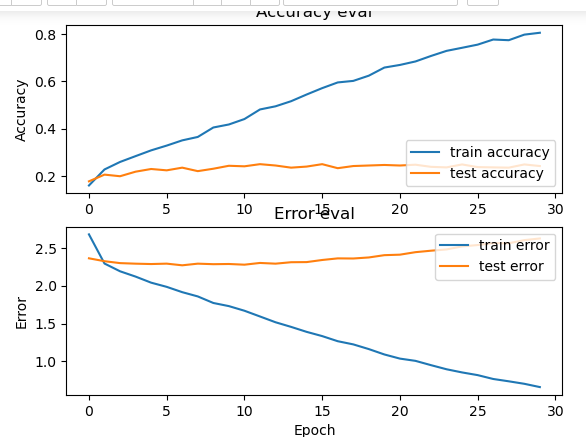

*0)Batch normalization*<br>
*1)3 conv layers*<br>
*2)2 dense layer*<br>
*3)0.18 droupout*<br>
*4)0.12 droupout*<br>
*5)epochs= 120*<br>
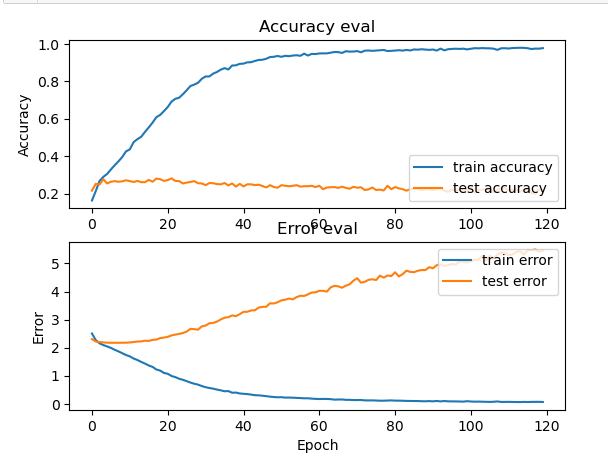

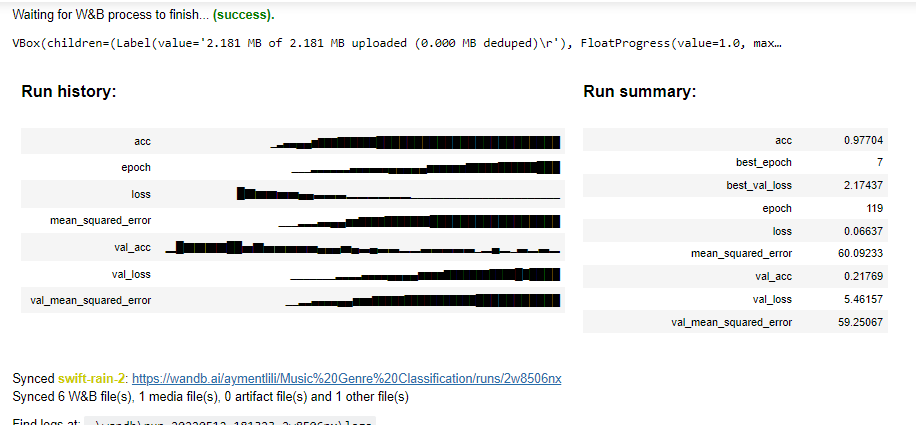

*0)Batch Normalization*<br>
*1)3 conv layers*<br>
*2)2 dense layer*<br>
*3)0.18 droupout*<br>
*4)0.12 droupout*<br>
*5)epochs= 70*<br>
*6)Stratified K-fold cross validation K=7* 

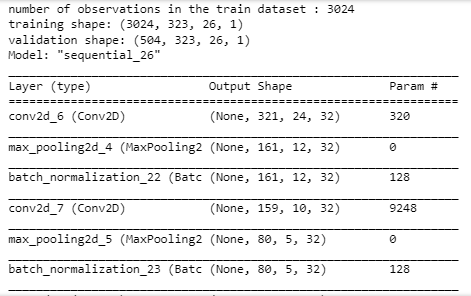

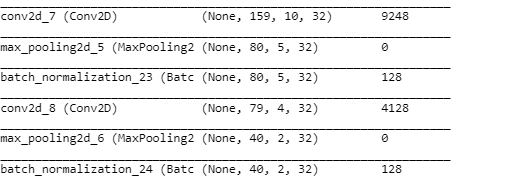

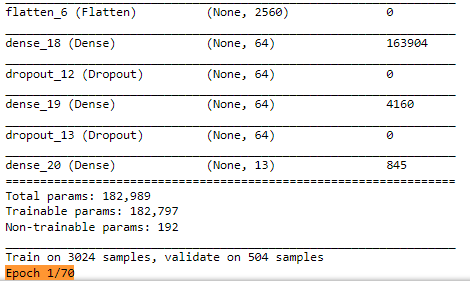

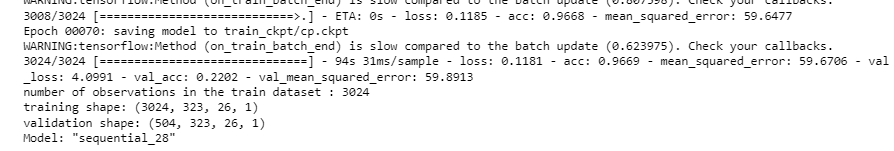

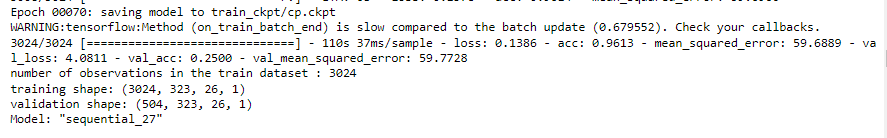

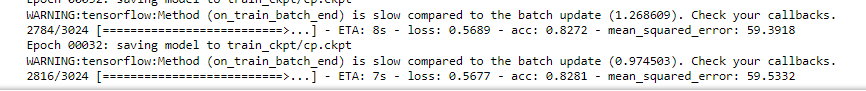

In [ ]:
#### addimage augmentation
#### Create ensemble from model list
#### get all predictions

In [ ]:
all_history

In [ ]:
# evaluate model on test set
test_loss, test_acc,test_mse = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc )

# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

In [ ]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:

# load data
X, y = load_data(DATA_PATH)

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# build network topology
model = keras.Sequential([

# input layer
keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

# 1st dense layer
keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# 2nd dense layer
keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# 3rd dense layer
keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# output layer
keras.layers.Dense(10, activation='softmax')])
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

# plot accuracy and error as a function of the epochs
plot_history(history)